# i. Perkenalan

<b>

==============================

Nama: Muhammad Iqbal Saputra

Batch: RMT-032

Objektif dari program ini adalah untuk membangun model linear regression untuk memprediksi 'price' berdasarkan fitur dalam dataset


==============================


# ii. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pickle
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import kendalltau, pearsonr, spearmanr
from feature_engine.outliers import Winsorizer

In [2]:
!pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable


# iii. Data Loading

In [3]:
# membaca csv
df = pd.read_csv('C:/tmp/rideshare_kaggle.csv')

# menampilkan 3 data teratas (utk memastikan apakah loading file berhasil)
df.head(3)

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  

[3 rows x 57 columns]

In [4]:
# menampilkan 3 data terbawah (utk memastikan apakah loading file berhasil)
df.tail(3)

id     timestamp  hour  day  month  \
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone    source destination cab_type  \
693068  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693069  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693070  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   

        ... precipIntensityMax uvIndexTime  temperatureMin  \
693068  ...                0.0  1543683600           31.42   
693069  ...                0.0  1543683600           31.42   
693070  ...                0.0  1543683600           31.42   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
693068          1543658400           44.76          1543690800   
693069          1543658400           44.76          1543690800   
693070          1543658400           44.76          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
693068                   27.77                  1543658400   
693069                   27.77                  1543658400   
693070                   27.77                  1543658400   

        apparentTemperatureMax apparentTemperatureMaxTime  
693068                   44.09                 1543690800  
693069                   44.09                 1543690800  
693070                   44.09                 1543690800  

[3 rows x 57 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

terdapat lumayan banyak missing value pada kolom 'price'

In [7]:
# cek size dataset sebelum membersihkan missing value
df.shape

(693071, 57)

In [8]:
# menghapus baris yang berisi missing value pada Kolom 'price'
df = df.dropna(subset=['price'])

In [9]:
# cek size dataset setelah membersihkan missing value
df.shape

(637976, 57)

In [10]:
# menghapus kolom yang tidak perlu
df.drop(columns=['id', 'timestamp','datetime'], inplace=True)

In [11]:
dataset = copy.deepcopy(df)

# iv. Exploratory Data Analysis (EDA)

## 1. Statistik Deksriptif

In [12]:
dataset.describe().T

count          mean            std  \
hour                         637976.0  1.161853e+01       6.948776   
day                          637976.0  1.779767e+01       9.982083   
month                        637976.0  1.158655e+01       0.492452   
price                        637976.0  1.654513e+01       9.324359   
distance                     637976.0  2.189261e+00       1.135413   
surge_multiplier             637976.0  1.015068e+00       0.095422   
latitude                     637976.0  4.233816e+01       0.047856   
longitude                    637976.0 -7.106614e+01       0.020303   
temperature                  637976.0  3.958241e+01       6.725500   
apparentTemperature          637976.0  3.587844e+01       7.917260   
precipIntensity              637976.0  8.909317e-03       0.026880   
precipProbability            637976.0  1.459412e-01       0.328776   
humidity                     637976.0  7.410557e-01       0.138575   
windSpeed                    637976.0  6.186795e+00       3.147856   
windGust                     637976.0  8.470616e+00       5.288683   
windGustTime                 637976.0  1.544049e+09  692850.701695   
visibility                   637976.0  8.469180e+00       2.601828   
temperatureHigh              637976.0  4.503959e+01       5.996033   
temperatureHighTime          637976.0  1.544050e+09  693821.060871   
temperatureLow               637976.0  3.414893e+01       6.381731   
temperatureLowTime           637976.0  1.544102e+09  692313.312579   
apparentTemperatureHigh      637976.0  4.161251e+01       7.665189   
apparentTemperatureHighTime  637976.0  1.544050e+09  694198.042258   
apparentTemperatureLow       637976.0  3.013797e+01       8.056278   
apparentTemperatureLowTime   637976.0  1.544099e+09  692757.969879   
dewPoint                     637976.0  3.165228e+01       9.141390   
pressure                     637976.0  1.010093e+03      13.475580   
windBearing                  637976.0  2.201127e+02      99.087172   
cloudCover                   637976.0  6.862907e-01       0.358599   
uvIndex                      637976.0  2.490313e-01       0.474306   
visibility.1                 637976.0  8.469180e+00       2.601828   
ozone                        637976.0  3.135156e+02      27.951377   
sunriseTime                  637976.0  1.544027e+09  691163.407229   
sunsetTime                   637976.0  1.544060e+09  690687.509513   
moonPhase                    637976.0  5.790764e-01       0.244674   
precipIntensityMax           637976.0  3.736905e-02       0.055216   
uvIndexTime                  637976.0  1.544044e+09  691226.766445   
temperatureMin               637976.0  3.345617e+01       6.466349   
temperatureMinTime           637976.0  1.544042e+09  690208.663713   
temperatureMax               637976.0  4.525994e+01       5.644414   
temperatureMaxTime           637976.0  1.544047e+09  690159.666478   
apparentTemperatureMin       637976.0  2.972903e+01       7.109907   
apparentTemperatureMinTime   637976.0  1.544048e+09  687201.147790   
apparentTemperatureMax       637976.0  4.199588e+01       6.935538   
apparentTemperatureMaxTime   637976.0  1.544048e+09  691103.627154   

                                      min           25%           50%  \
hour                         0.000000e+00  6.000000e+00  1.200000e+01   
day                          1.000000e+00  1.300000e+01  1.700000e+01   
month                        1.100000e+01  1.100000e+01  1.200000e+01   
price                        2.500000e+00  9.000000e+00  1.350000e+01   
distance                     2.000000e-02  1.270000e+00  2.160000e+00   
surge_multiplier             1.000000e+00  1.000000e+00  1.000000e+00   
latitude                     4.221480e+01  4.235030e+01  4.235190e+01   
longitude                   -7.110540e+01 -7.108100e+01 -7.106310e+01   
temperature                  1.891000e+01  3.645000e+01  4.049000e+01   
apparentTemperature          1.213000e+01  3.191000e+01  3.590000e+01   
precipIn

Hasil statistik deskriptif menunjukkan beberapa poin penting:

| Fitur                    | Kesimpulan                                                                                          |
|--------------------------|-----------------------------------------------------------------------------------------------------|
| **hour**                 | Rata-rata perjalanan dilakukan pada jam 11.6, dengan distribusi yang merata sepanjang hari.         |
| **day**                  | Sebagian besar perjalanan terjadi pada hari ke-17 dan ke-18 dalam bulan, dengan variasi yang signifikan di sepanjang bulan. |
| **month**                | Data ini mencakup perjalanan yang sebagian besar terjadi pada bulan November dan Desember.          |
| **price**                | Harga rata-rata perjalanan adalah $16.54 dengan deviasi standar $9.32, dan harga perjalanan bervariasi dari $2.50 hingga $97.50. |
| **distance**             | Jarak rata-rata perjalanan adalah 2.19 mil, dengan jarak terpanjang mencapai 7.86 mil.              |
| **surge_multiplier**     | Sebagian besar perjalanan tidak mengalami surge pricing, dengan nilai rata-rata 1.015.              |
| **latitude dan longitude** | Lokasi geografis perjalanan terkonsentrasi di sekitar koordinat 42.33816 (latitude) dan -71.06614 (longitude). |
| **temperature**          | Suhu rata-rata selama perjalanan adalah sekitar 39.58°F.                                            |
| **apparentTemperature**  | Suhu terasa rata-rata adalah 35.88°F, menunjukkan bahwa sebagian perjalanan dilakukan dalam kondisi cuaca yang lebih dingin. |
| **precipIntensity dan precipProbability** | Intensitas curah hujan rata-rata sangat rendah (0.0089) dengan probabilitas curah hujan yang juga rendah (0.1459). |
| **humidity**             | Kelembaban rata-rata adalah 0.741, menunjukkan kondisi yang cukup lembab selama perjalanan.          |
| **windSpeed dan windGust** | Kecepatan angin rata-rata adalah 6.18 mph, dengan gusts mencapai 8.47 mph.                         |
| **visibility**           | Jarak pandang rata-rata adalah 8.47 mil, menunjukkan kondisi visual yang cukup baik.                |
| **cloudCover**           | Tutupan awan rata-rata adalah 0.686, menunjukkan kondisi yang sering berawan.                        |
| **uvIndex**              | Indeks UV rata-rata sangat rendah, di bawah 1.                                                      |
| **ozone**                | Konsentrasi ozon rata-rata adalah 313.52 DU.                                                        |

## 2. Distribusi Target Variabel 'price'

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


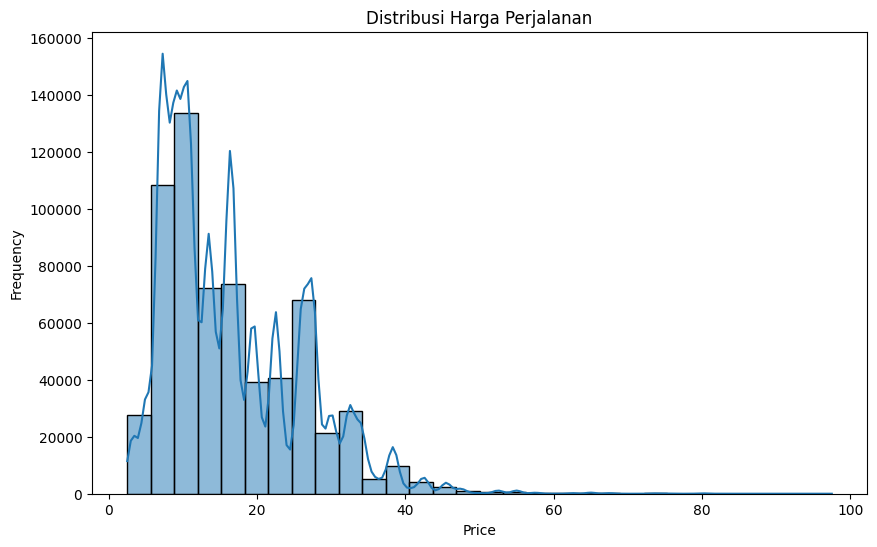

In [13]:


# Memvisualisasikan distribusi harga perjalanan
plt.figure(figsize=(10, 6))
sns.histplot(dataset['price'], bins=30, kde=True)
plt.title('Distribusi Harga Perjalanan')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Distribusi harga perjalanan menunjukkan beberapa poin penting:

- **Distribusi Miring ke Kanan**: Harga perjalanan memiliki distribusi yang miring ke kanan(right-skewed), di mana sebagian besar perjalanan memiliki harga yang relatif rendah.
- **Harga Umum**: Sebagian besar perjalanan memiliki harga di bawah $20, dengan puncak distribusi sekitar $10 hingga $15.
- **Outliers**: Terdapat beberapa perjalanan dengan harga yang sangat tinggi, mencapai hingga hampir $100, yang merupakan outliers.



## 3. Korelasi antar Variabel

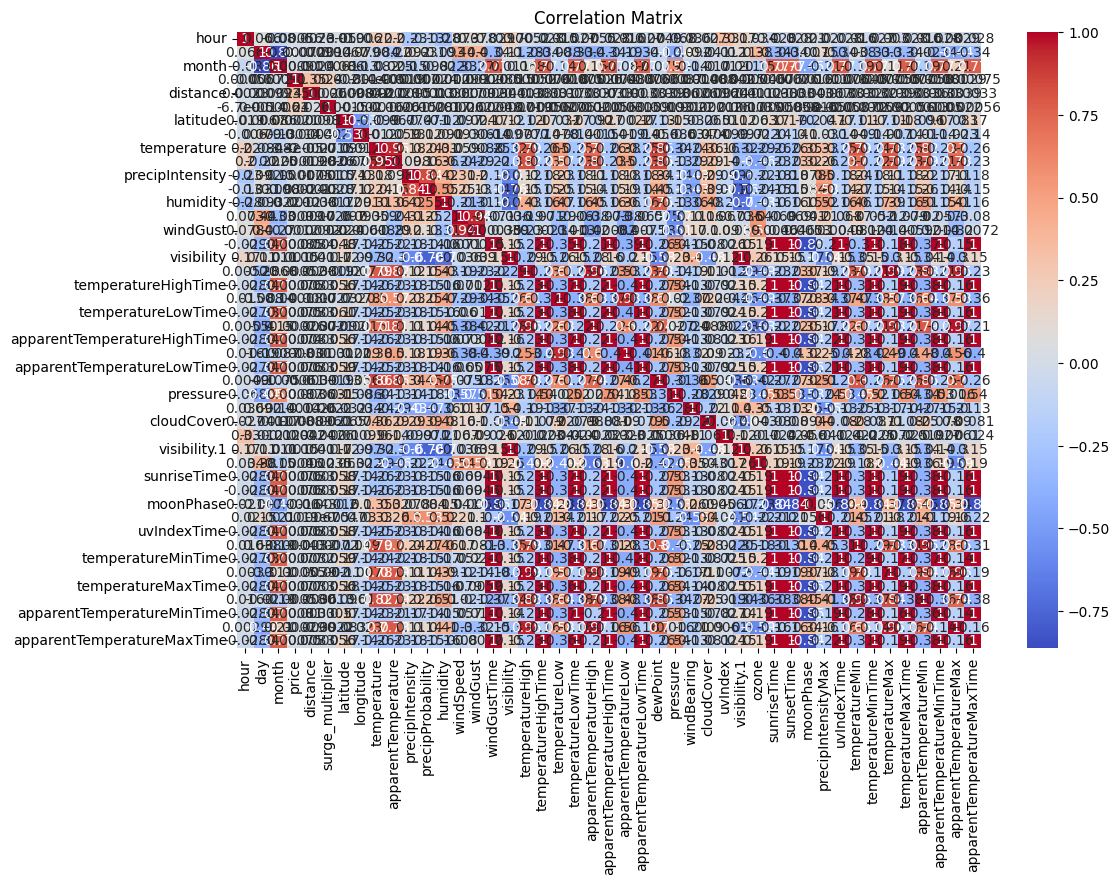

In [14]:


# Memilih hanya kolom numerik untuk perhitungan korelasi
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dataset[numeric_columns].corr()

# Memvisualisasikan korelasi antara fitur-fitur dengan target variable (price)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Matriks korelasi memberikan beberapa insight penting tentang hubungan antara variabel-variabel dalam dataset:

- **Korelasi Positif dan Negatif**: Warna merah menunjukkan korelasi positif yang kuat, sementara warna biru menunjukkan korelasi negatif yang kuat.
- **Korelasi Jarak dan Harga**: Terdapat korelasi positif yang cukup kuat antara `distance` dan `price`, yang menunjukkan bahwa semakin jauh jaraknya, semakin tinggi harga perjalanan.
- **Korelasi Antar Variabel Cuaca**: Beberapa variabel cuaca seperti `temperature`, `apparentTemperature`, `humidity`, dan `windSpeed` menunjukkan korelasi yang signifikan satu sama lain.
- **Korelasi Waktu**: Variabel waktu seperti `hour` dan `day` memiliki korelasi yang rendah dengan variabel lain, menunjukkan bahwa waktu tidak terlalu mempengaruhi variabel lain secara signifikan.



## 4. Distribusi dan Box Plot untuk Fitur Numerik (Distance)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


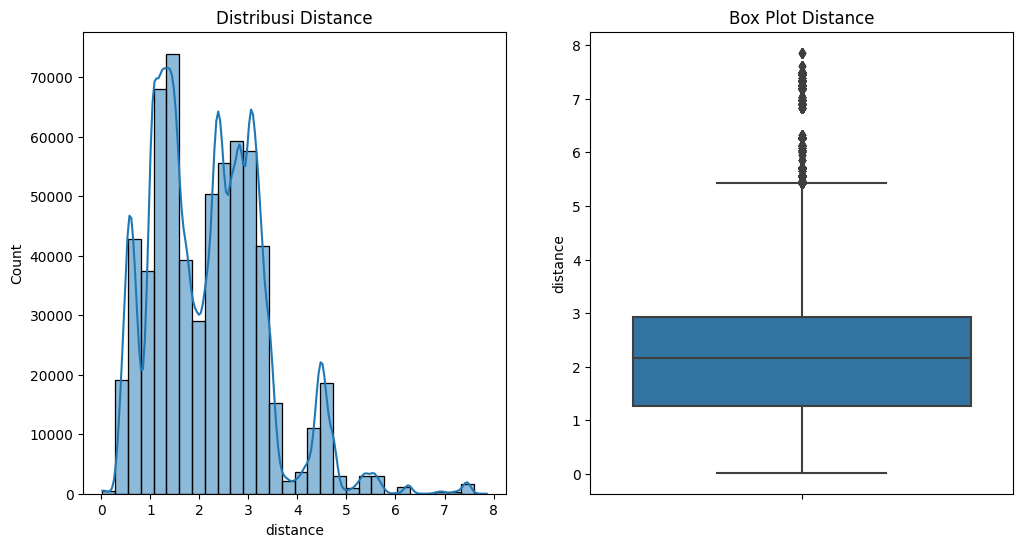

In [15]:
# Memeriksa distribusi dan box plot untuk fitur numerik (contoh: distance)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset['distance'], bins=30, kde=True)
plt.title('Distribusi Distance')

plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['distance'])
plt.title('Box Plot Distance')

plt.show()


Distribusi dan box plot untuk fitur `distance` menunjukkan beberapa poin penting:

- **Distribusi Bimodal**: Histogram menunjukkan bahwa distribusi jarak perjalanan bersifat bimodal, dengan dua puncak utama. Sebagian besar perjalanan memiliki jarak antara 1 hingga 3 mil.
- **Jarak Umum**: Mayoritas perjalanan berada di kisaran 1 hingga 3 mil, dengan jumlah perjalanan menurun seiring bertambahnya jarak.
- **Outliers**: Box plot menunjukkan bahwa terdapat beberapa outliers dengan jarak lebih dari 5 mil. Ini menandakan adanya perjalanan yang jaraknya jauh lebih panjang dibandingkan sebagian besar perjalanan lainnya.
- **IQR (Interquartile Range)**: Rentang antar kuartil (IQR) menunjukkan bahwa 50% data perjalanan memiliki jarak antara sekitar 1.27 mil hingga 2.93 mil.


## 5. Visualisasi Distribusi Harga Berdasarkan Cab Type

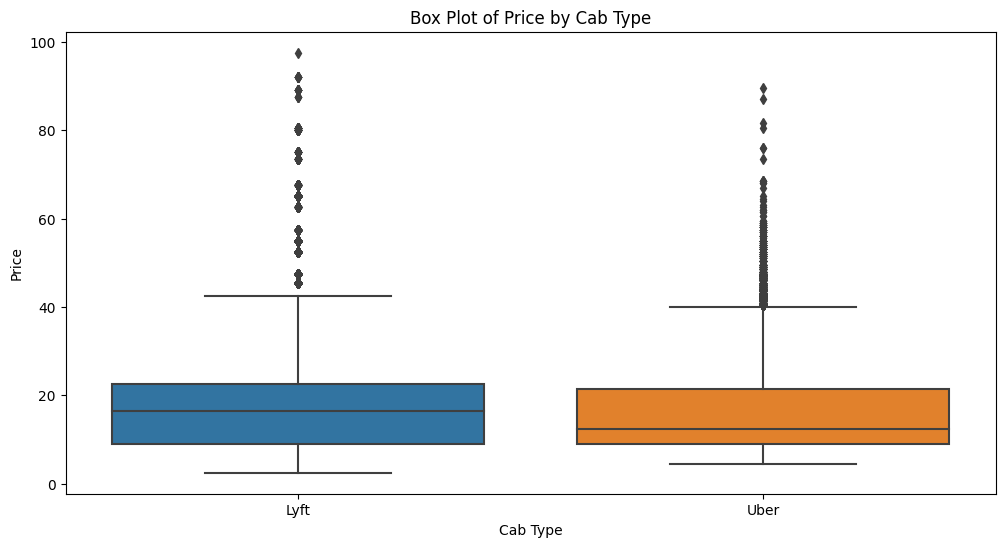

In [16]:
# Visualisasi distribusi harga berdasarkan cab_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='cab_type', y='price', data=dataset)
plt.title('Box Plot of Price by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Price')
plt.show()


Box plot dari harga perjalanan berdasarkan jenis layanan (cab type) menunjukkan beberapa poin penting:

- **Harga Median**: Median harga perjalanan untuk Lyft dan Uber hampir sama, dengan harga sedikit lebih tinggi untuk Lyft.
- **Interquartile Range (IQR)**: Rentang interkuartil untuk Lyft lebih lebar dibandingkan Uber, menunjukkan bahwa variasi harga untuk Lyft lebih besar.
- **Outliers**: Kedua layanan memiliki outliers, tetapi jumlah dan tingkat keparahan outliers lebih banyak pada Uber. Ini menunjukkan bahwa Uber memiliki lebih banyak perjalanan dengan harga yang sangat tinggi dibandingkan Lyft.
- **Rentang Harga**: Rentang harga untuk Lyft dan Uber bervariasi, tetapi sebagian besar harga perjalanan berada di bawah $40.



## 6. Visualisasi Distribusi Harga Berdasarkan Source

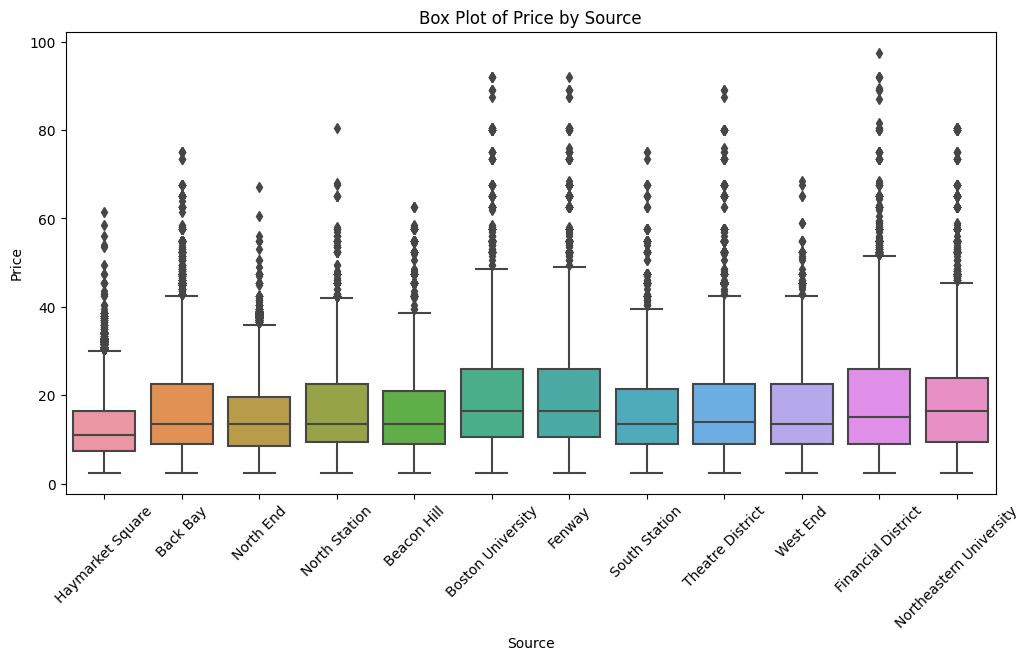

In [17]:
# Visualisasi distribusi harga berdasarkan source
plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='price', data=dataset)
plt.title('Box Plot of Price by Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


Box plot dari harga perjalanan berdasarkan lokasi asal (source) menunjukkan beberapa poin penting:

- **Harga Median**: Harga median untuk perjalanan bervariasi antara lokasi asal yang berbeda, namun secara umum berkisar di sekitar $15 hingga $25.
- **Interquartile Range (IQR)**: Variasi harga perjalanan berbeda-beda tergantung pada lokasi asal, dengan beberapa lokasi seperti `Back Bay`, `Beacon Hill`, dan `Financial District` menunjukkan IQR yang lebih lebar.
- **Outliers**: Semua lokasi asal memiliki outliers, menunjukkan adanya perjalanan dengan harga yang sangat tinggi dari setiap lokasi. Namun, beberapa lokasi seperti `Boston University`, `Theatre District`, dan `West End` memiliki jumlah outliers yang lebih banyak.
- **Rentang Harga**: Rentang harga perjalanan dari berbagai lokasi asal cukup luas, menunjukkan bahwa faktor lokasi dapat mempengaruhi harga perjalanan.



## 7. Visualisasi Distribusi Harga Berdasarkan Destination

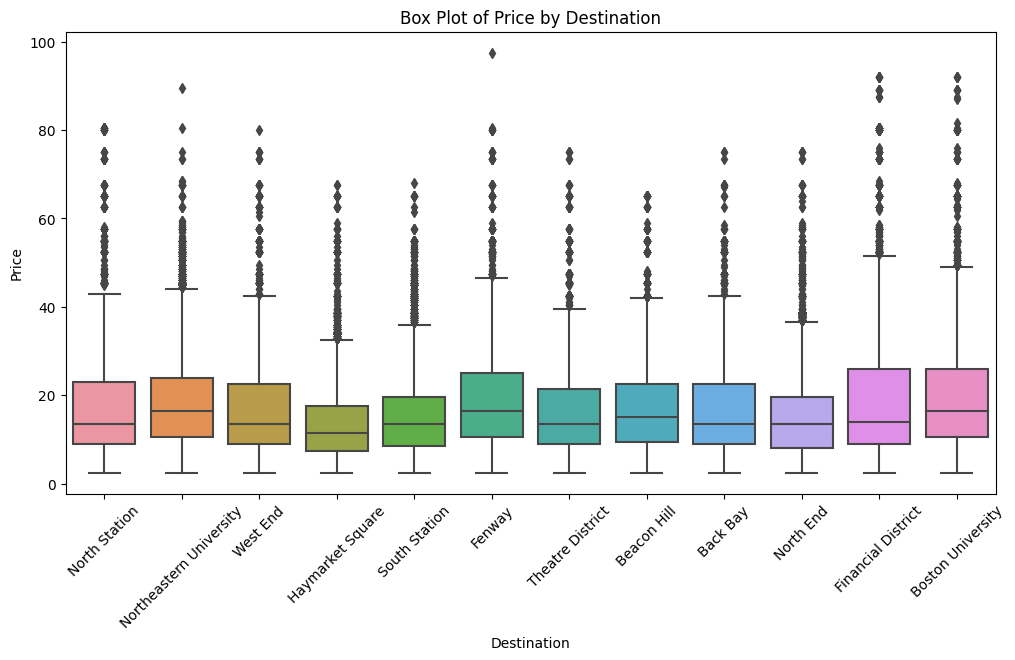

In [18]:
# Visualisasi distribusi harga berdasarkan destination
plt.figure(figsize=(12, 6))
sns.boxplot(x='destination', y='price', data=dataset)
plt.title('Box Plot of Price by Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


Box plot dari harga perjalanan berdasarkan lokasi tujuan (destination) menunjukkan beberapa poin penting:

- **Harga Median**: Harga median untuk perjalanan bervariasi antara lokasi tujuan yang berbeda, namun secara umum berkisar di sekitar $15 hingga $25.
- **Interquartile Range (IQR)**: Variasi harga perjalanan berbeda-beda tergantung pada lokasi tujuan, dengan beberapa lokasi seperti `Financial District` dan `Boston University` menunjukkan IQR yang lebih lebar.
- **Outliers**: Semua lokasi tujuan memiliki outliers, menunjukkan adanya perjalanan dengan harga yang sangat tinggi ke setiap lokasi. Namun, beberapa lokasi seperti `Financial District` dan `Boston University` memiliki jumlah outliers yang lebih banyak.
- **Rentang Harga**: Rentang harga perjalanan ke berbagai lokasi tujuan cukup luas, menunjukkan bahwa faktor lokasi tujuan dapat mempengaruhi harga perjalanan.


# v. Feature Engineering

## Handling Cardinality

In [19]:
# mengdefinisikan kolom kategorikal dan numerik
cat_columns = dataset.select_dtypes(include=['object']).columns.tolist()
num_columns = dataset.select_dtypes(include=np.number).columns.tolist()

print('numerical', num_columns)
print('Categorical', cat_columns)

numerical ['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
Categorical ['timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


In [20]:
# membuat list untuk menampung kolom kategorikal
cat_columns_unique = []

for i in cat_columns:
    cat_columns_unique.append([i, dataset[i].nunique()])

# menampilkan kolom kategorikal beserta unique valuenya
pd.DataFrame(data=cat_columns_unique, columns=['categorical_column', 'unique_value'])

categorical_column  unique_value
0           timezone             1
1             source            12
2        destination            12
3           cab_type             2
4         product_id            12
5               name            12
6      short_summary             9
7       long_summary            11
8               icon             7

kolom kategorikal sudah siap di encoding

## Splitting between Train-set and Test-set

In [21]:


# Memisahkan dataset menjadi fitur (X) dan target (y)
X = dataset.drop(columns='price')
y = dataset['price']

# Memisahkan dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # pareto principle

# Menampilkan ukuran dari train set dan test set
print(f'Train set: {X_train.shape}')
print(f'Test set: {X_test.shape}')


Train set: (510380, 53)
Test set: (127596, 53)


## Handling Outliers

In [22]:


# List kolom numerik dari dataset
num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Membuat data dan kolom untuk distribusi normal
data_normal = []
column_normal = []

# Membuat data dan kolom untuk distribusi skewed
data_skewed = []
column_skewed = []

# Melakukan loop pada setiap kolom numerik untuk memfilter data distribusi normal atau skewed
for num in num_columns:
    skewness = X_train[num].skew()
    
    # Jika data terdistribusi normal
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Jika data memiliki skewness rendah
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Jika data memiliki skewness tinggi
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])


In [23]:
# Menampilkan kolom yang terdistribusi normal
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])


normal_distribution  skewness
0                          hour -0.044858
1                           day -0.376721
2                         month -0.351258
3                     longitude -0.354602
4           apparentTemperature -0.394287
5                      humidity -0.073793
6                     windSpeed  0.450690
7                  windGustTime  0.439003
8               temperatureHigh  0.076060
9           temperatureHighTime  0.429949
10               temperatureLow -0.333390
11           temperatureLowTime  0.441612
12      apparentTemperatureHigh  0.069848
13  apparentTemperatureHighTime  0.426831
14   apparentTemperatureLowTime  0.437482
15                     dewPoint -0.498884
16                     pressure  0.155684
17                        ozone  0.412986
18                  sunriseTime  0.434438
19                   sunsetTime  0.434570
20                    moonPhase -0.379514
21                  uvIndexTime  0.435567
22           temperatureMinTime  0.442767
23               temperatureMax  0.299643
24           temperatureMaxTime  0.423105
25   apparentTemperatureMinTime  0.448538
26   apparentTemperatureMaxTime  0.420984

In [24]:
# Menampilkan kolom yang terdistribusi skewed
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])


skewed_distribution  skewness  rate
0                 distance  0.818022   low
1         surge_multiplier  7.966922  high
2                 latitude -2.113615  high
3              temperature -0.611648   low
4          precipIntensity  3.332665  high
5        precipProbability  2.032076  high
6                 windGust  1.117586  high
7               visibility -1.508732  high
8   apparentTemperatureLow -0.500387   low
9              windBearing -0.629257   low
10              cloudCover -0.731698   low
11                 uvIndex  1.678248  high
12            visibility.1 -1.508732  high
13      precipIntensityMax  0.992246   low
14          temperatureMin -0.871528   low
15  apparentTemperatureMin -1.109028  high
16  apparentTemperatureMax  0.611335   low

In [25]:
# Daftar kolom dengan variasi rendah
low_variation_column = ['surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex']

# Menghapus kolom dengan variasi rendah dari kolom skewed dan menambahkannya ke kolom normal
for col in low_variation_column:
    if col in column_skewed:
        column_skewed.remove(col)
        column_normal.append(col)


In [26]:
# Metode Capping untuk Distribusi Normal
winsorizer_normal = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=column_normal, missing_values='ignore')

# Fit & Transform pada X_train
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transform pada X_test
X_test_capped = winsorizer_normal.transform(X_test)


In [27]:
# Metode Capping untuk Distribusi Skewed
winsorizer_skewed = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=column_skewed)

# Fit & Transform pada X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transform pada X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)


In [28]:
# Fungsi untuk Plot Perbandingan Distribusi Sebelum dan Sesudah Penanganan Outlier
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Ukuran Figure dan Super Title berdasarkan variabel
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Sebelum
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Sebelum
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram Sesudah
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot Sesudah
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


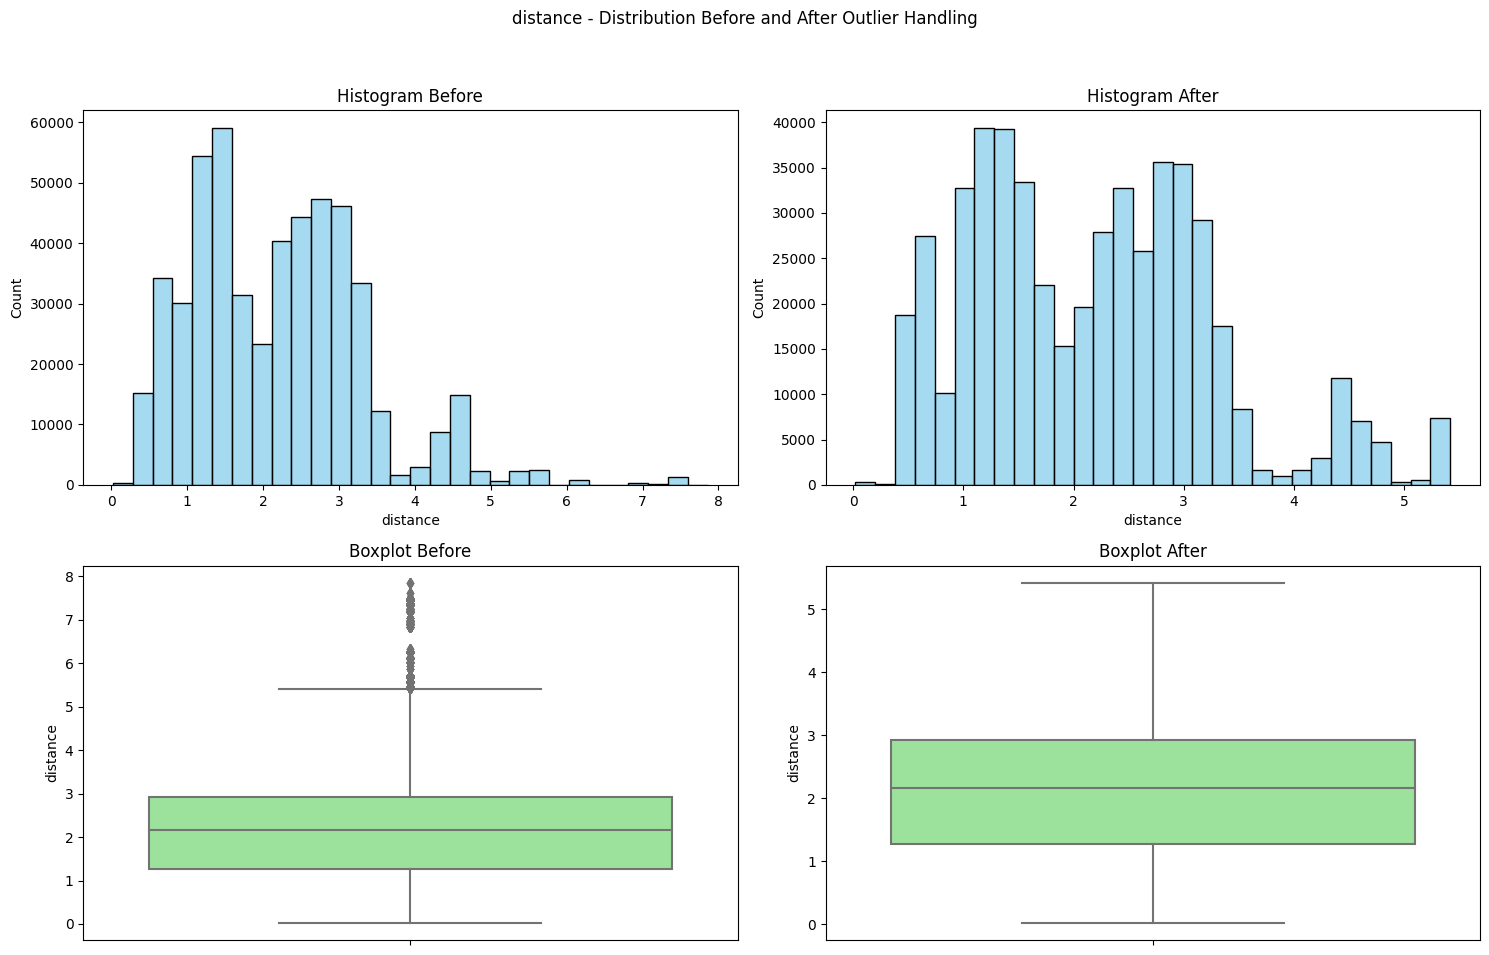

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


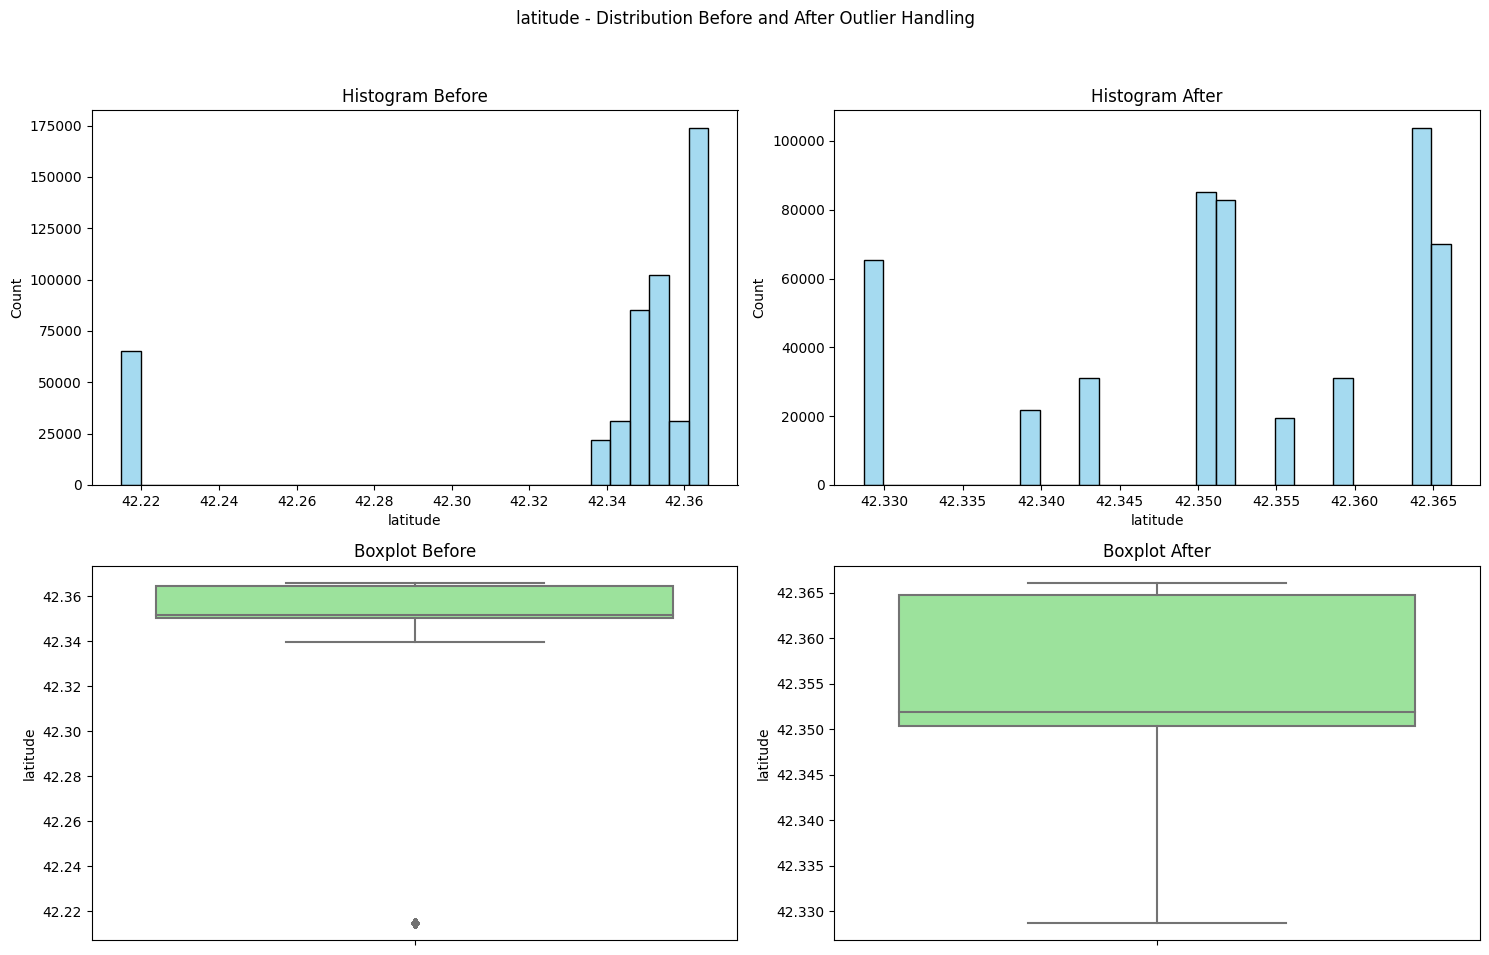

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


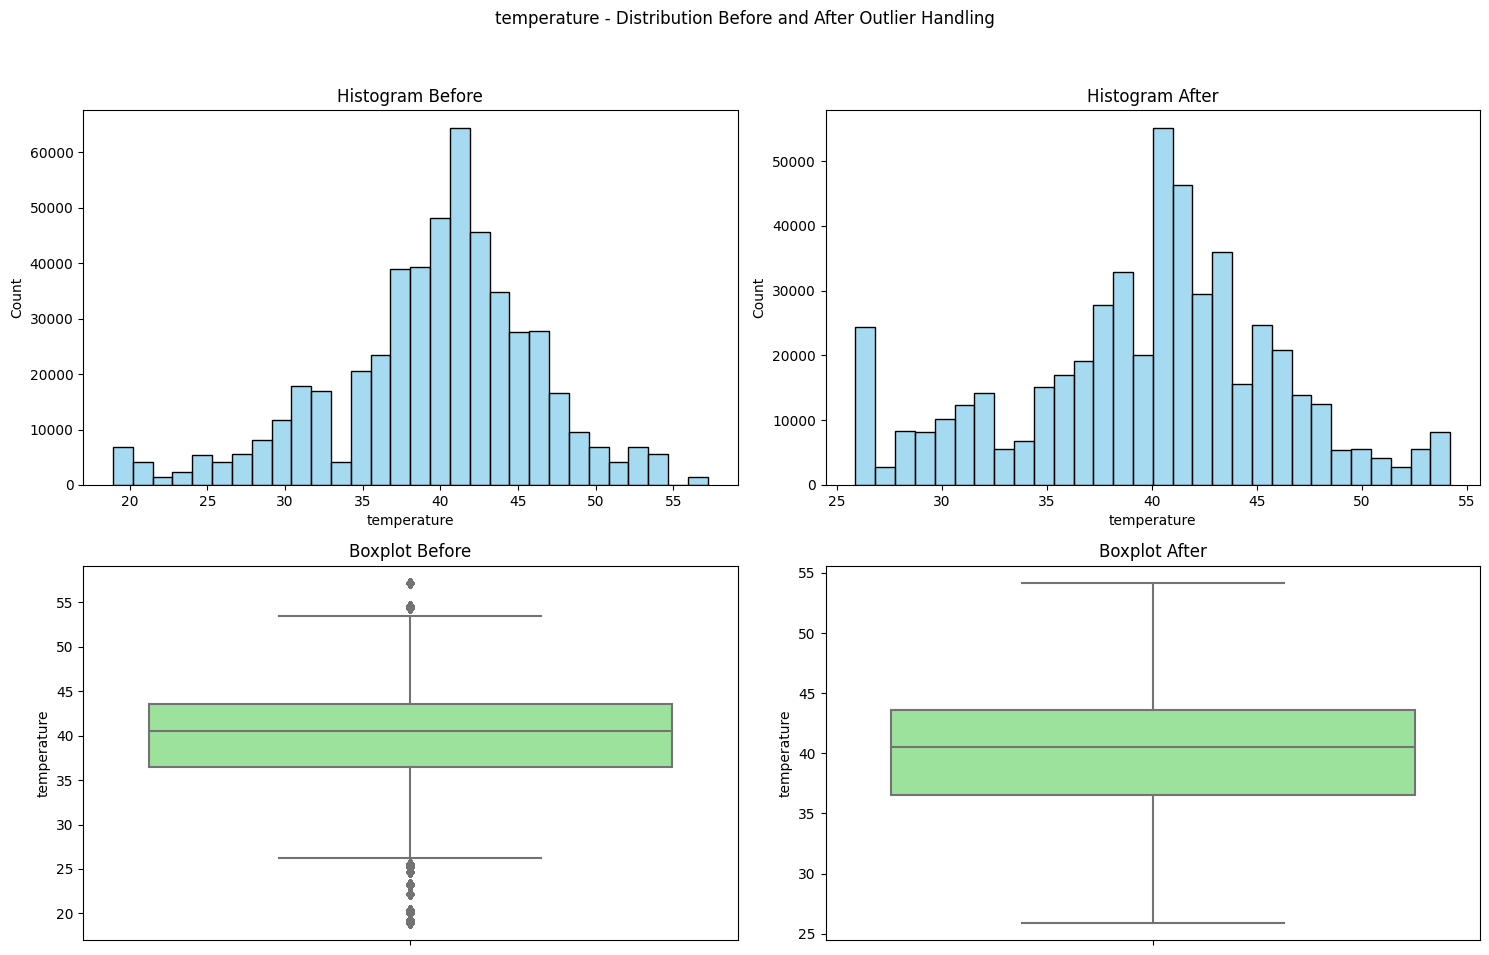

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


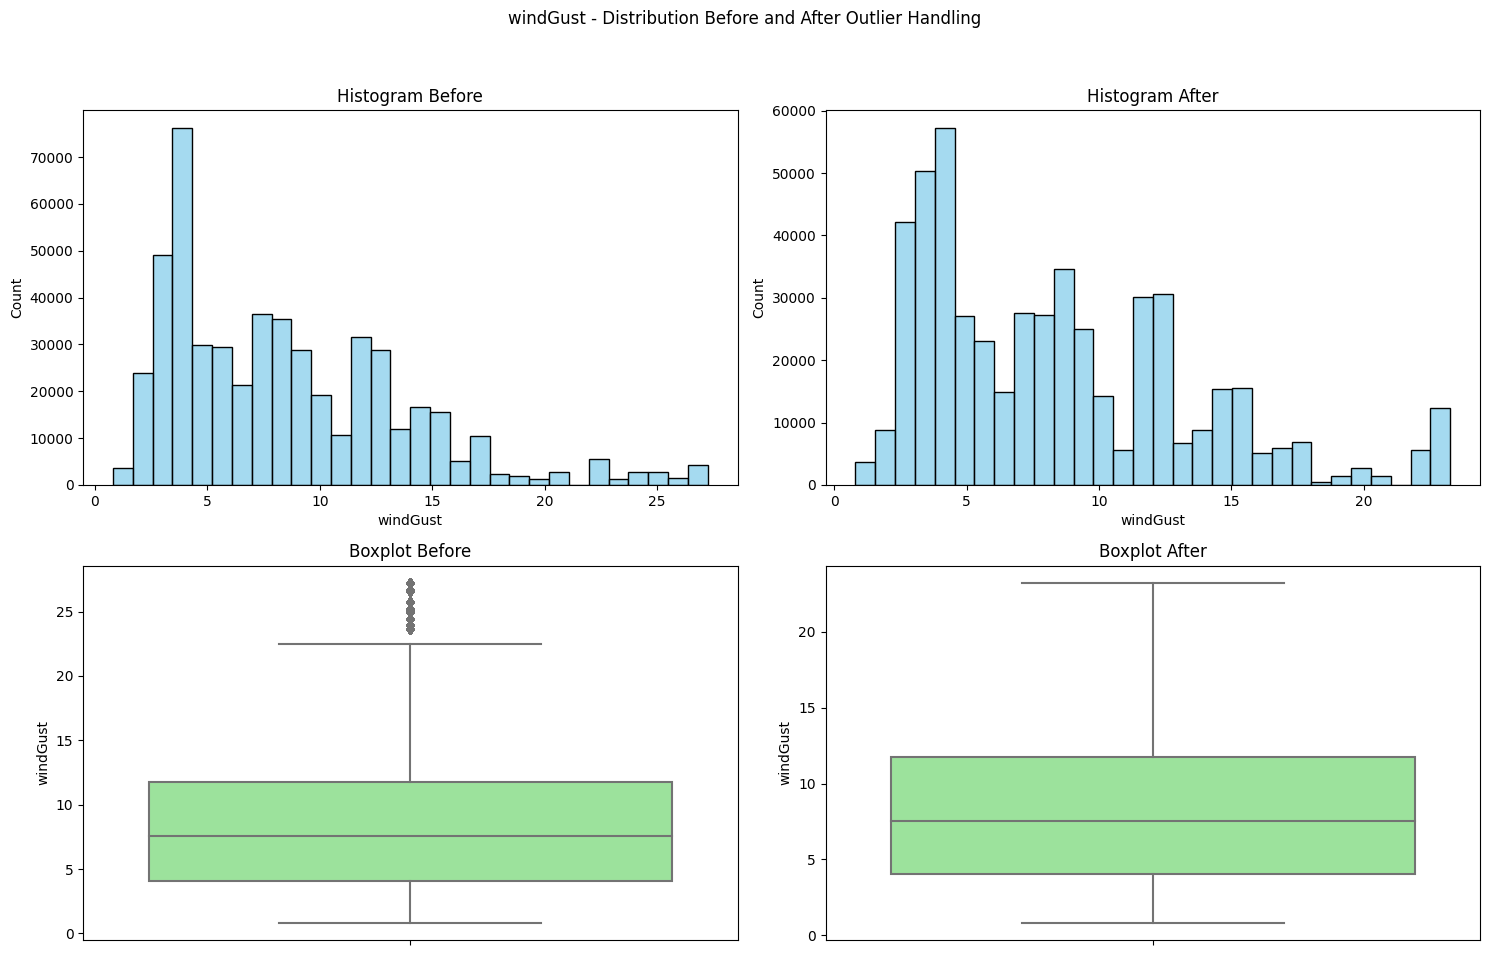

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


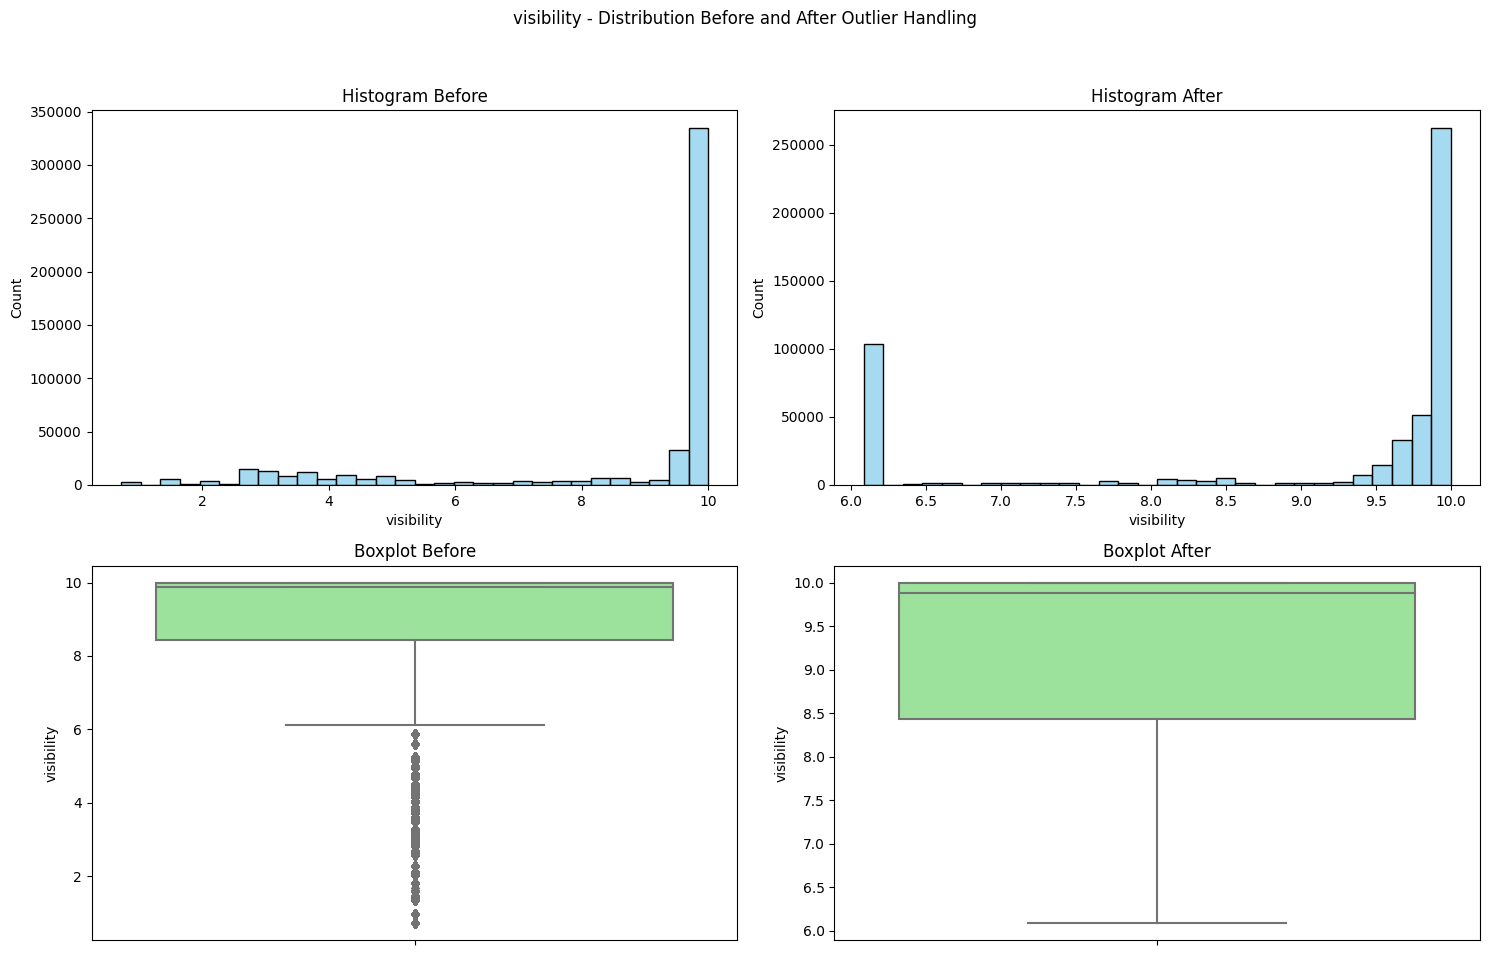

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


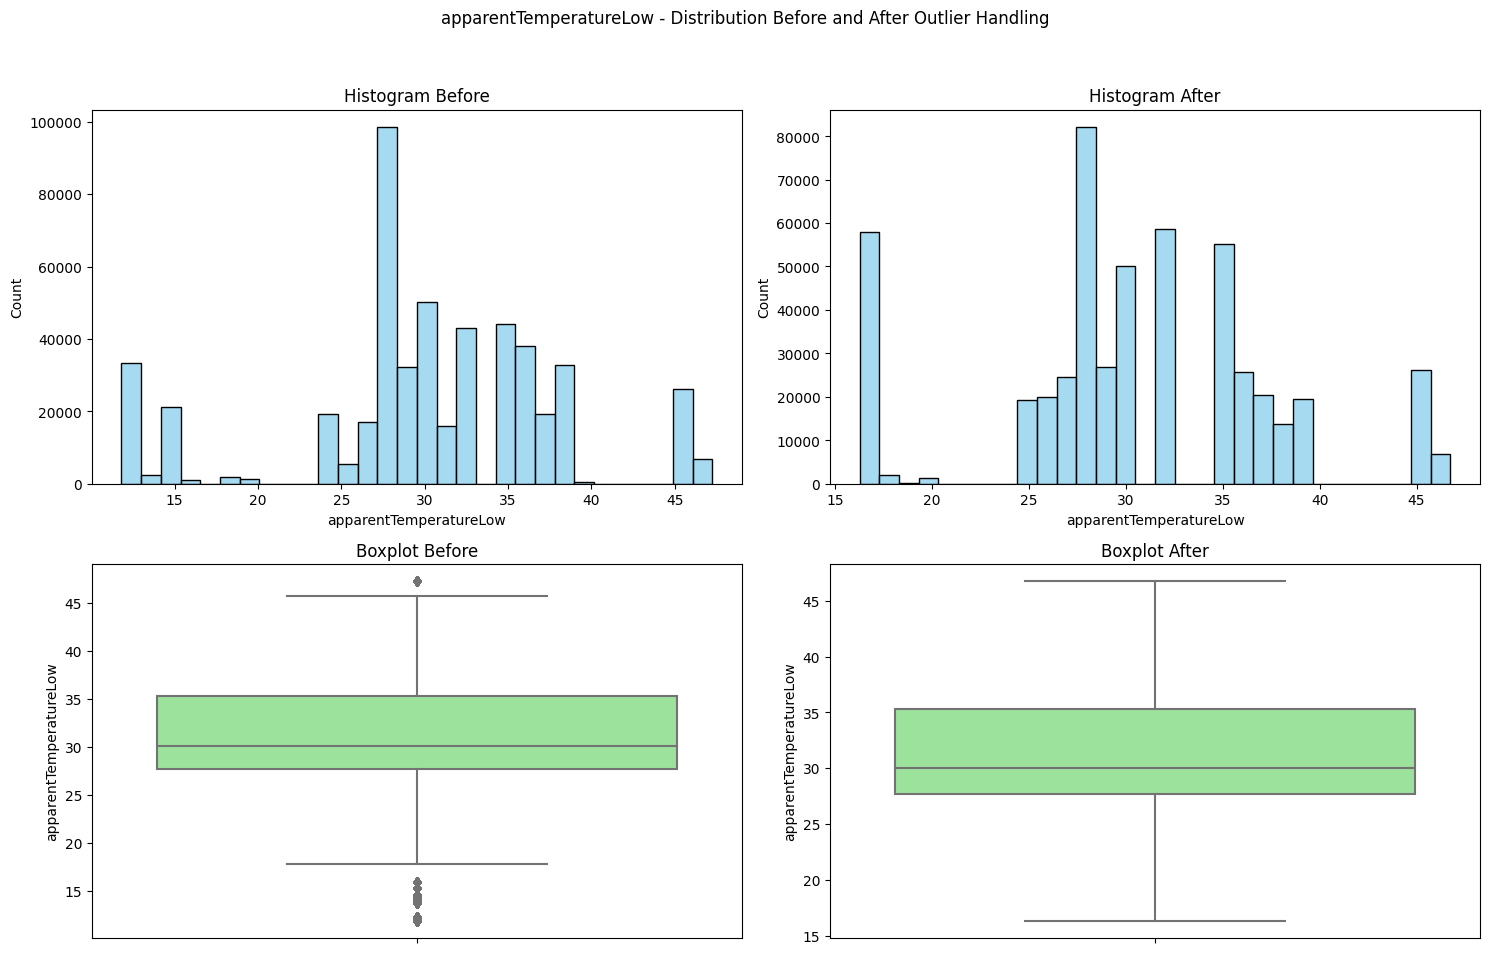

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


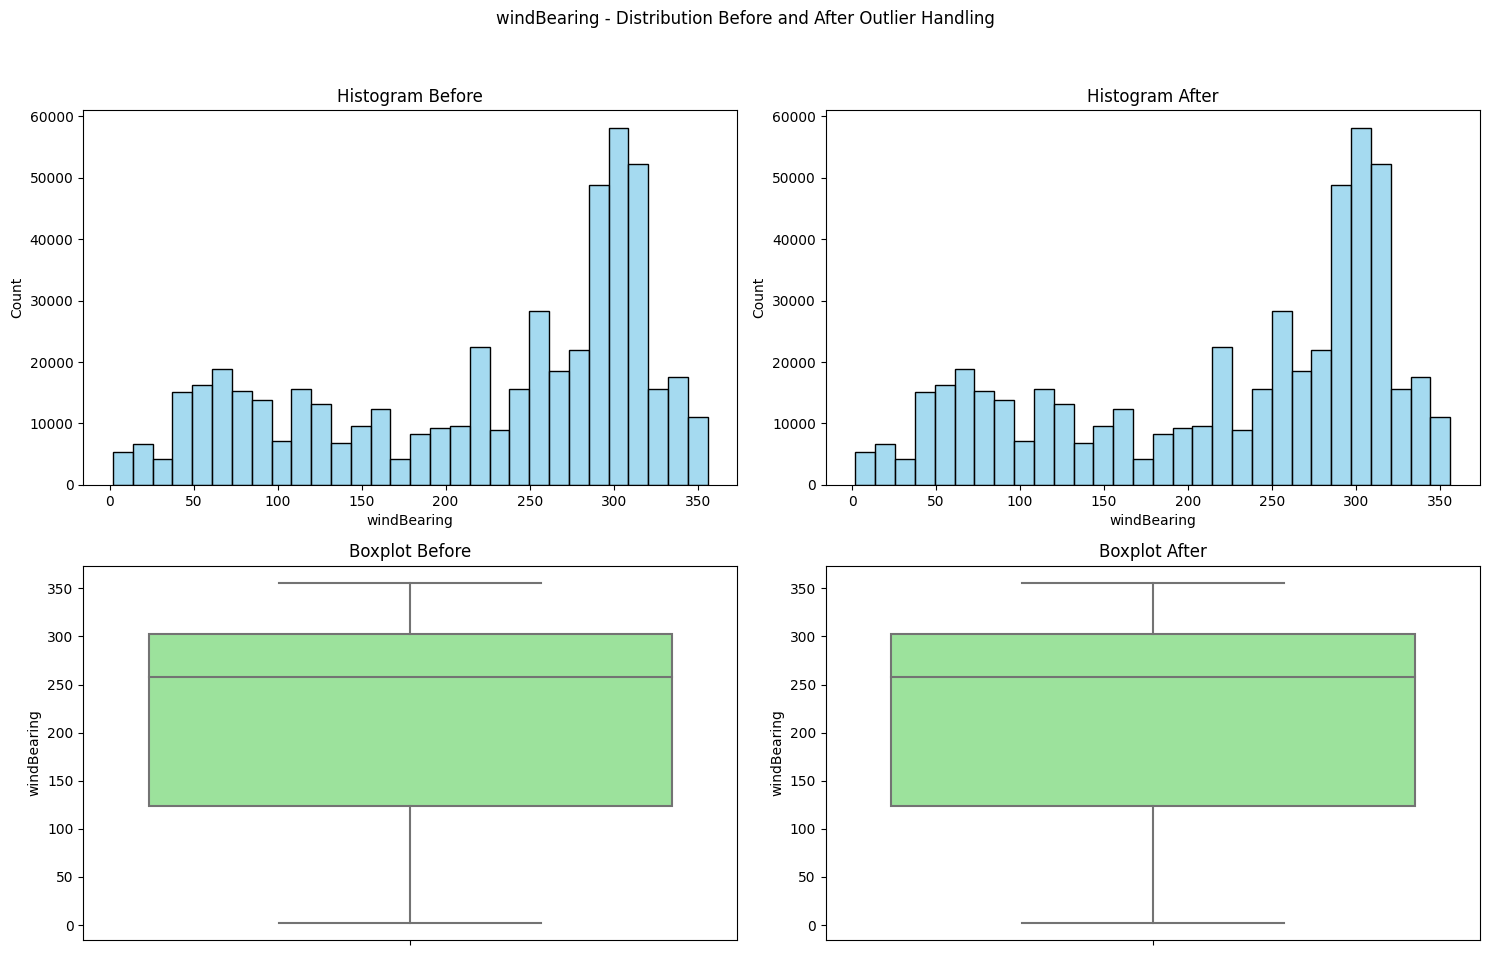

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


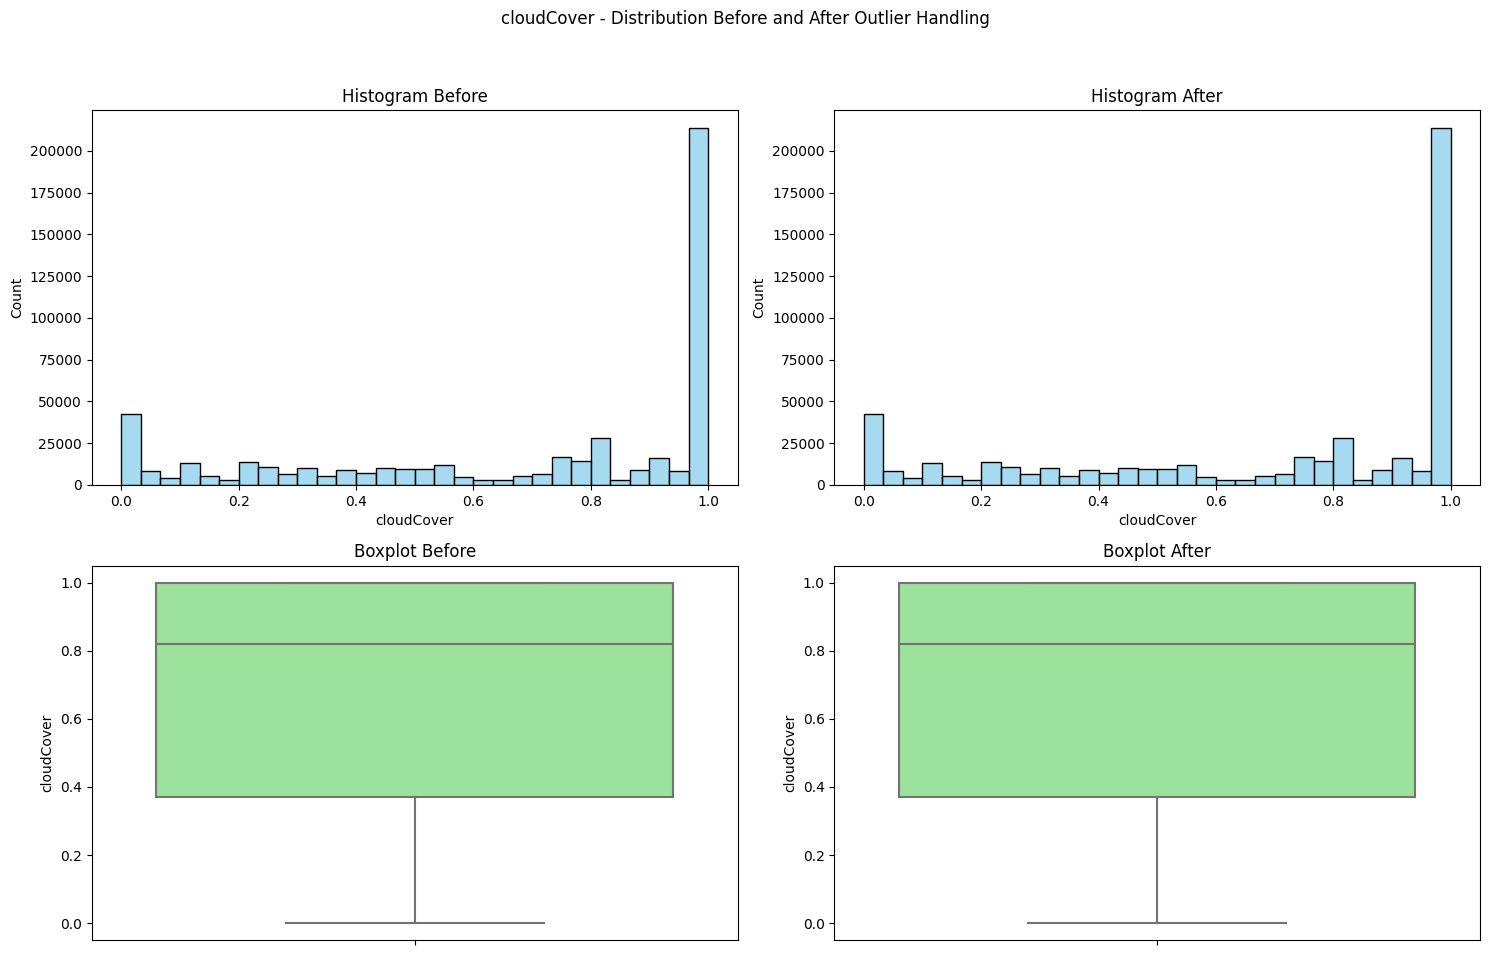

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


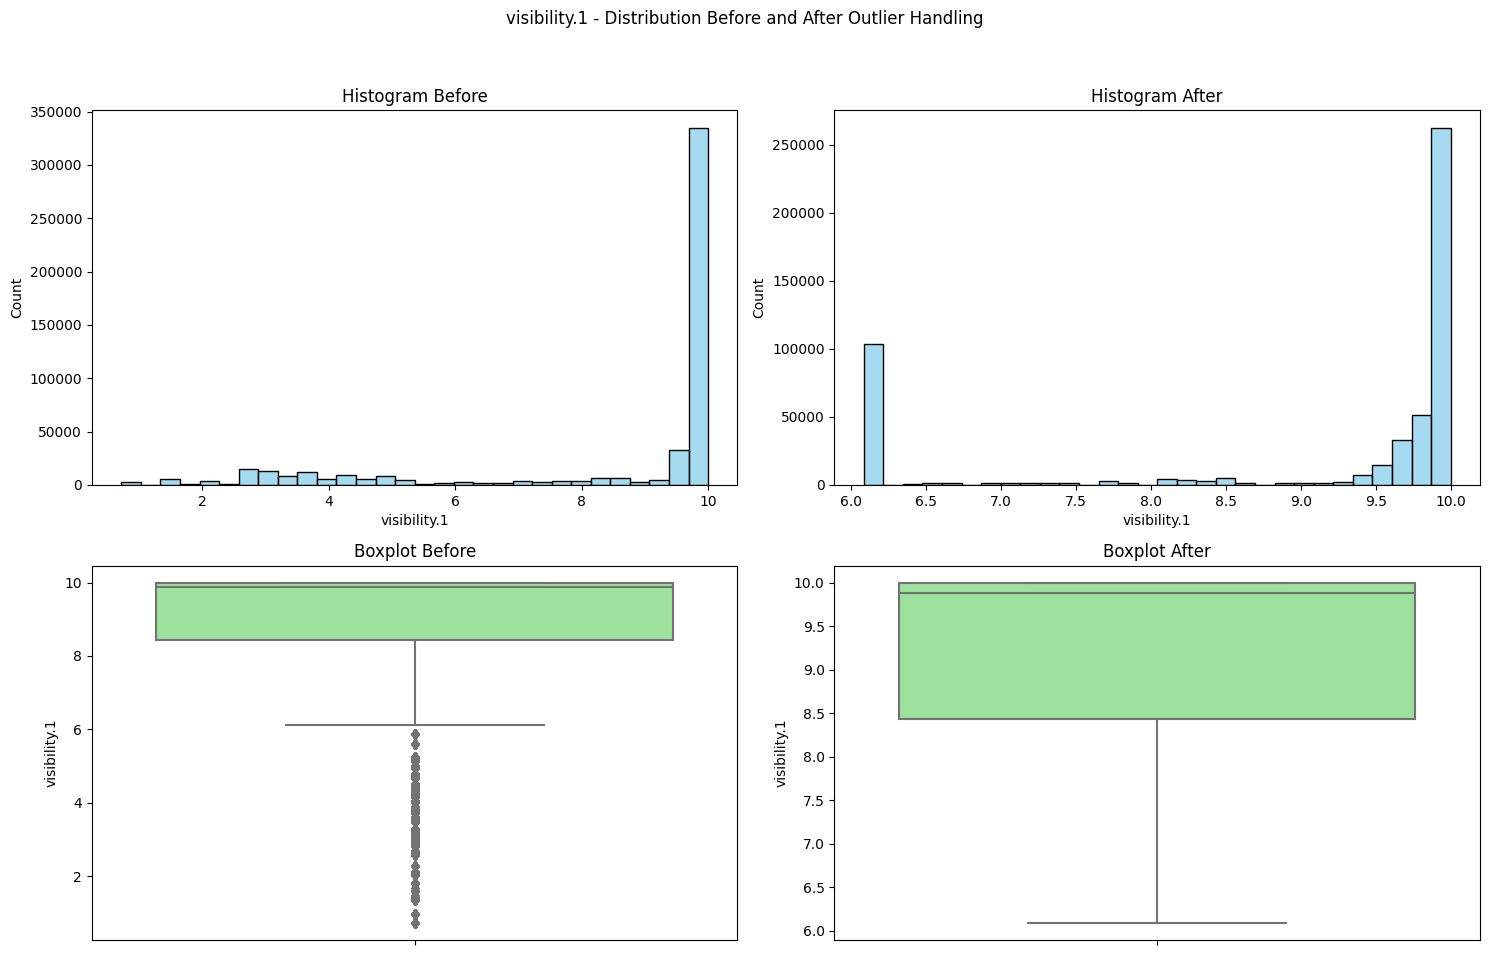

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


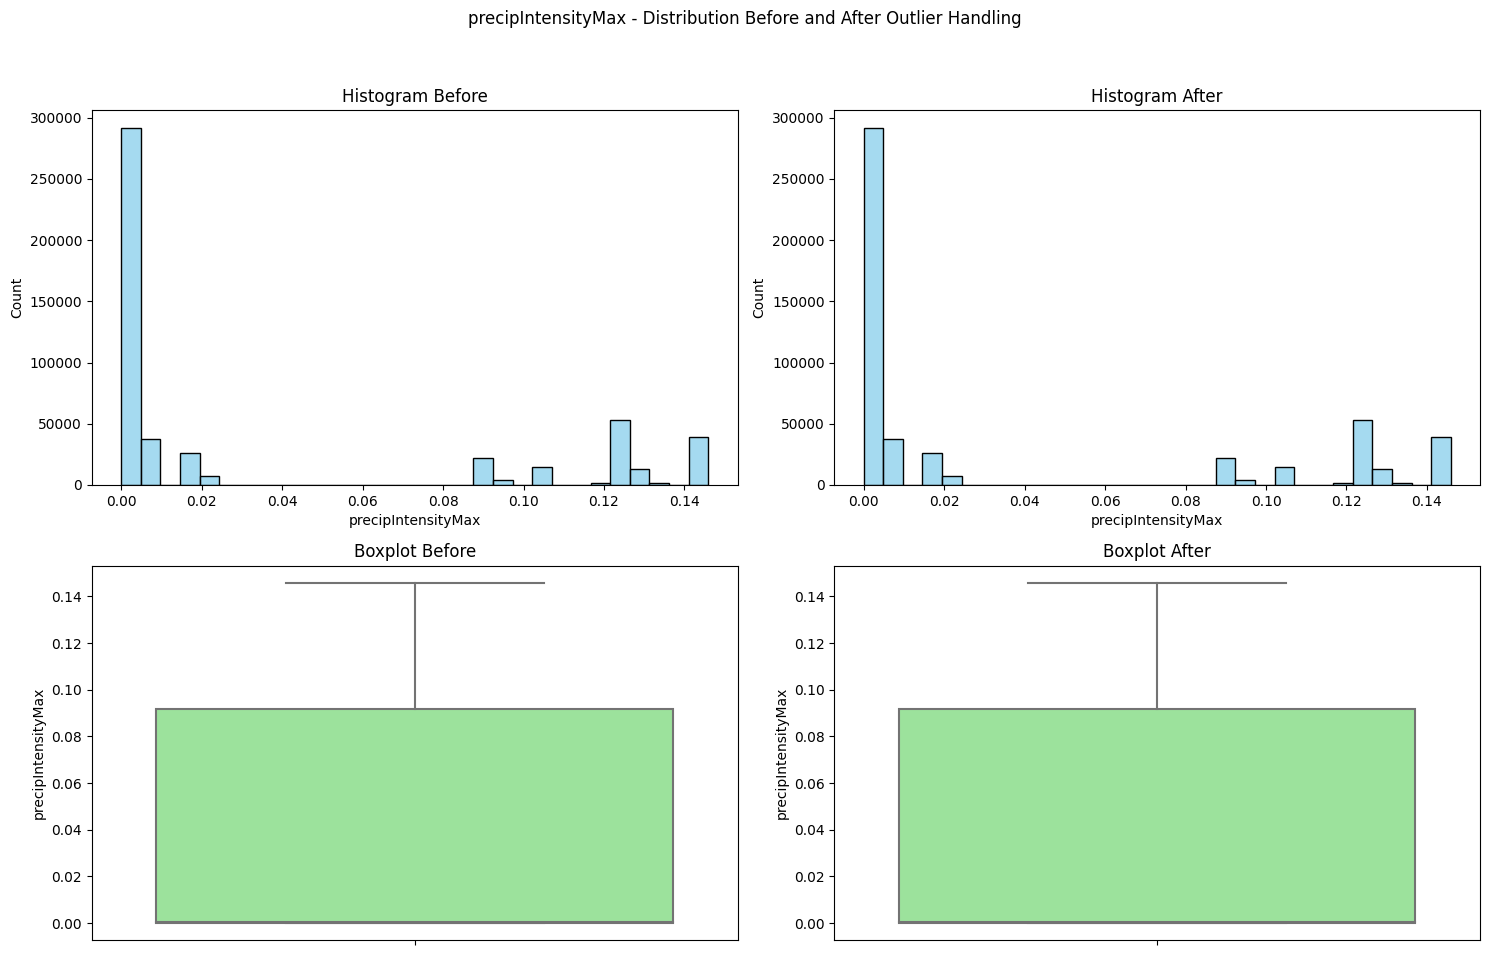

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


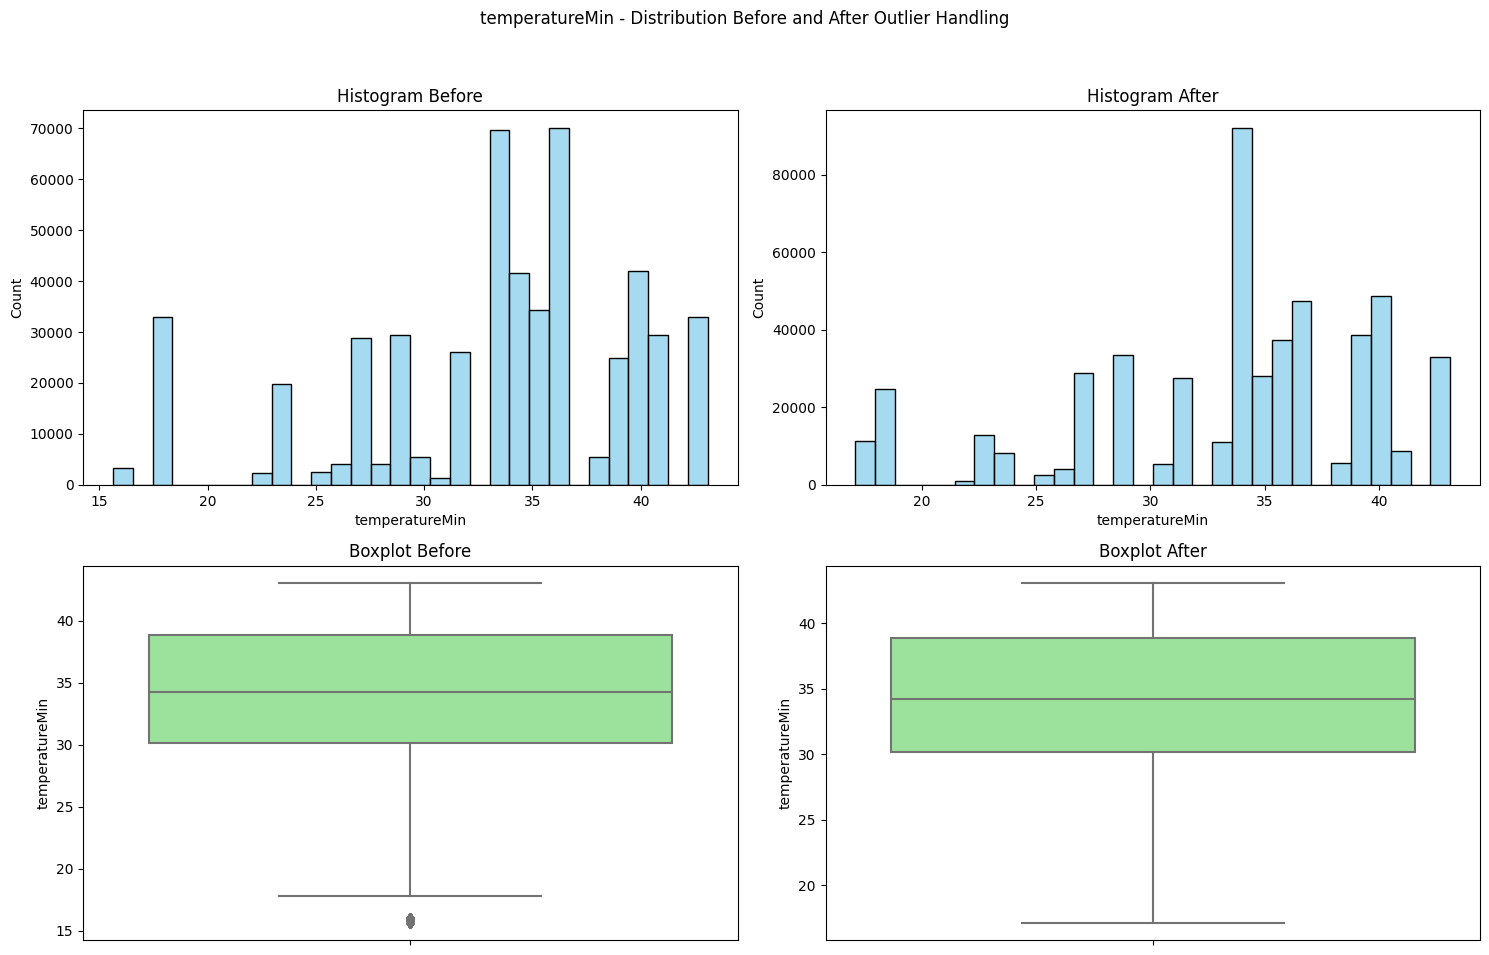

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


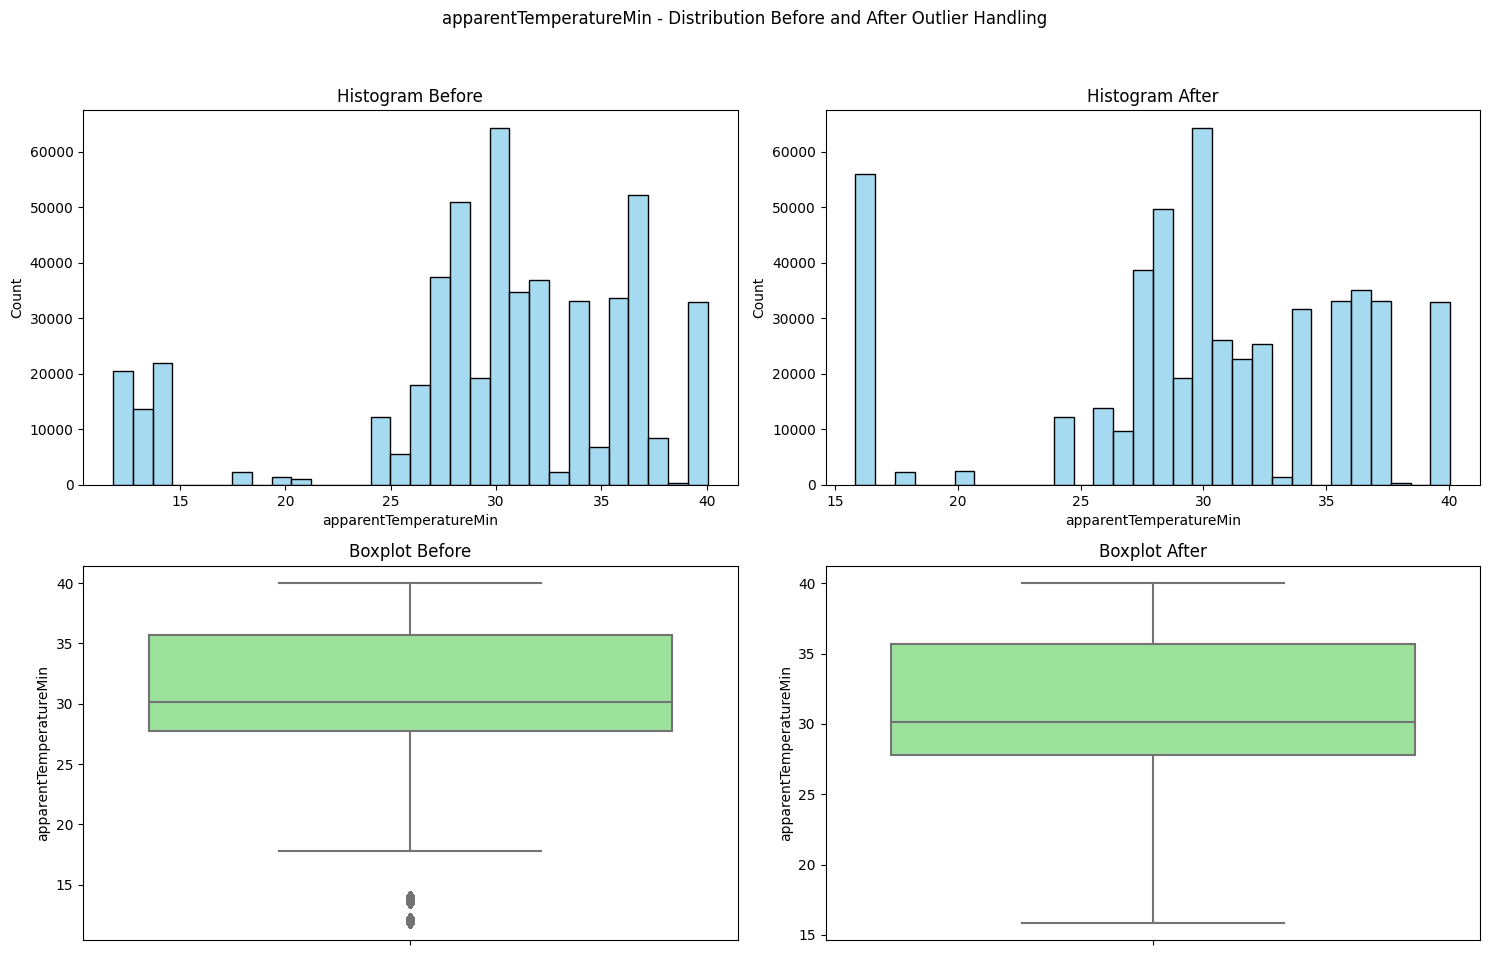

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


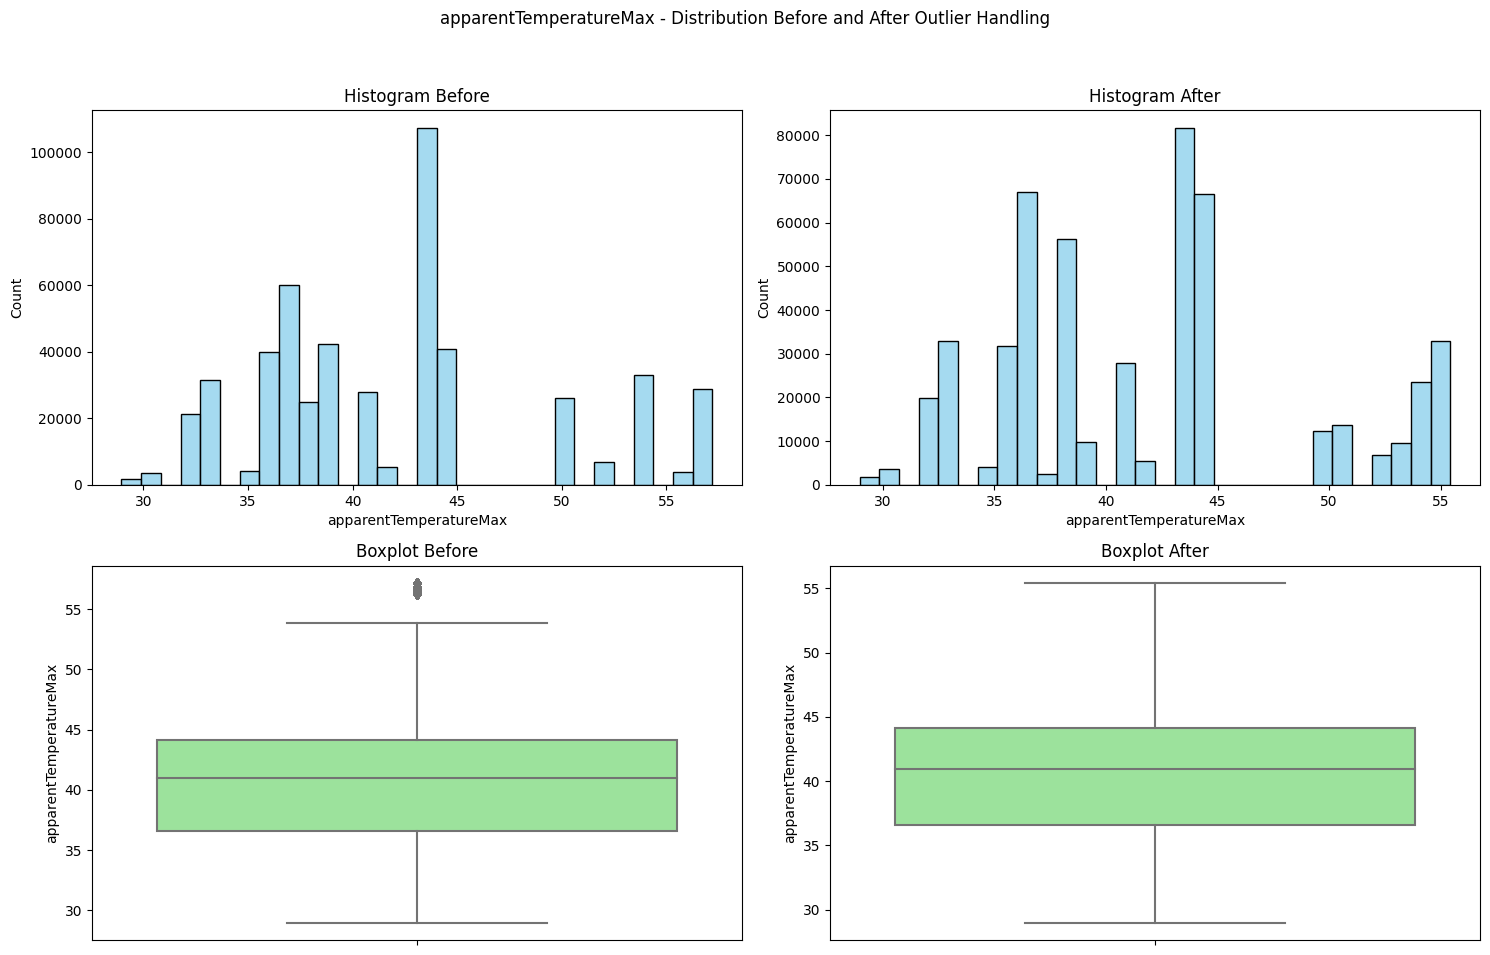

In [29]:
# Menampilkan visualisasi perbandingan distribusi sebelum dan sesudah penanganan outlier untuk kolom skewed
for col in column_skewed:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


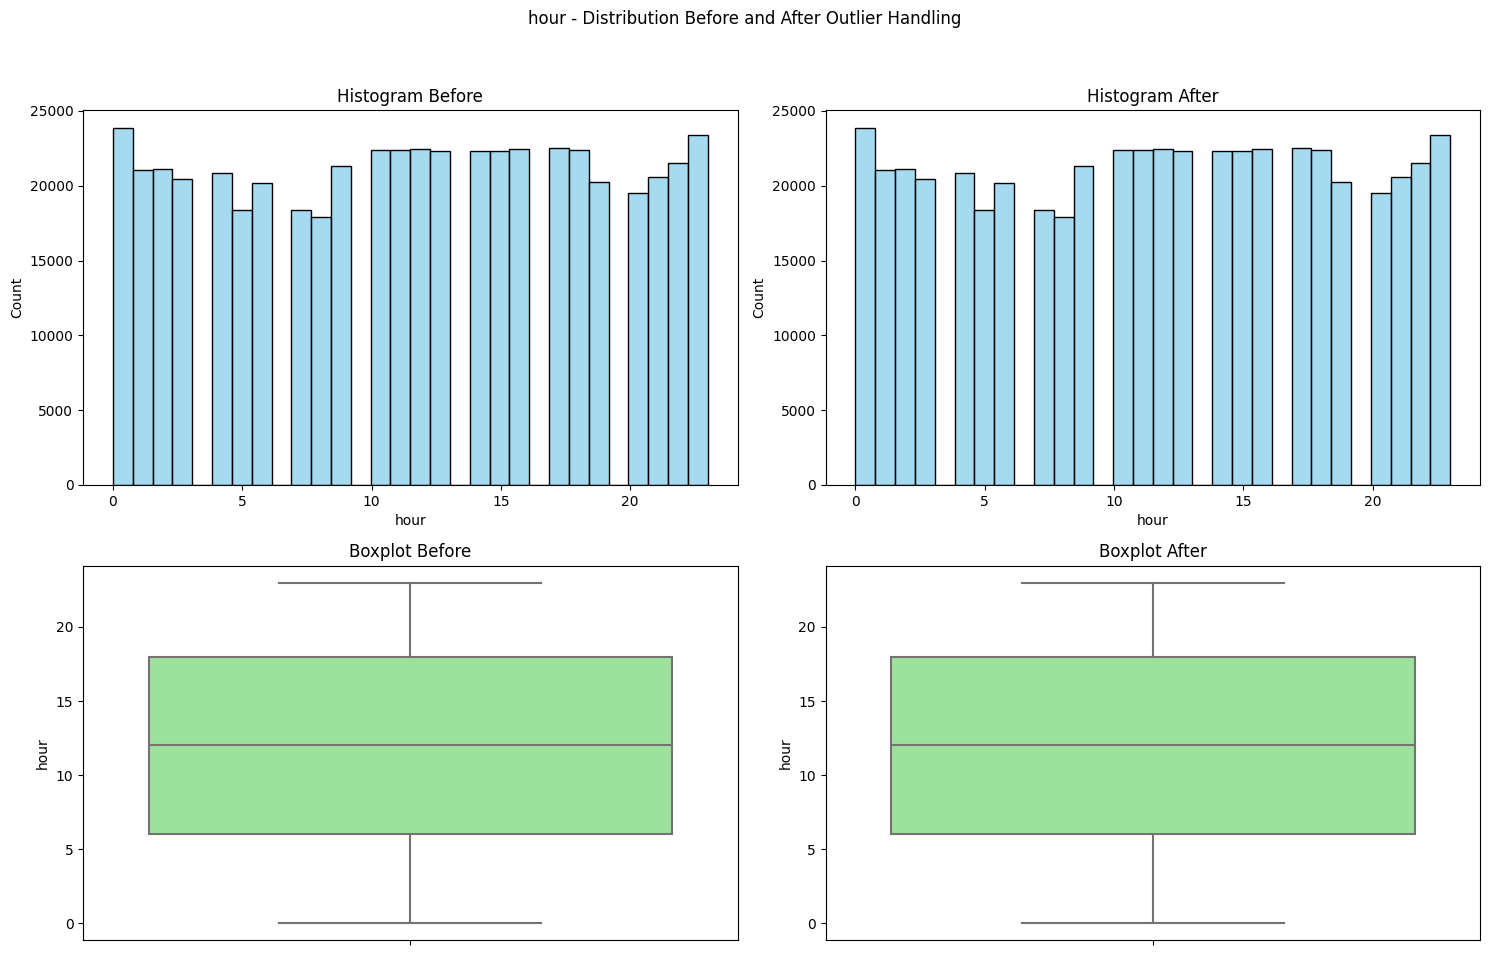

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


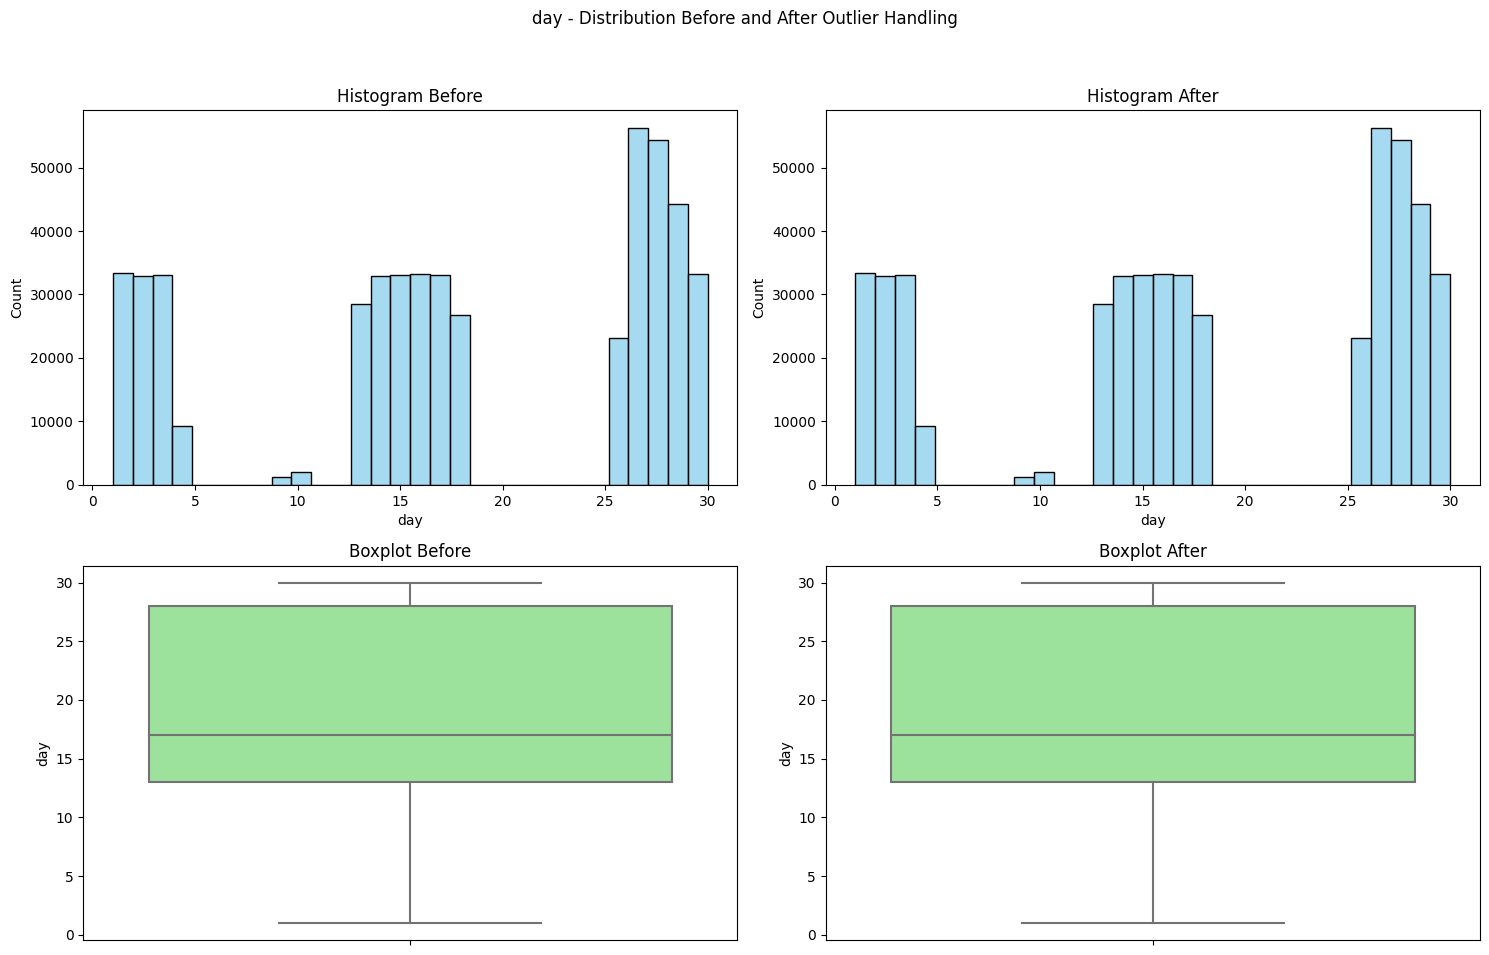

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


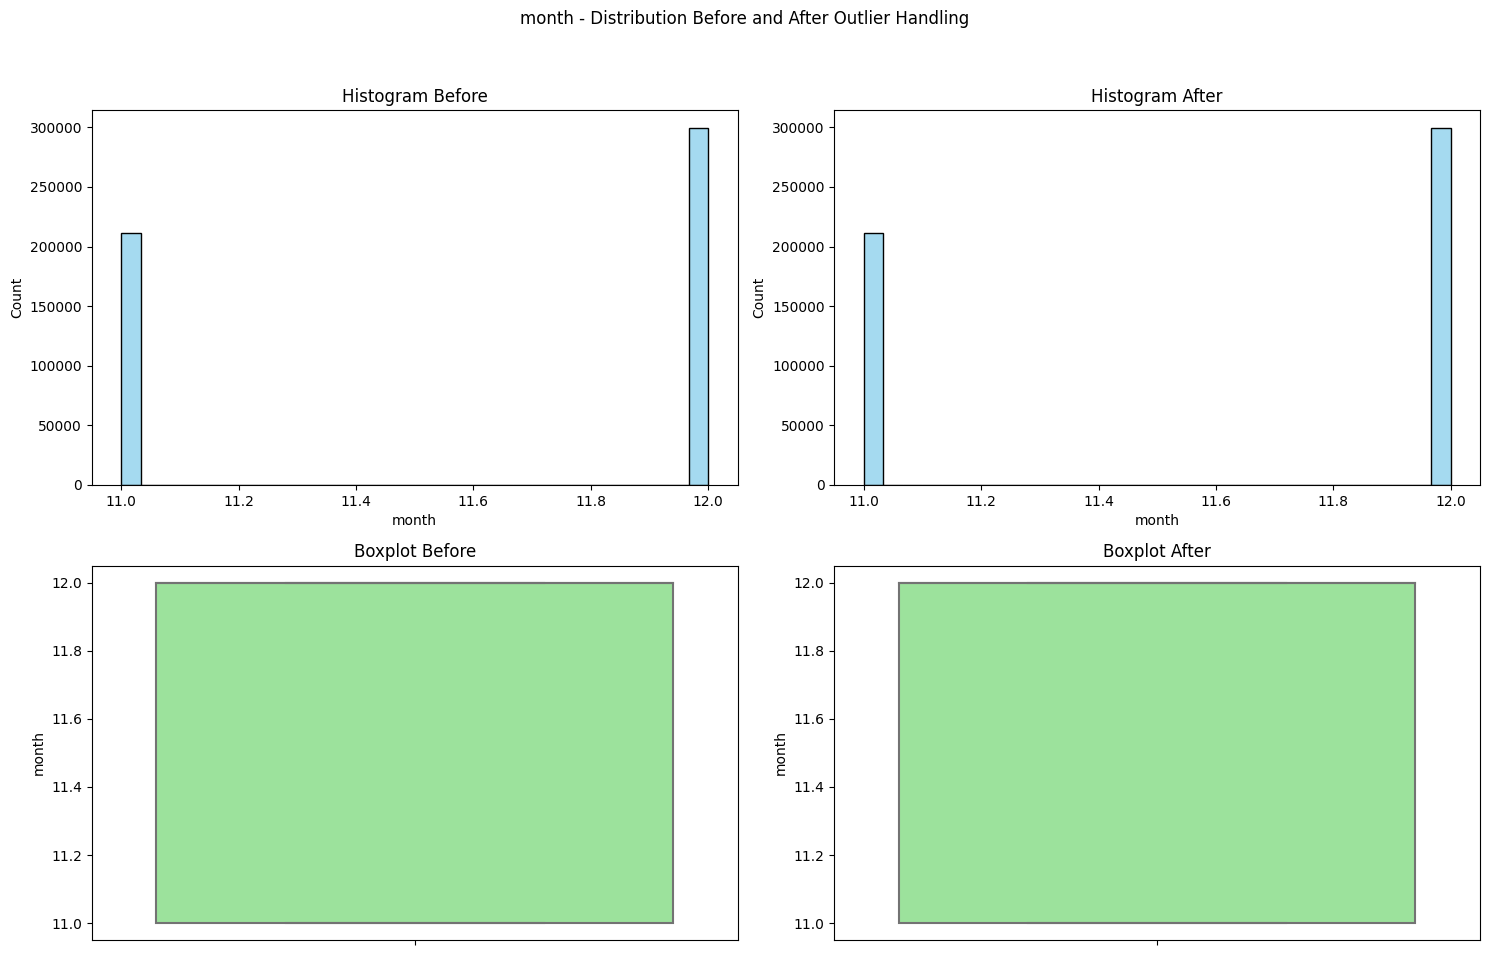

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


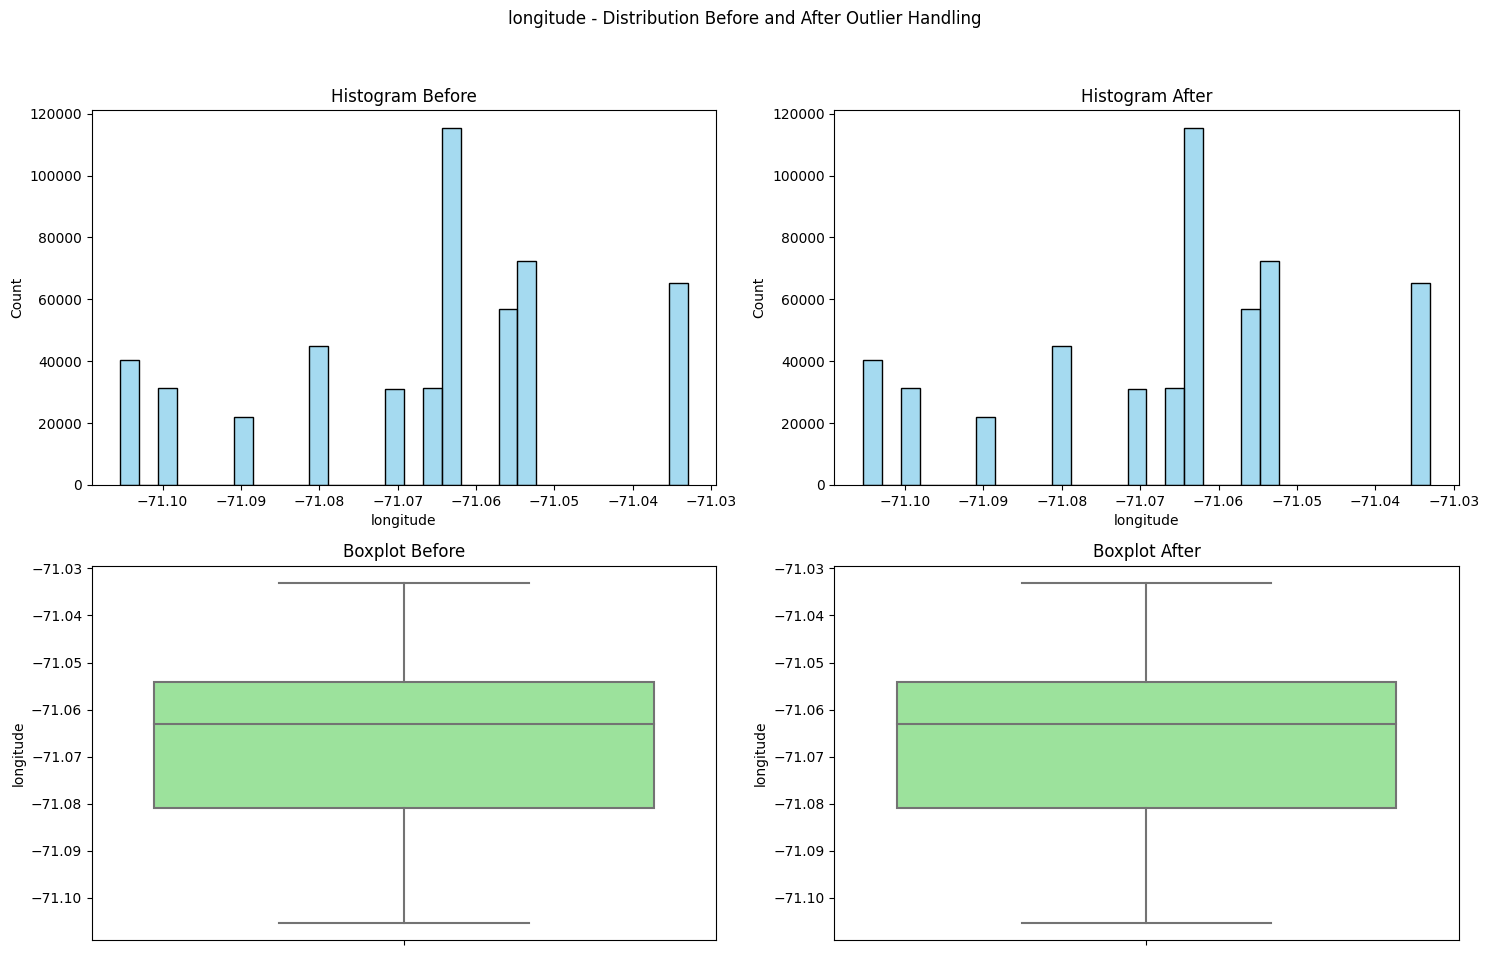

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


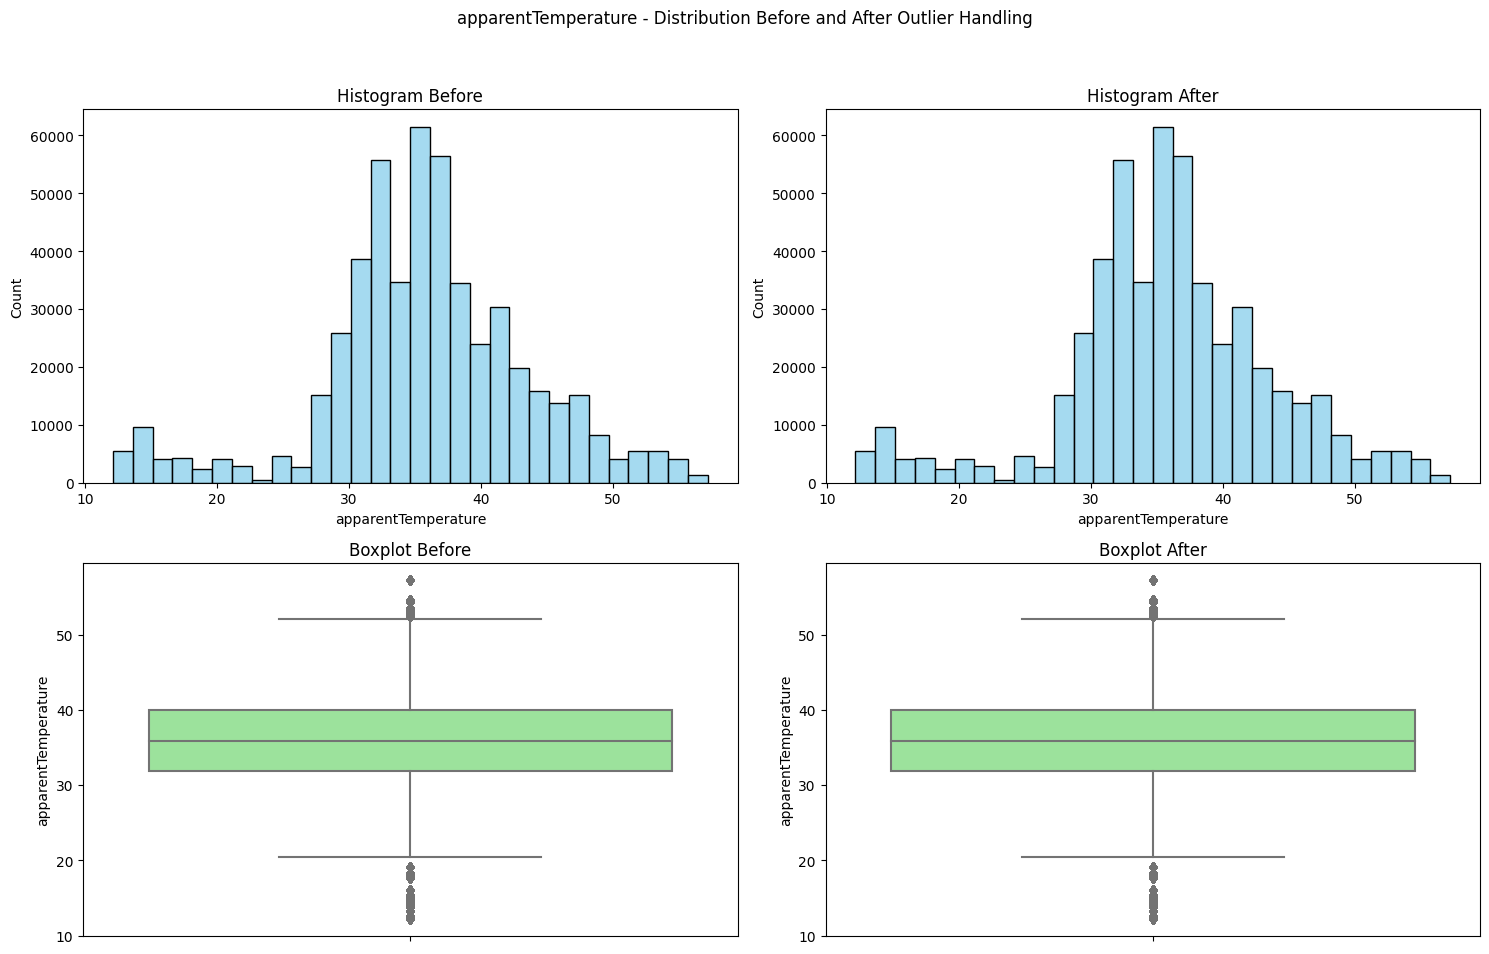

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


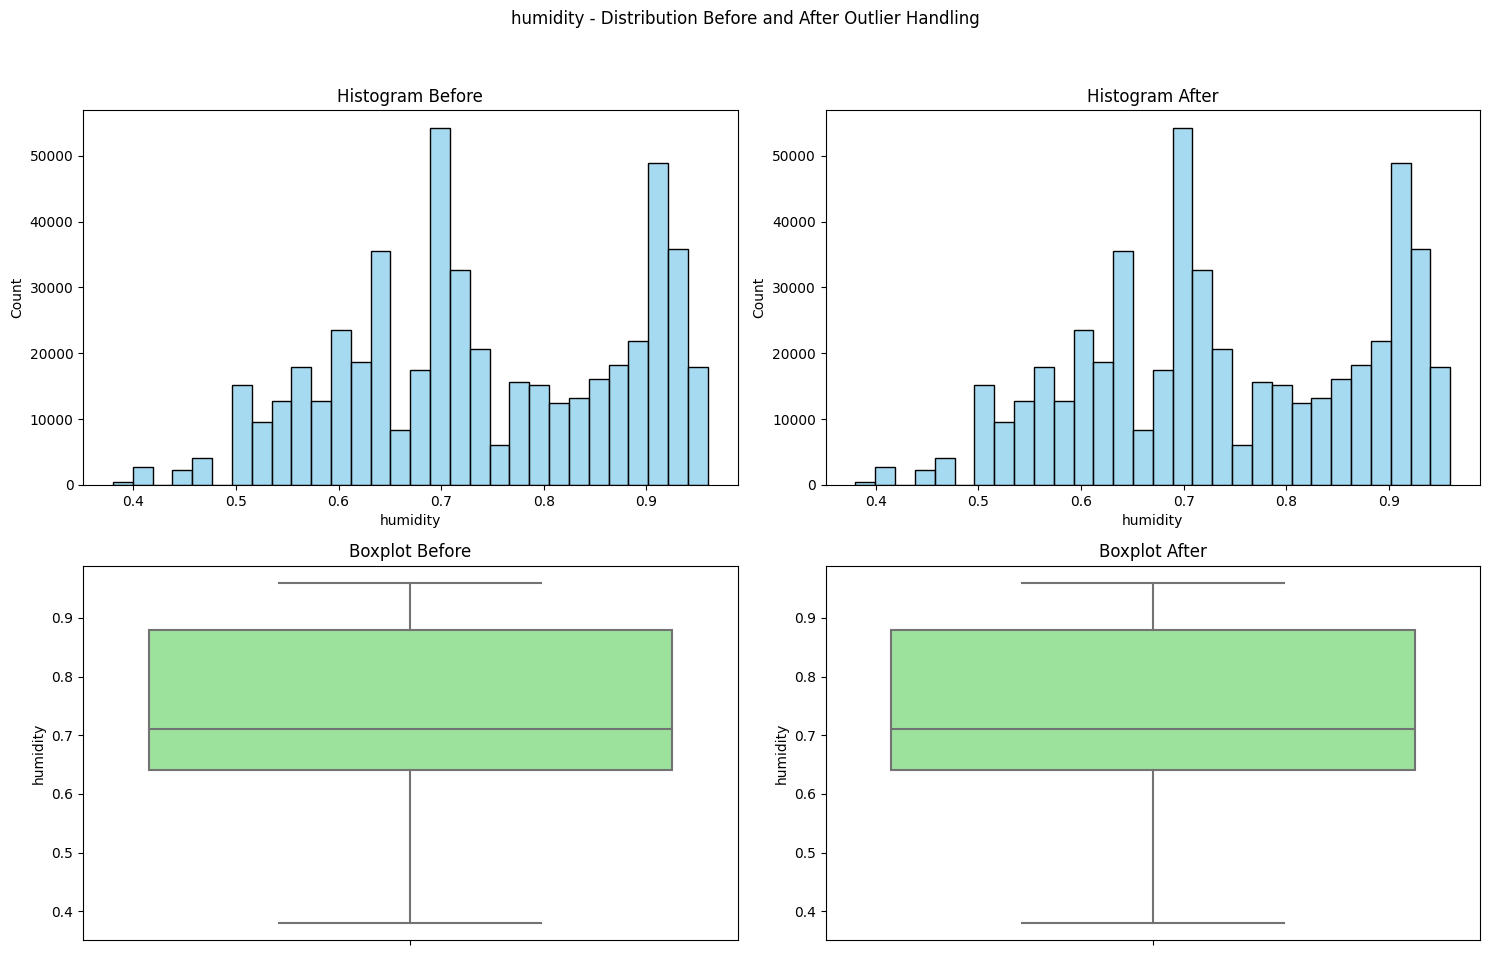

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


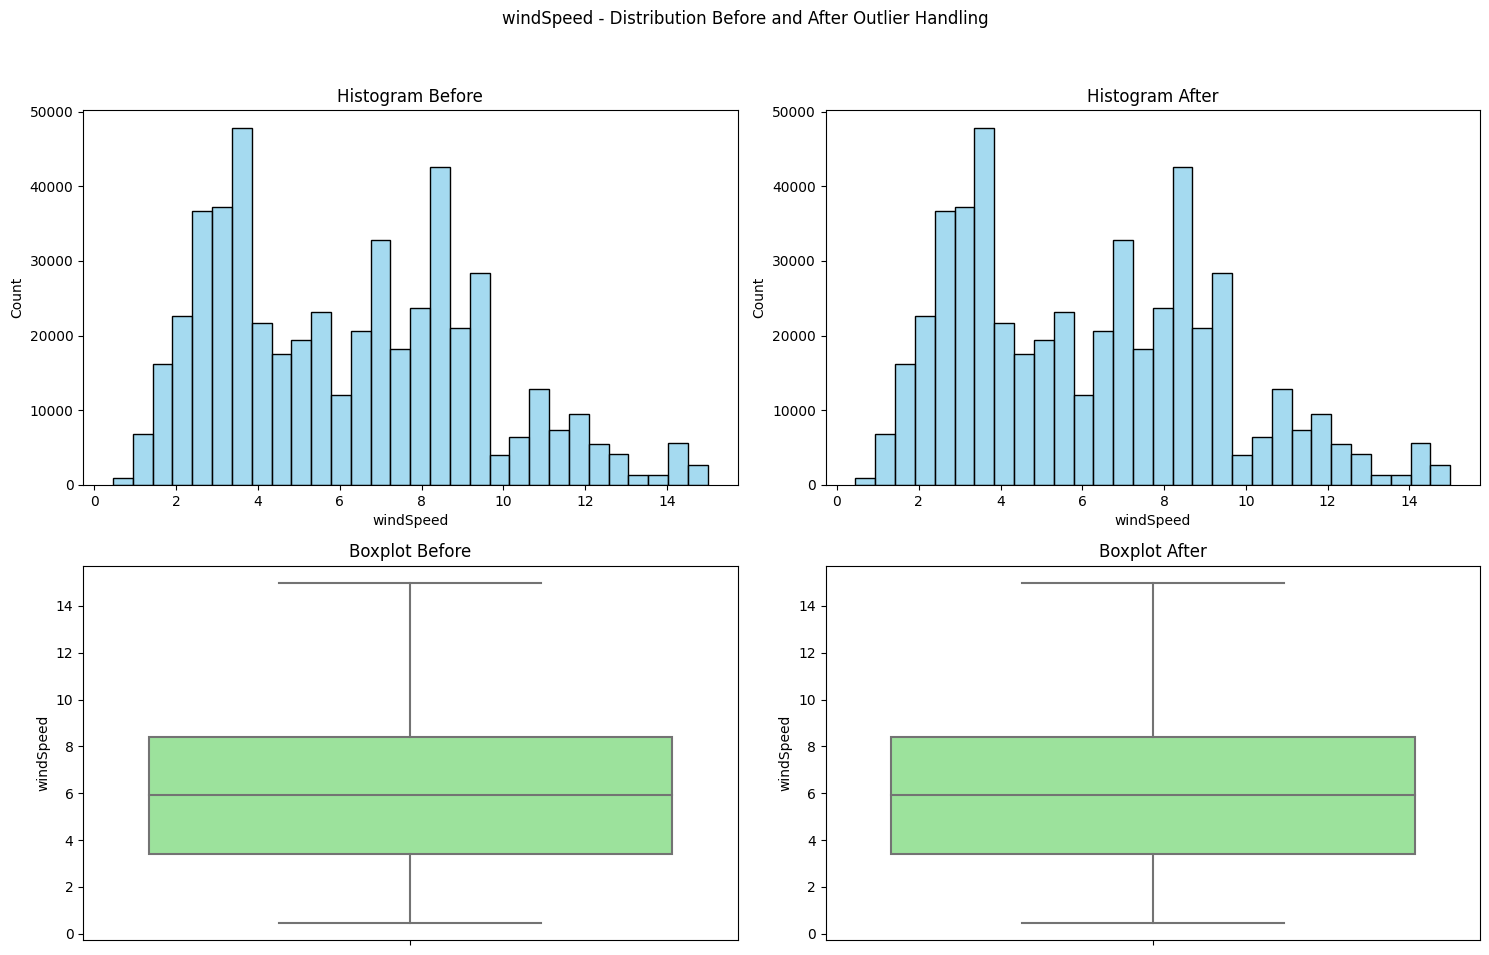

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


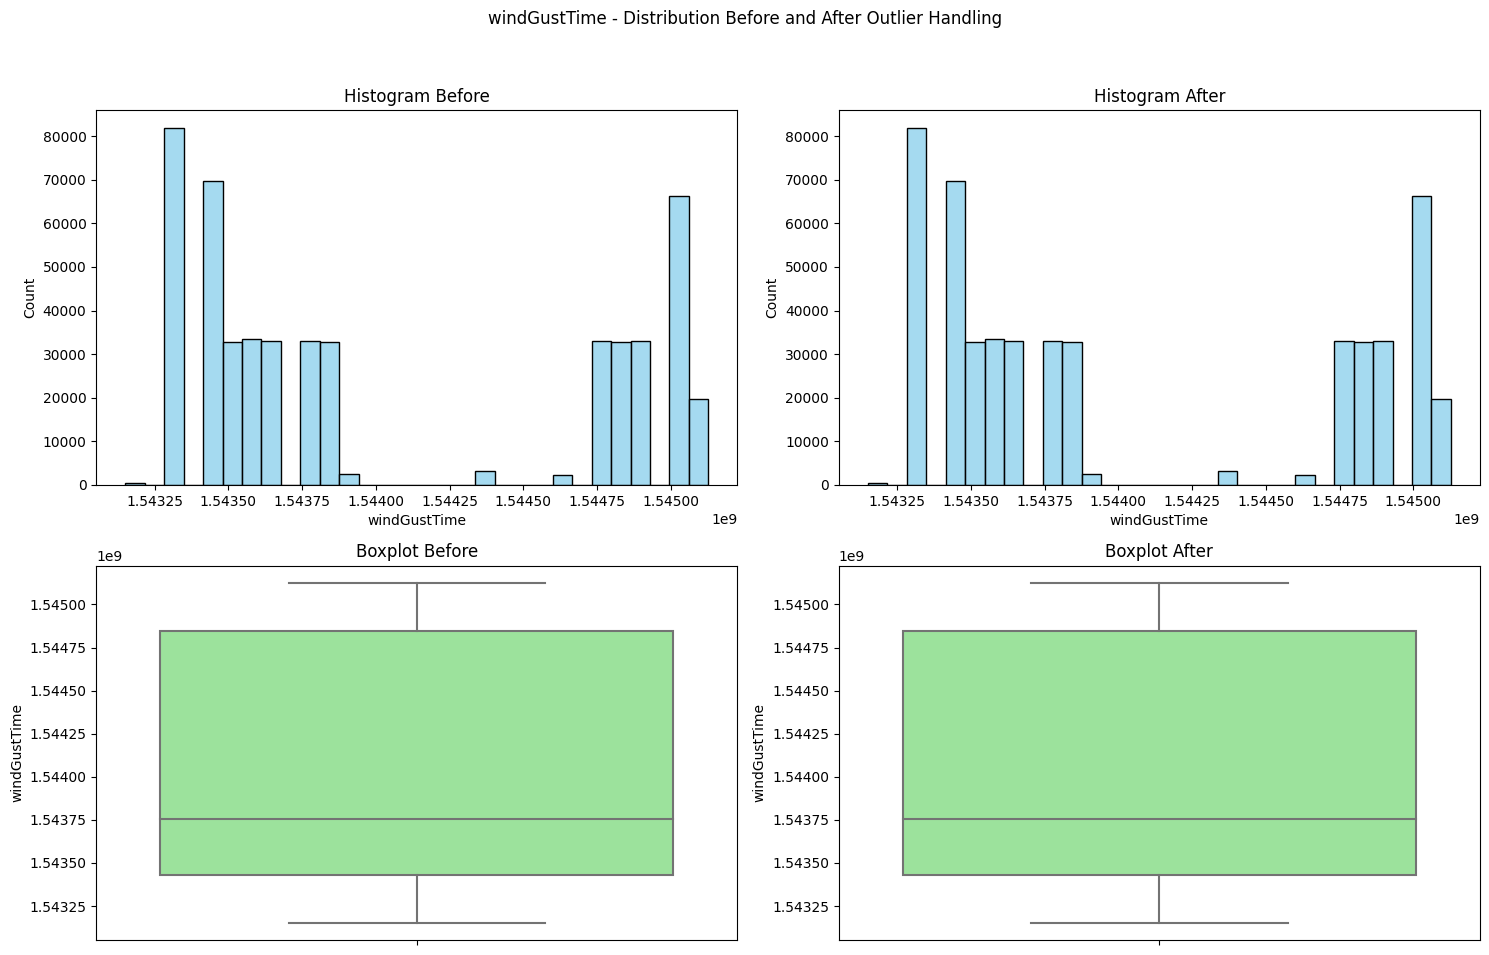

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


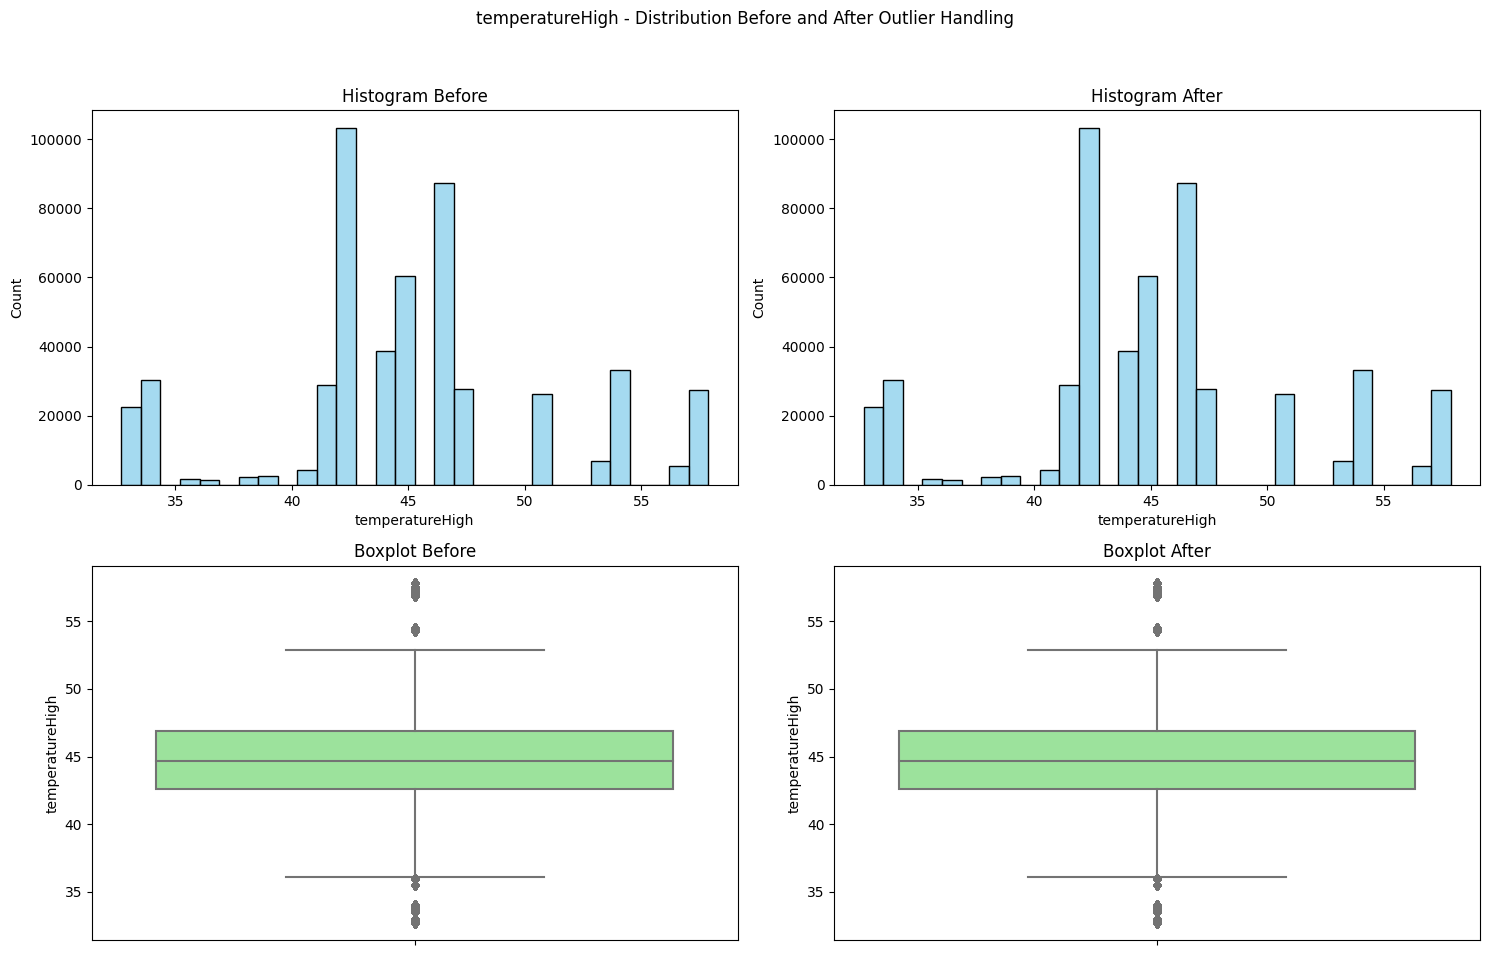

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


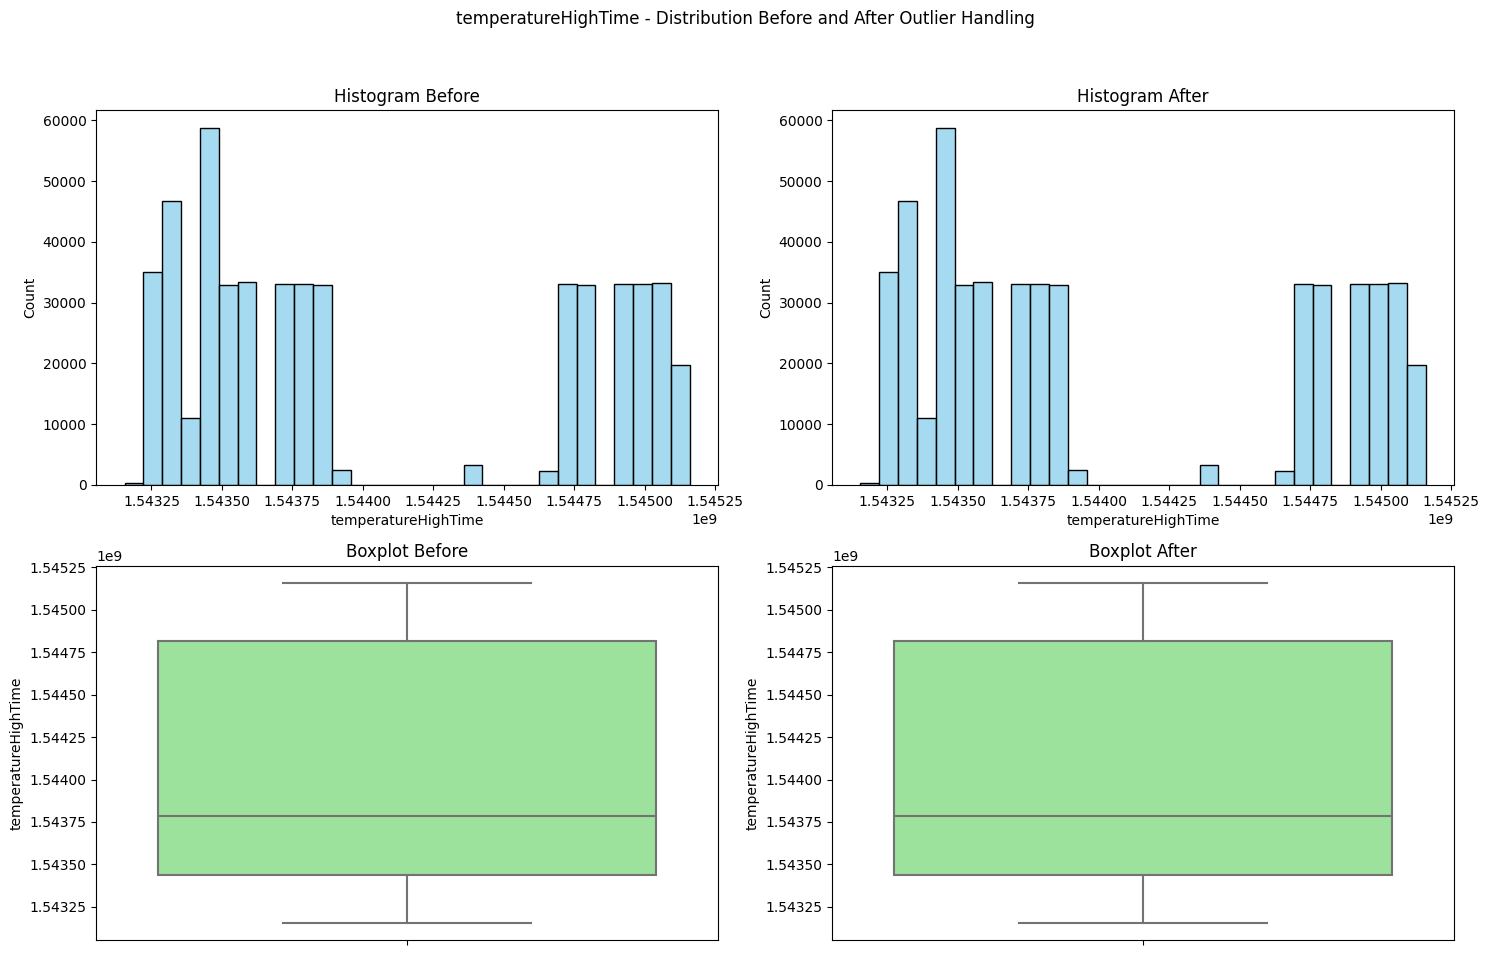

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


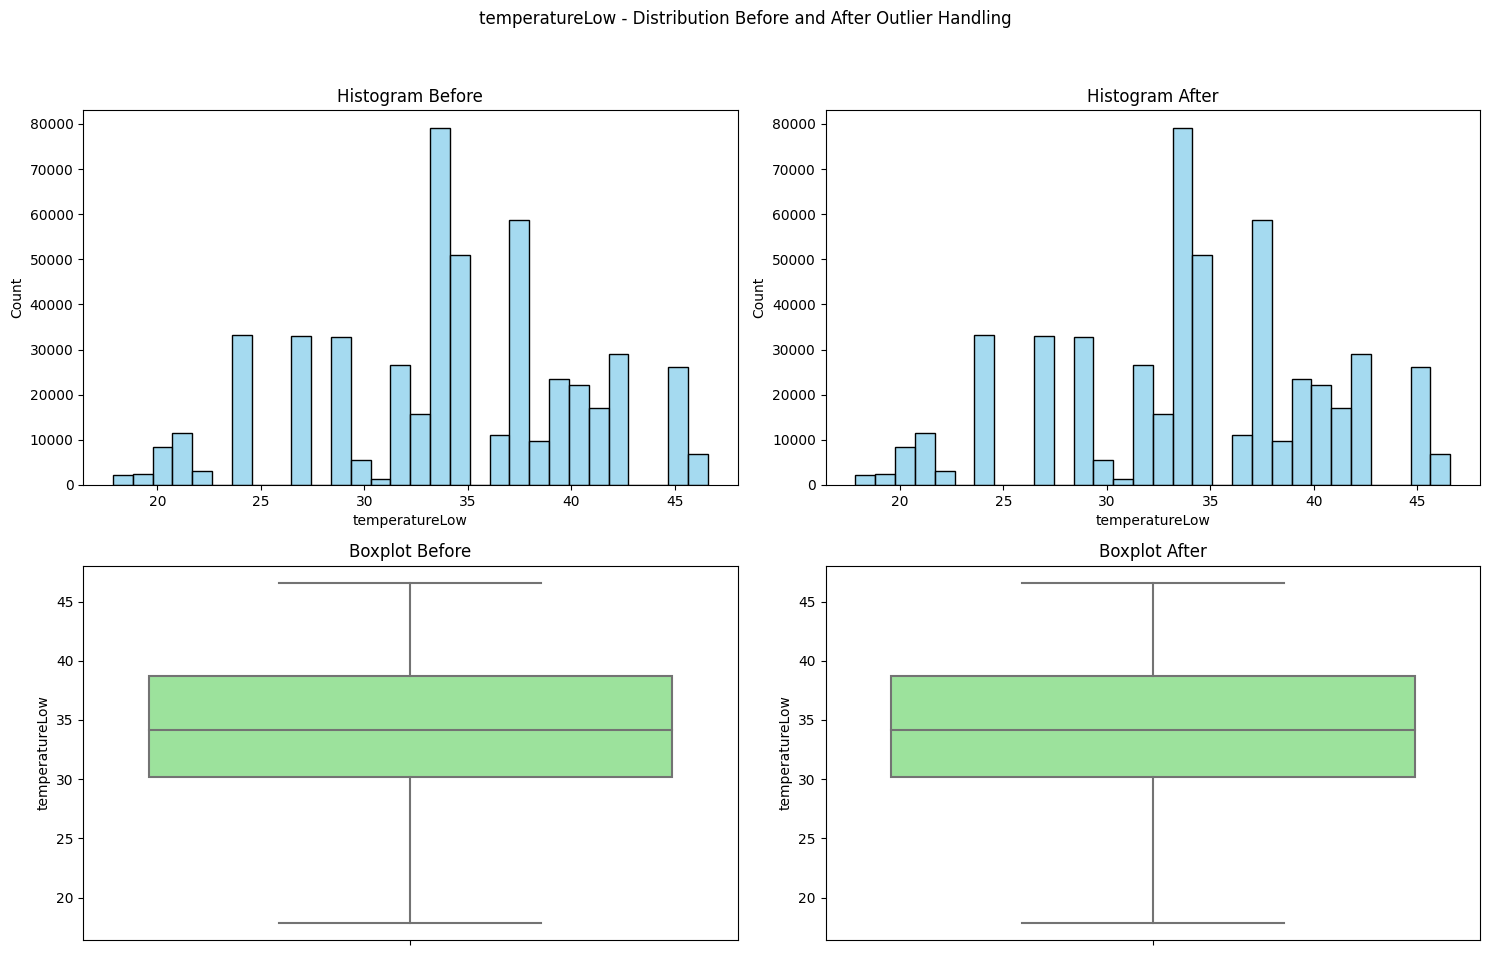

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


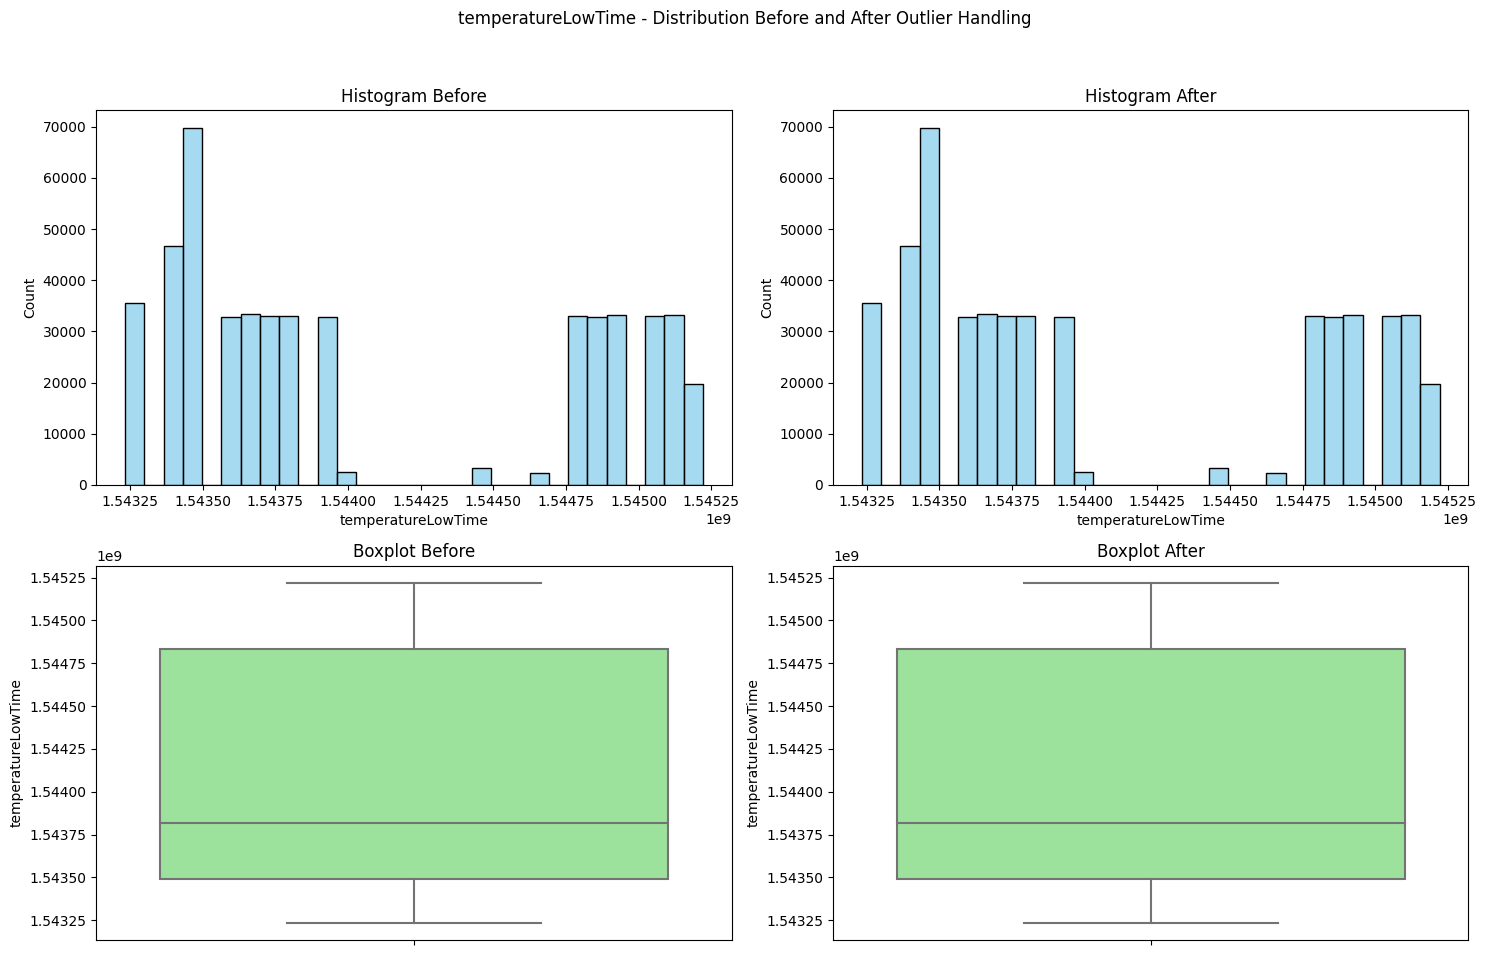

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


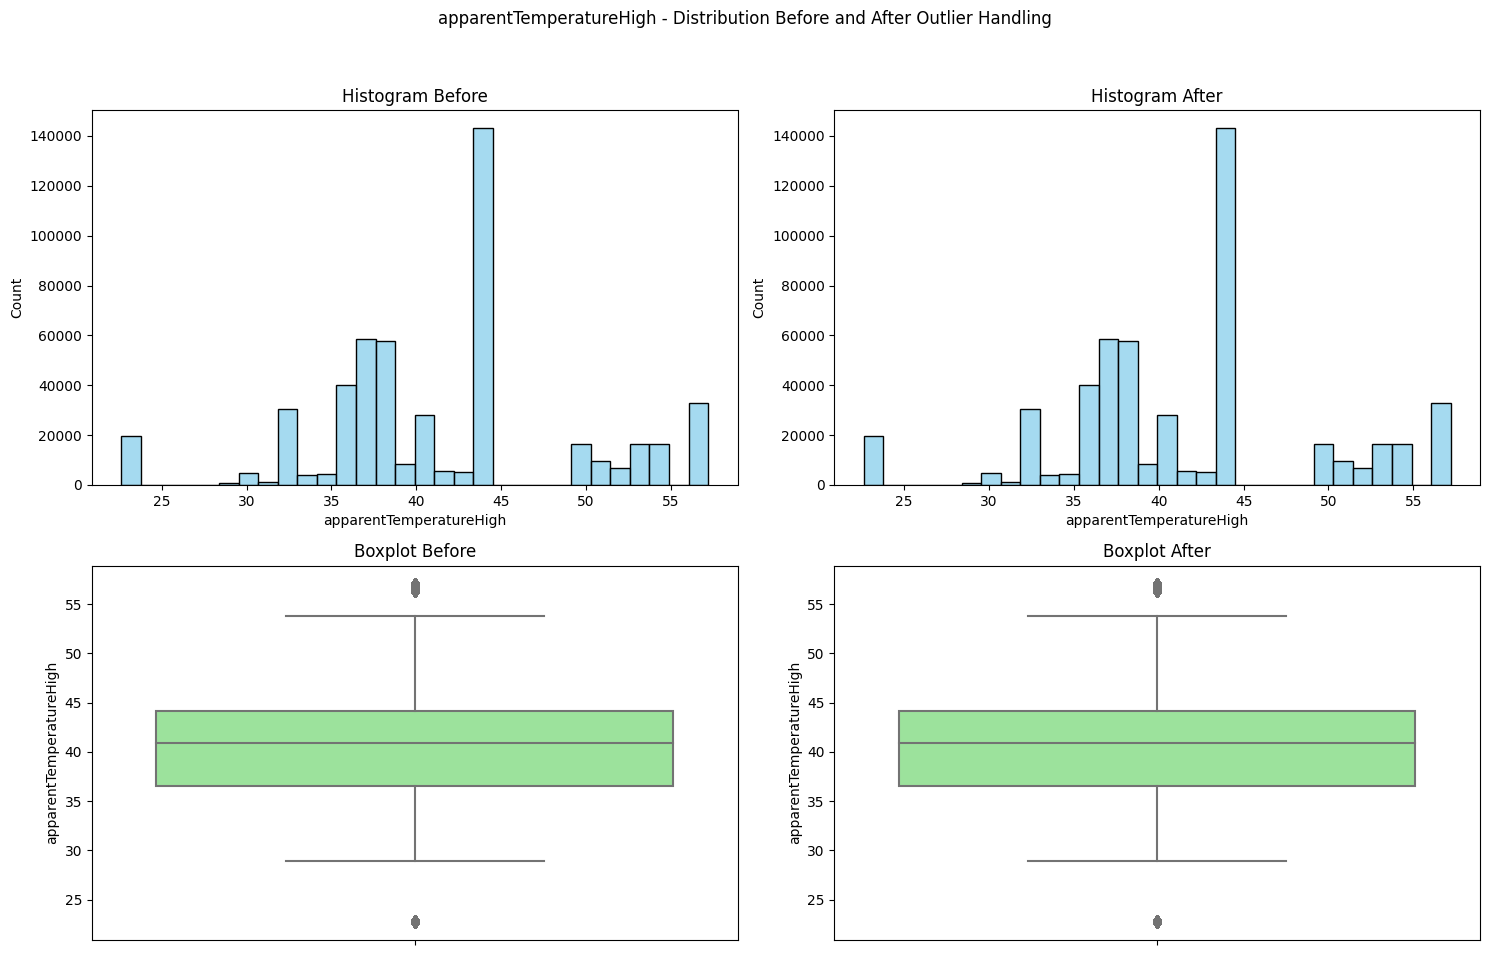

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


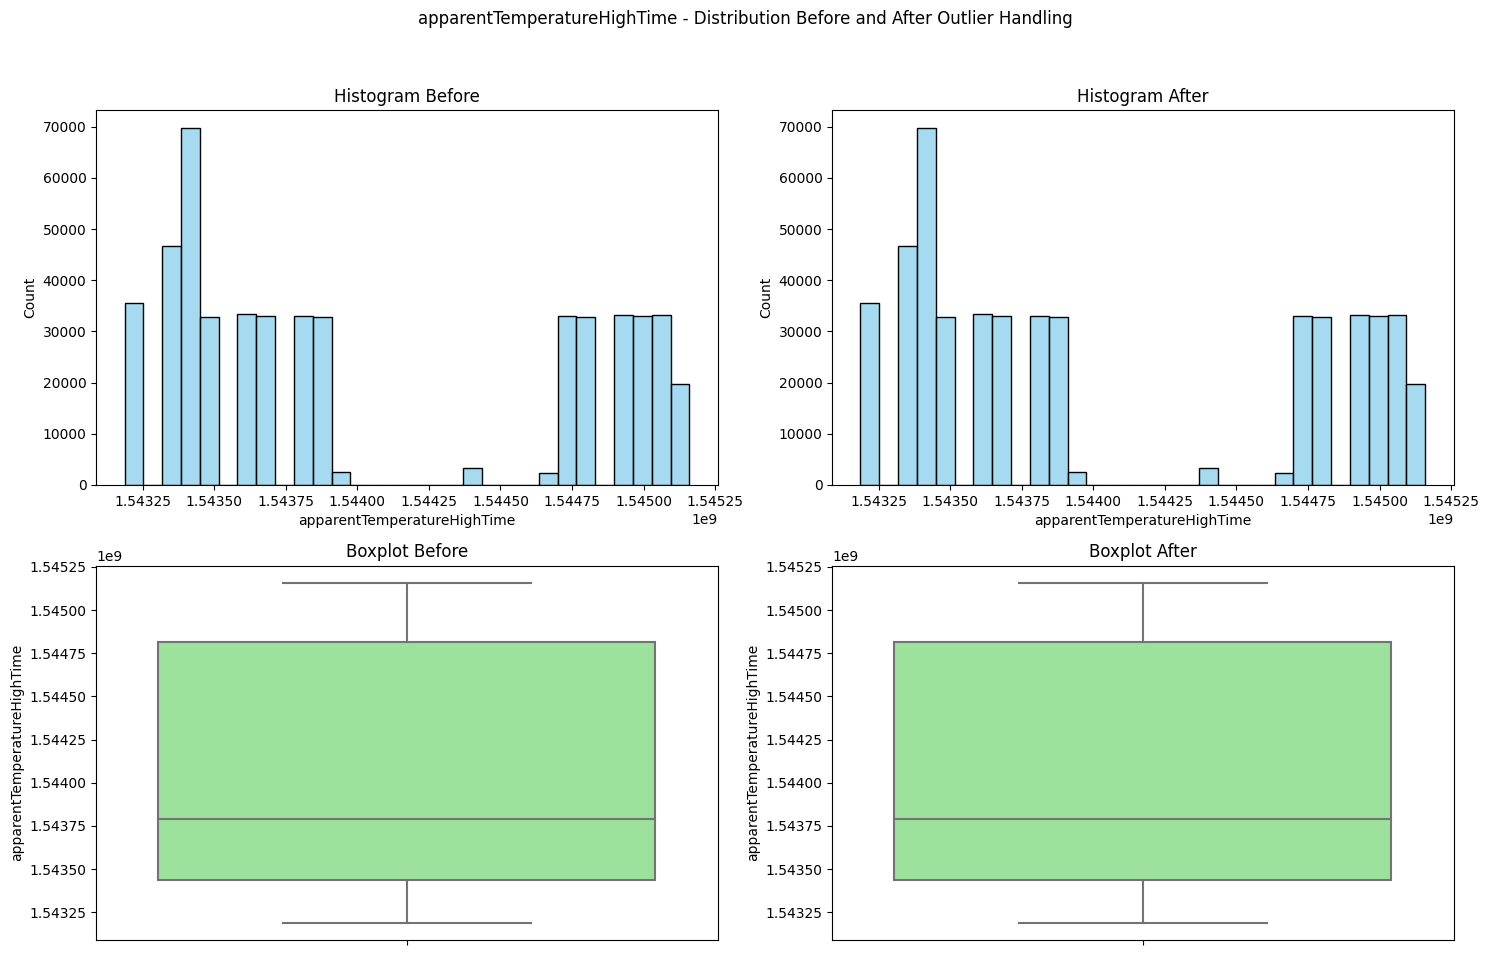

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


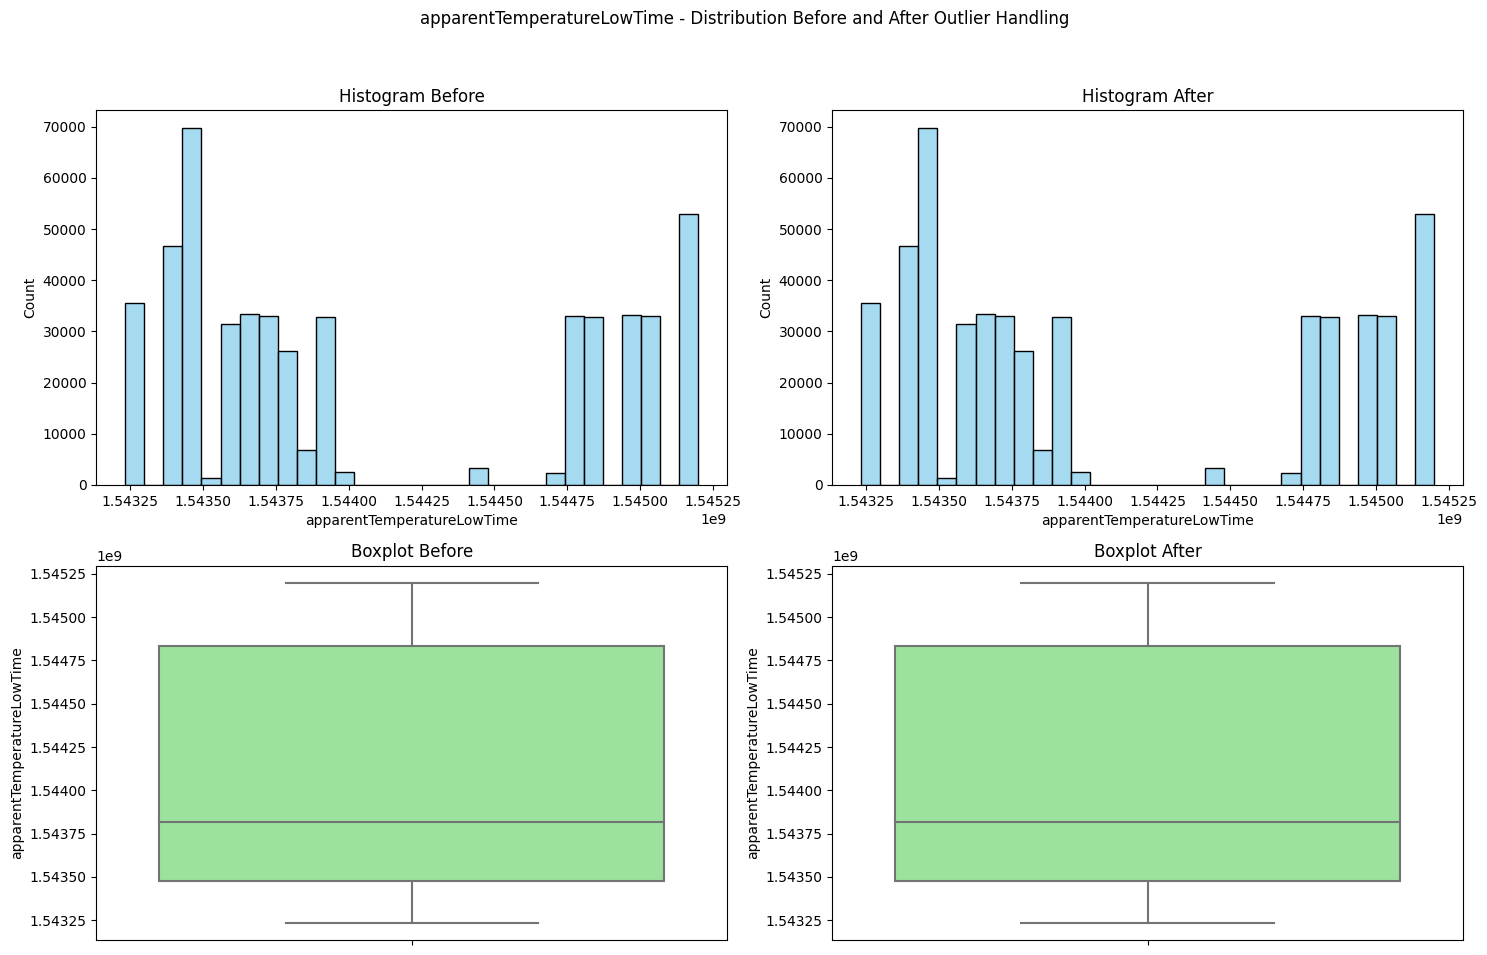

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


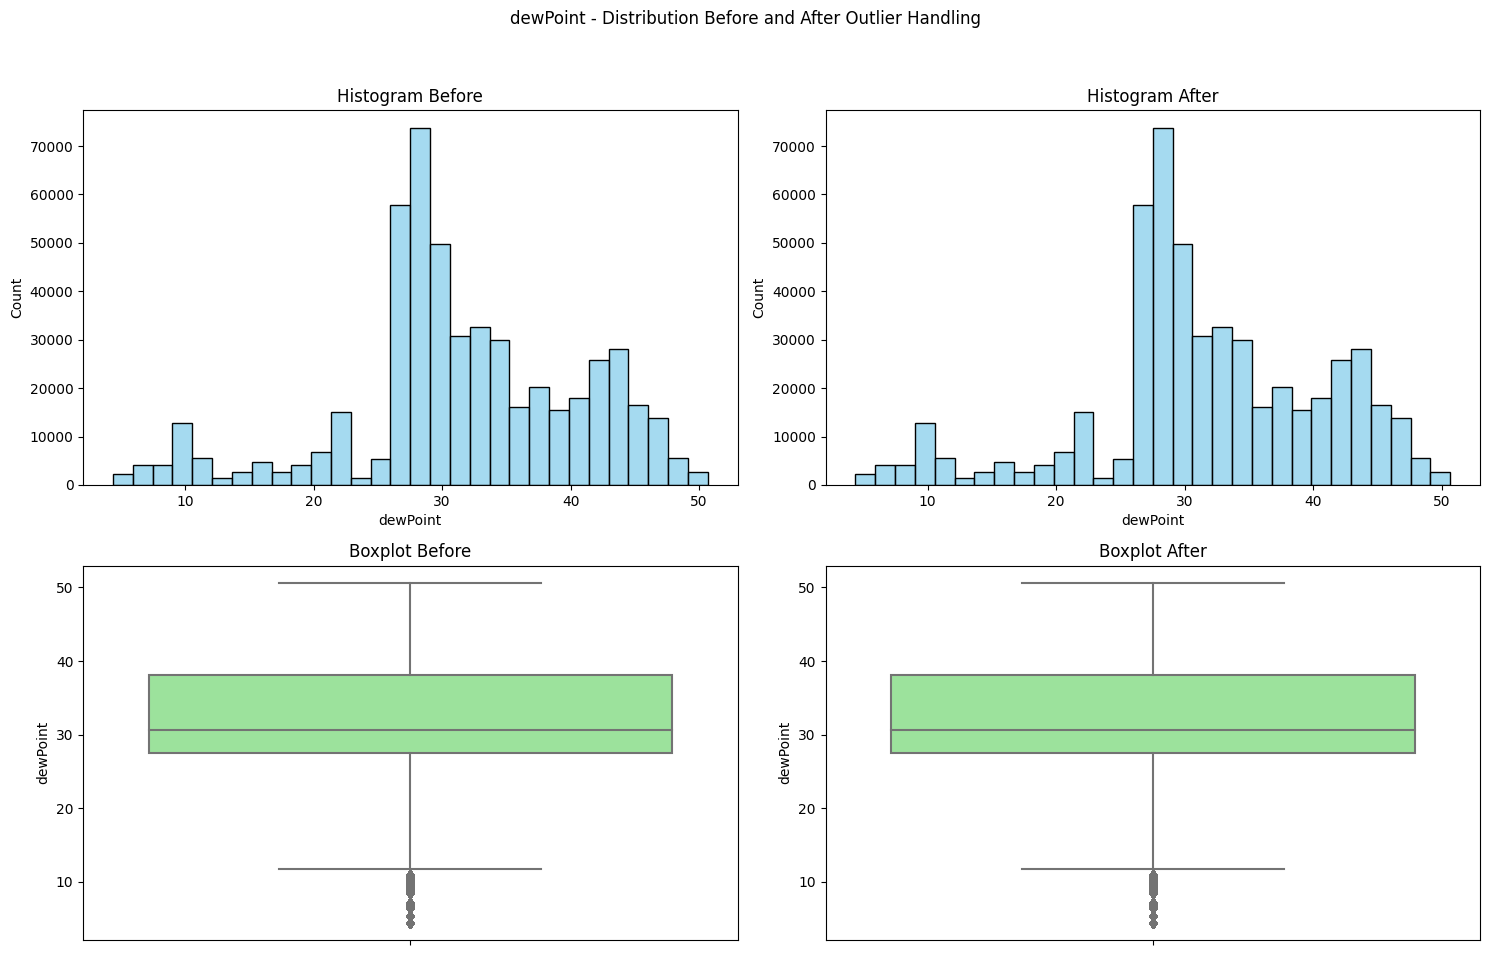

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


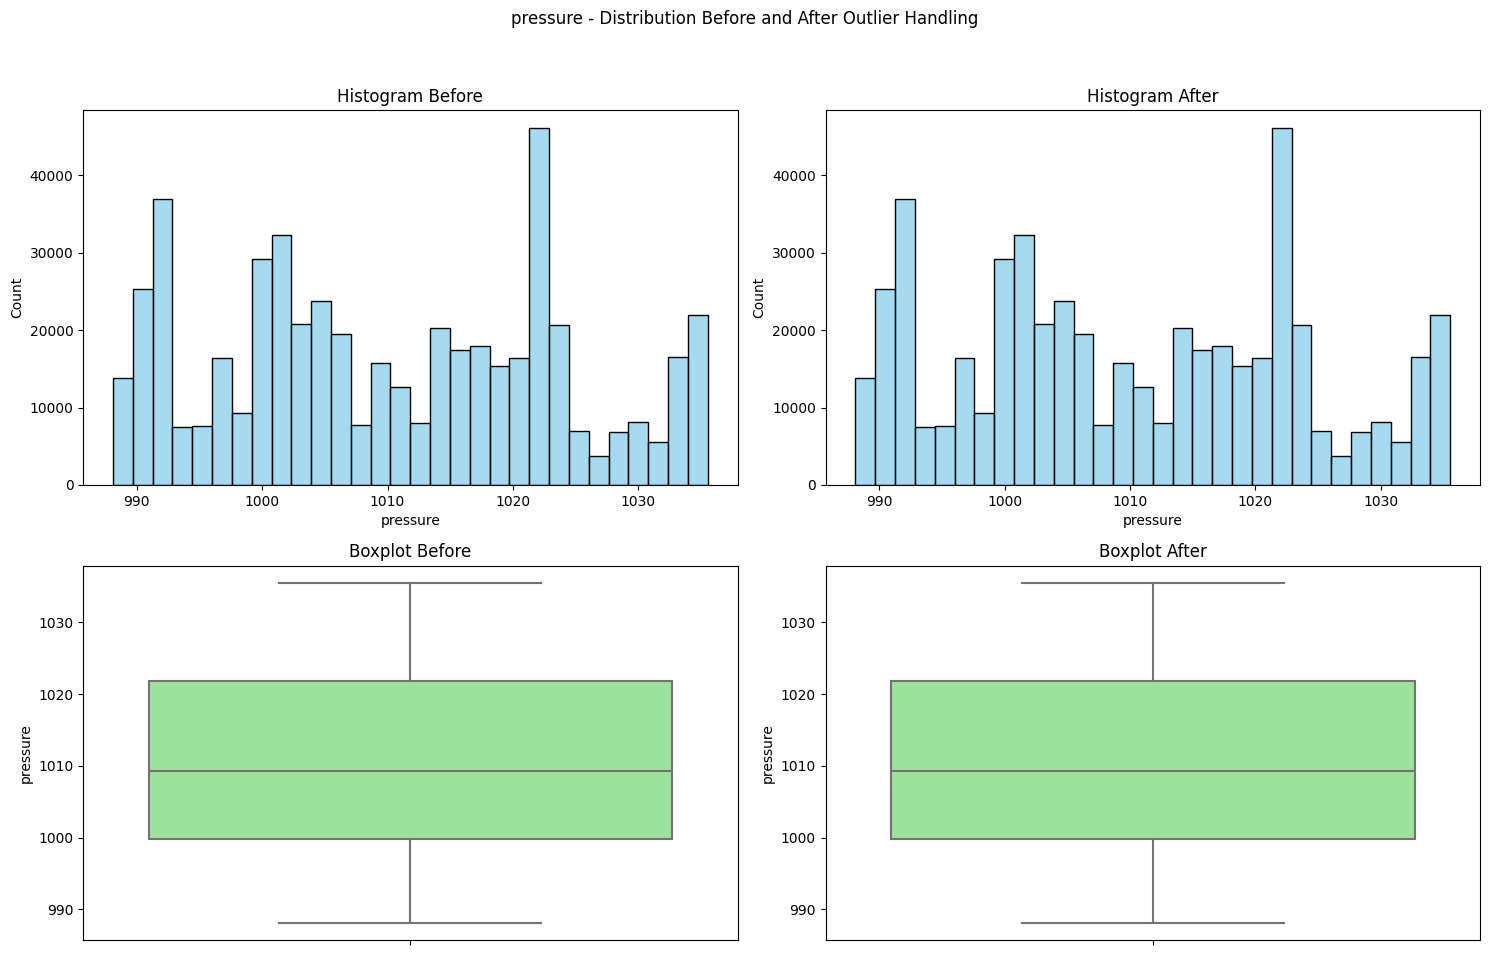

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


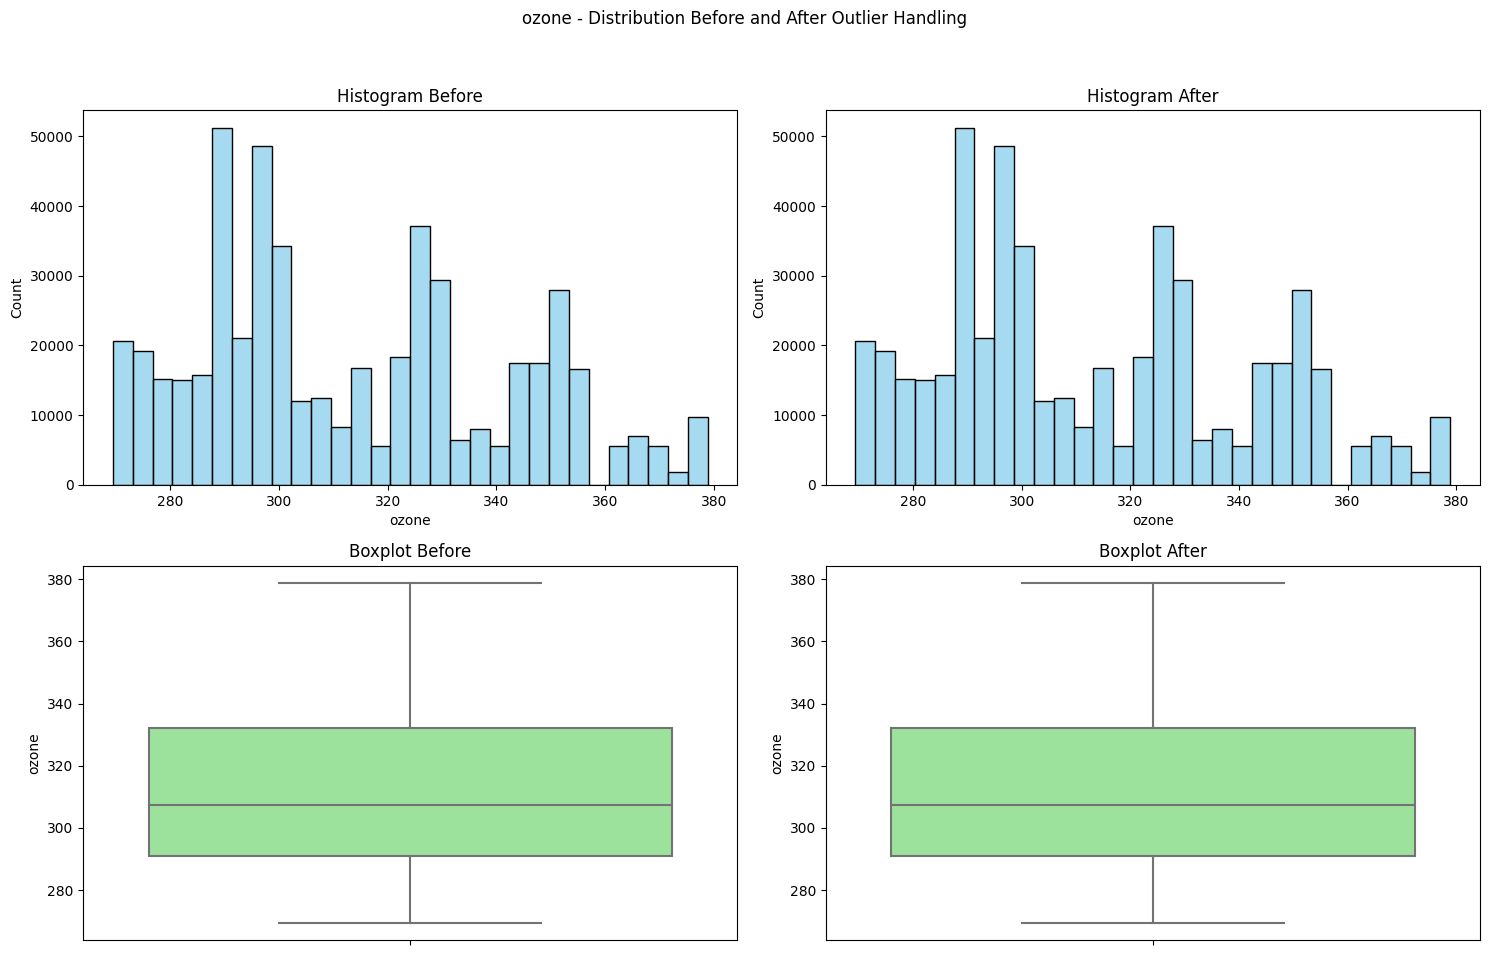

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


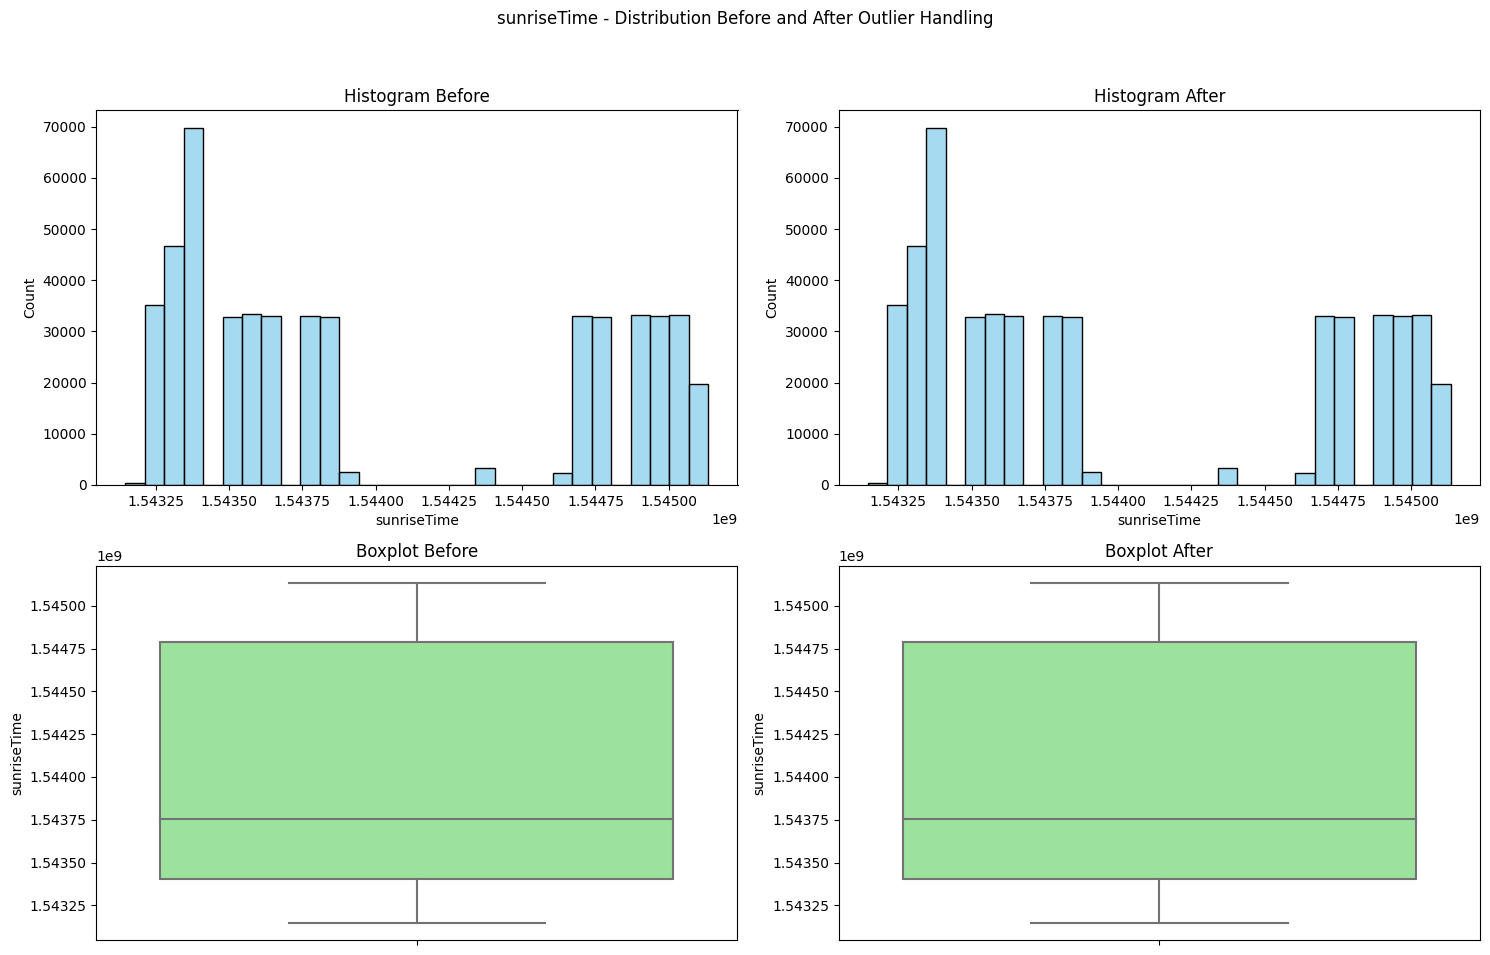

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


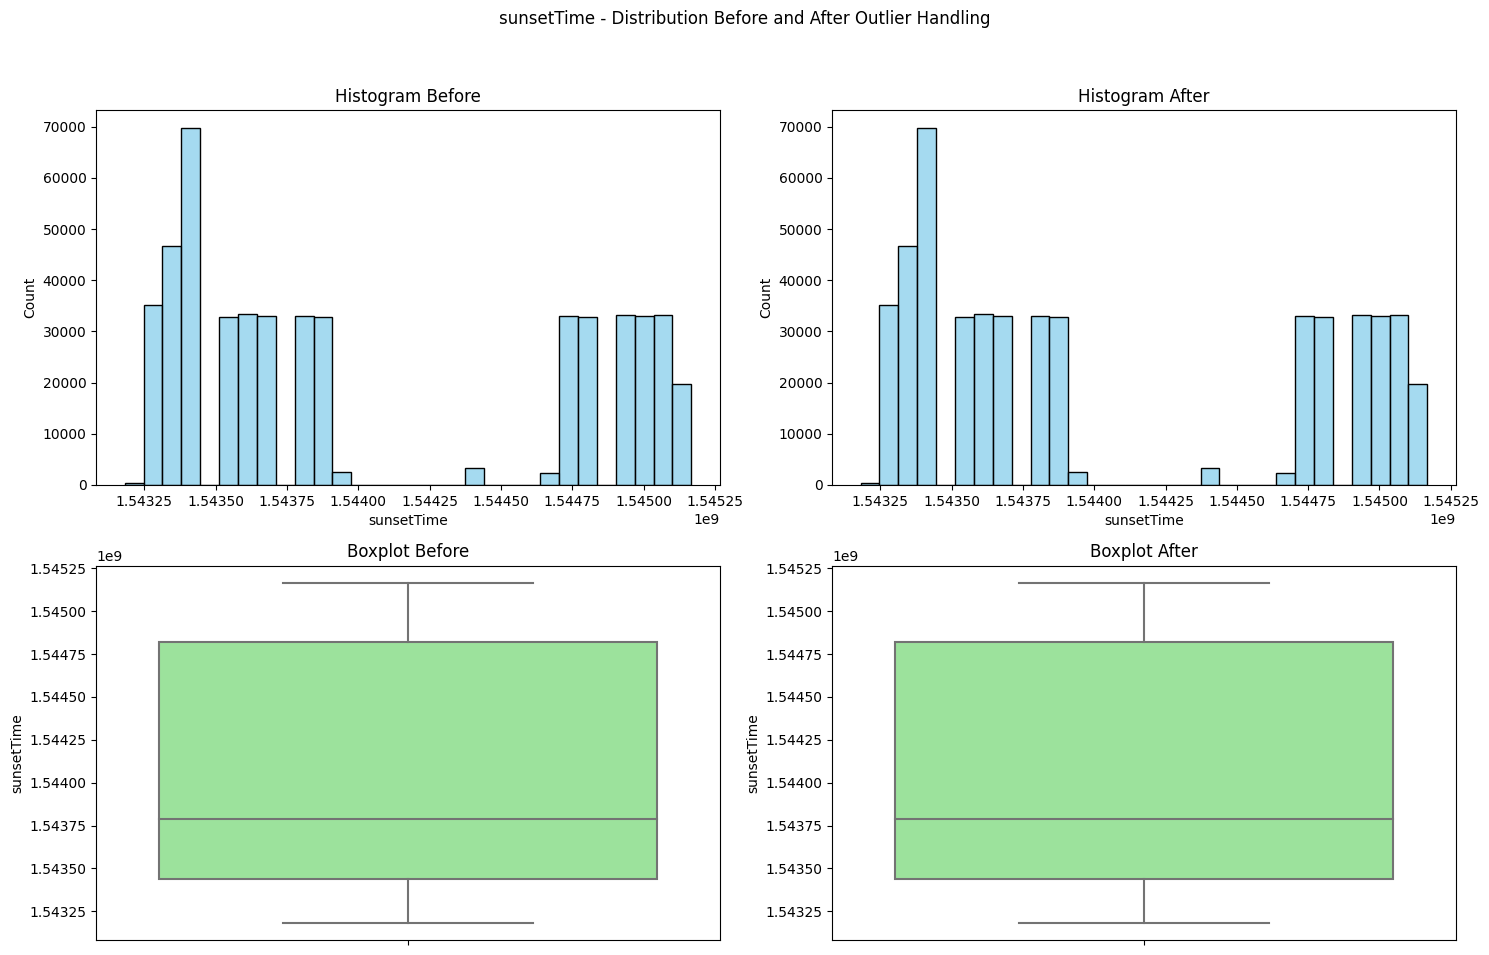

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


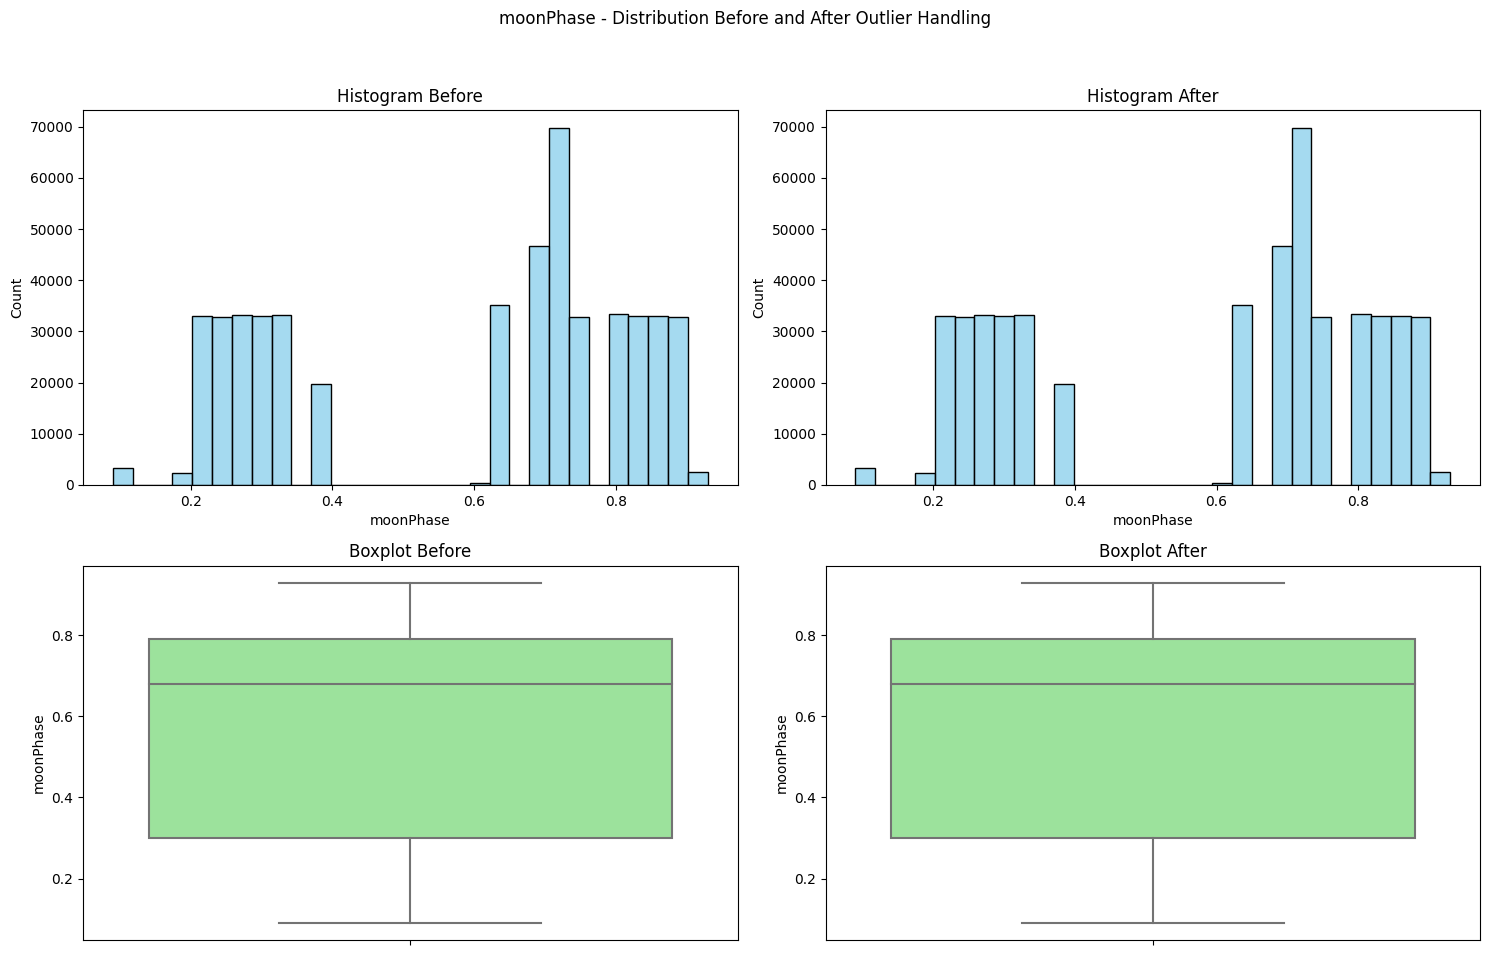

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


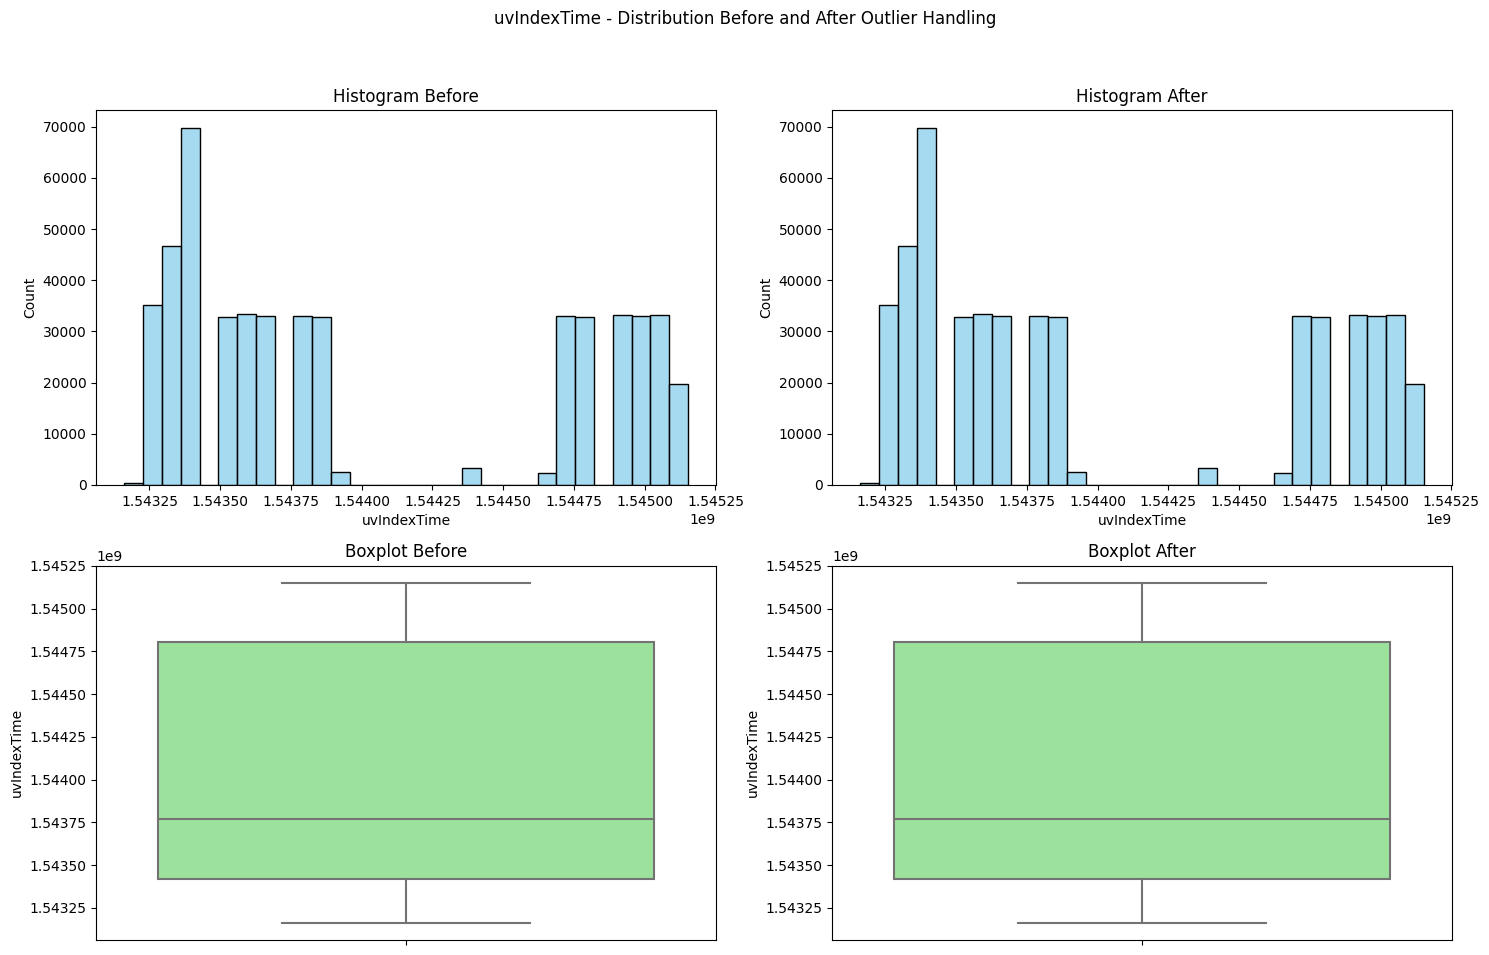

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


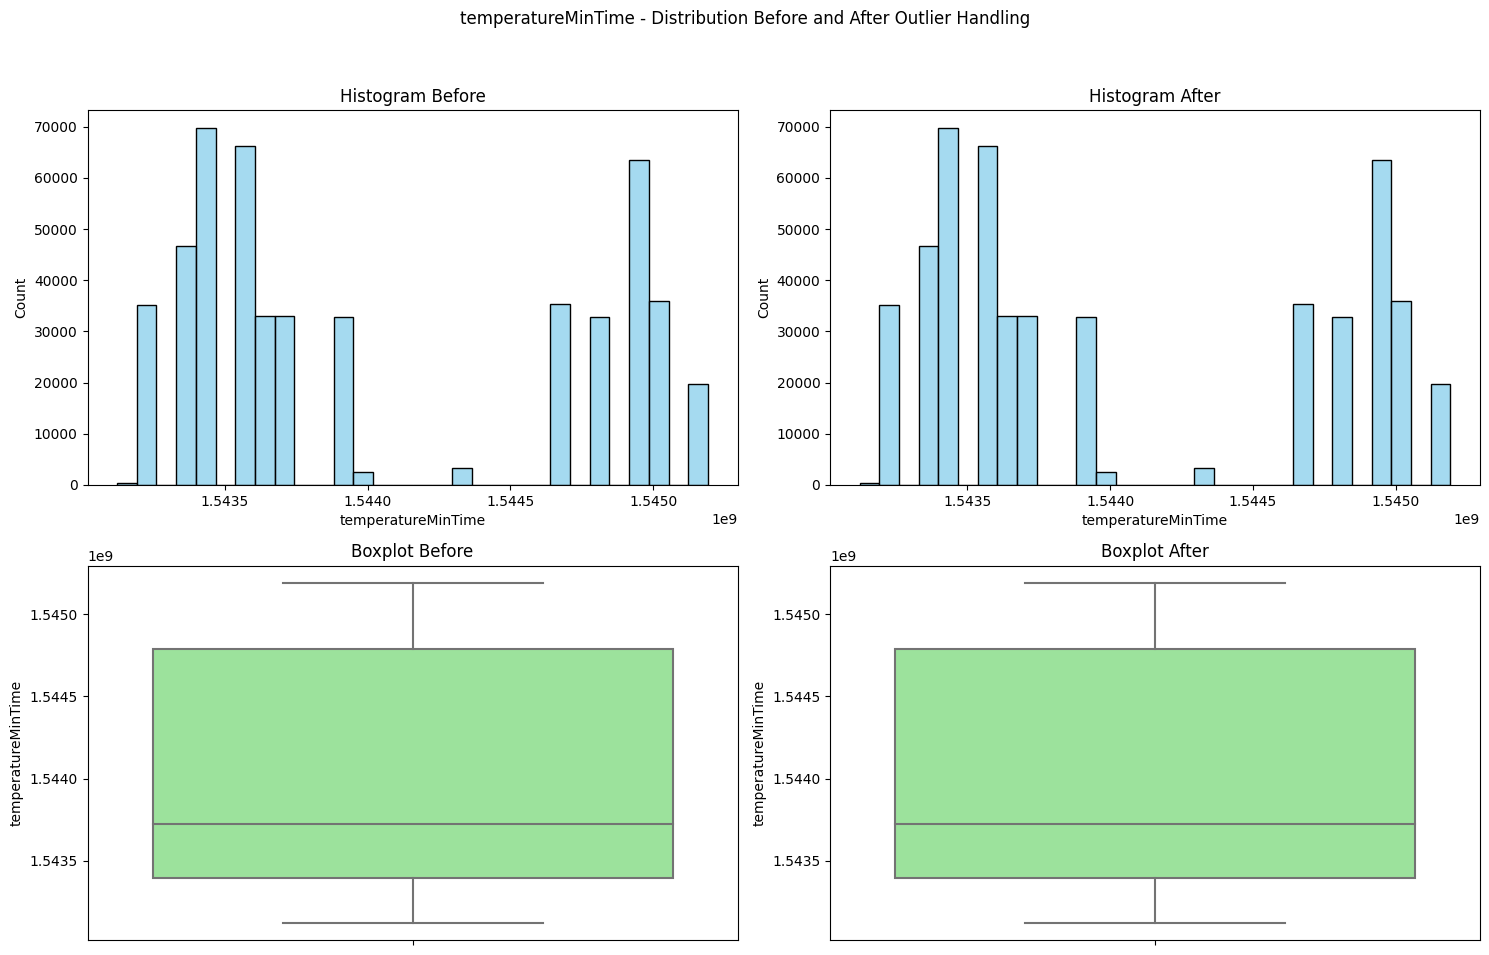

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


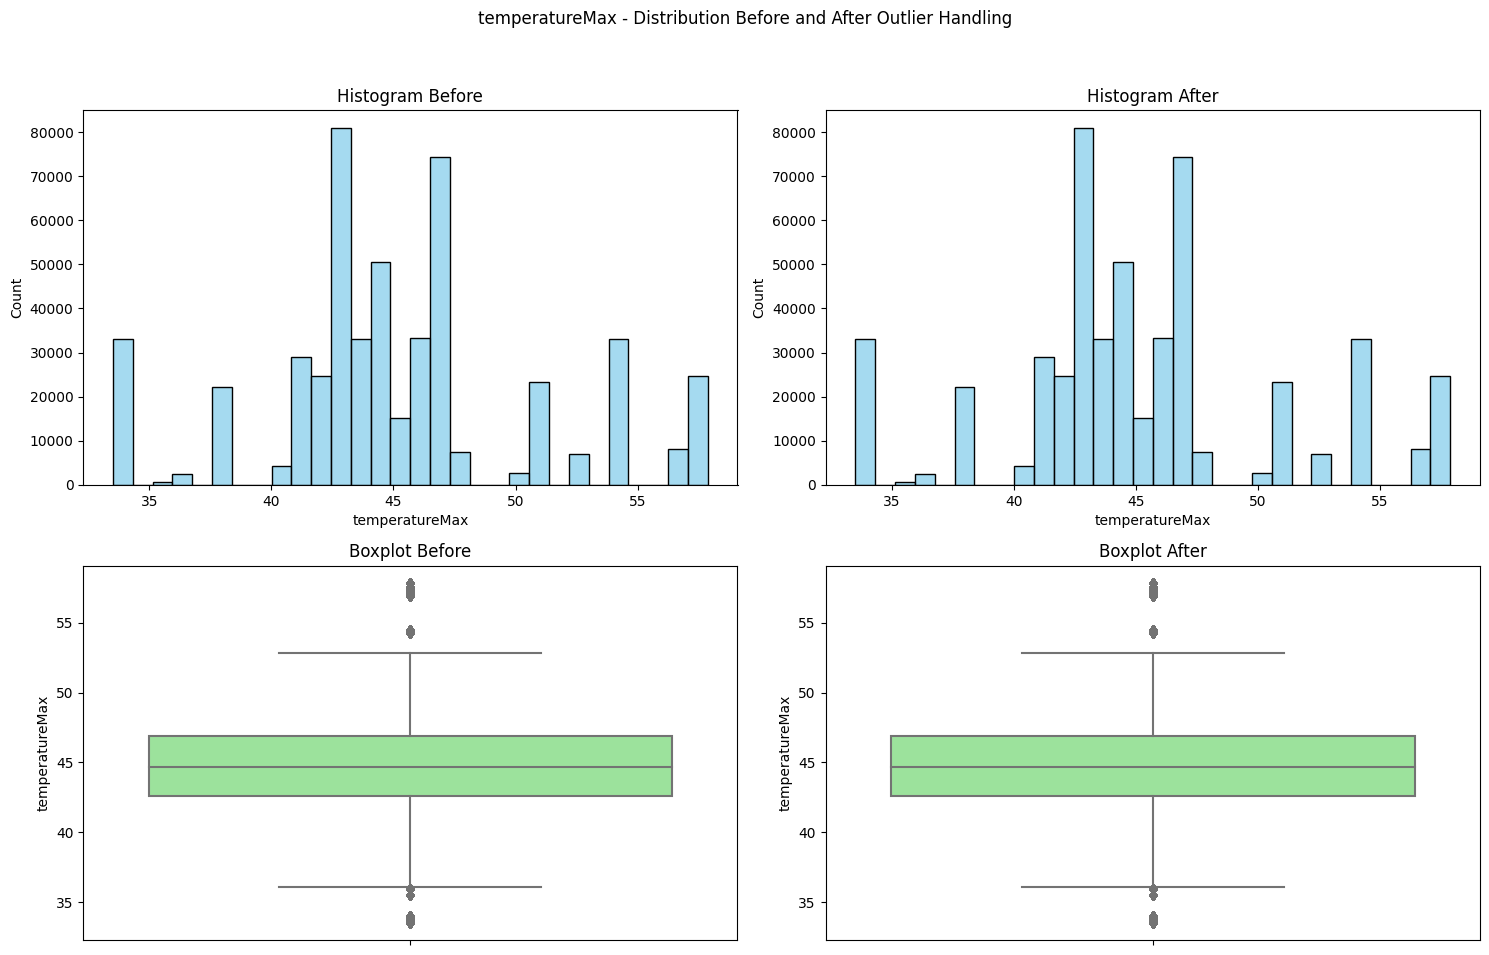

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


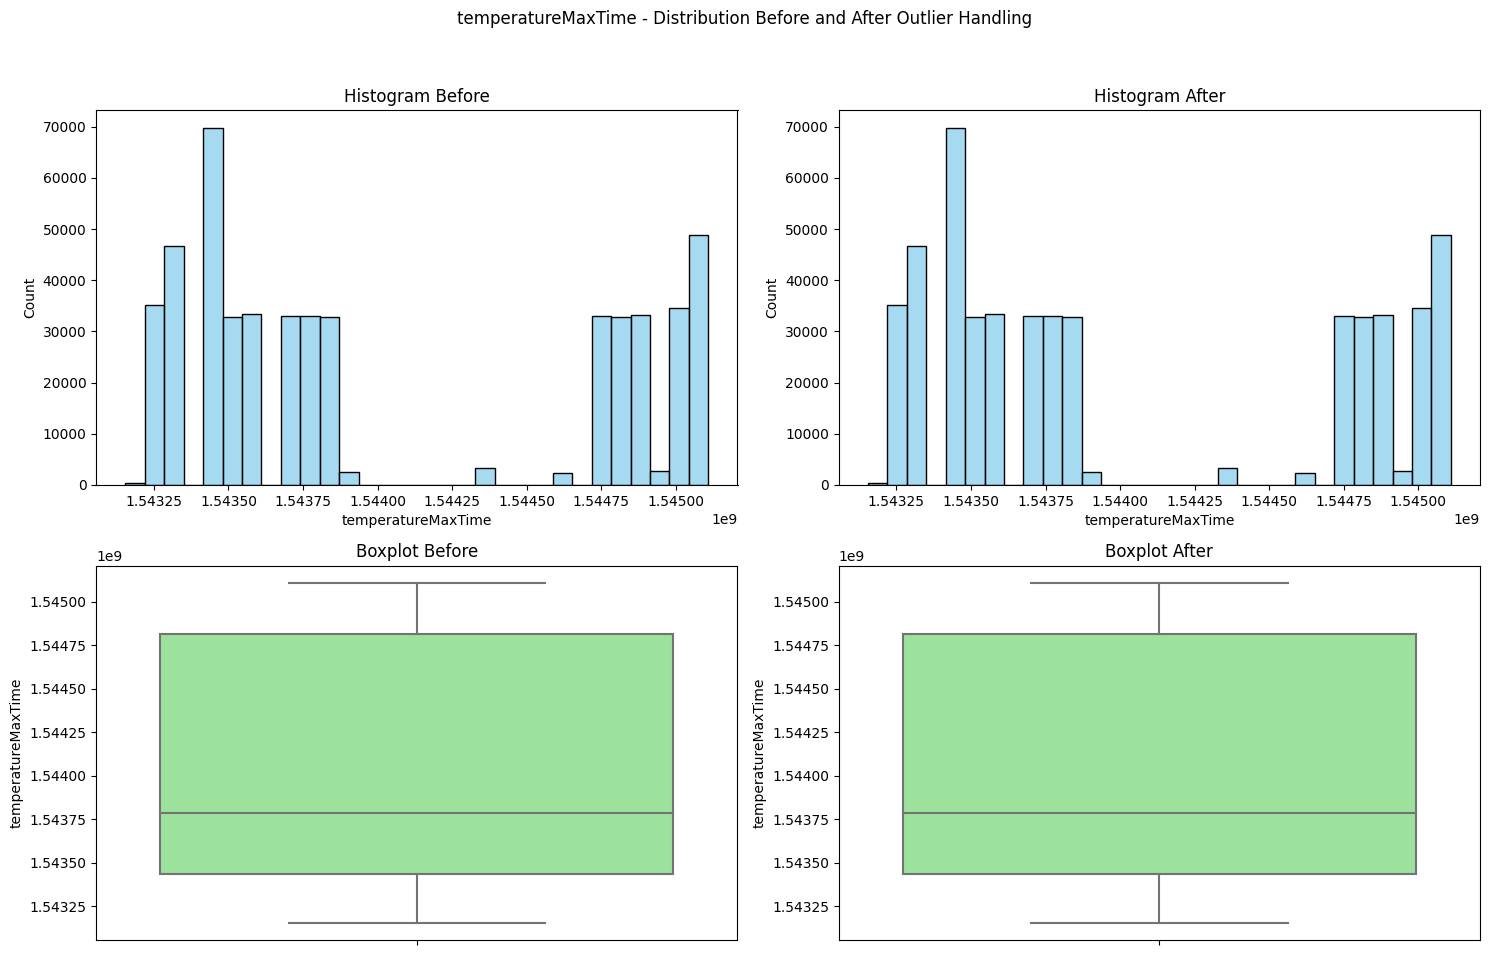

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


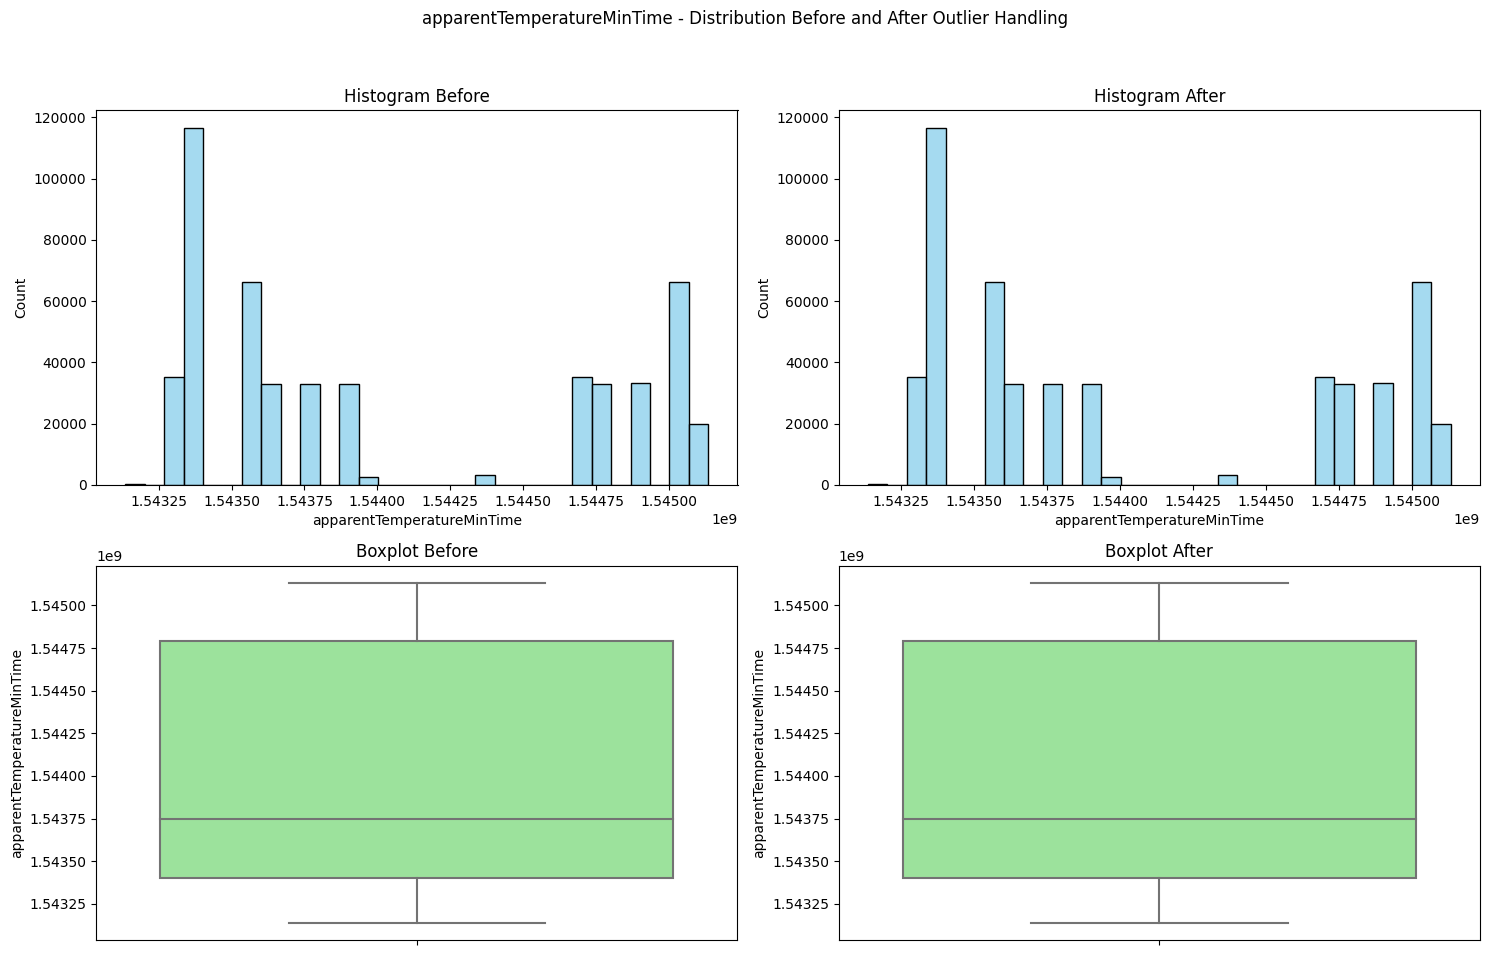

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


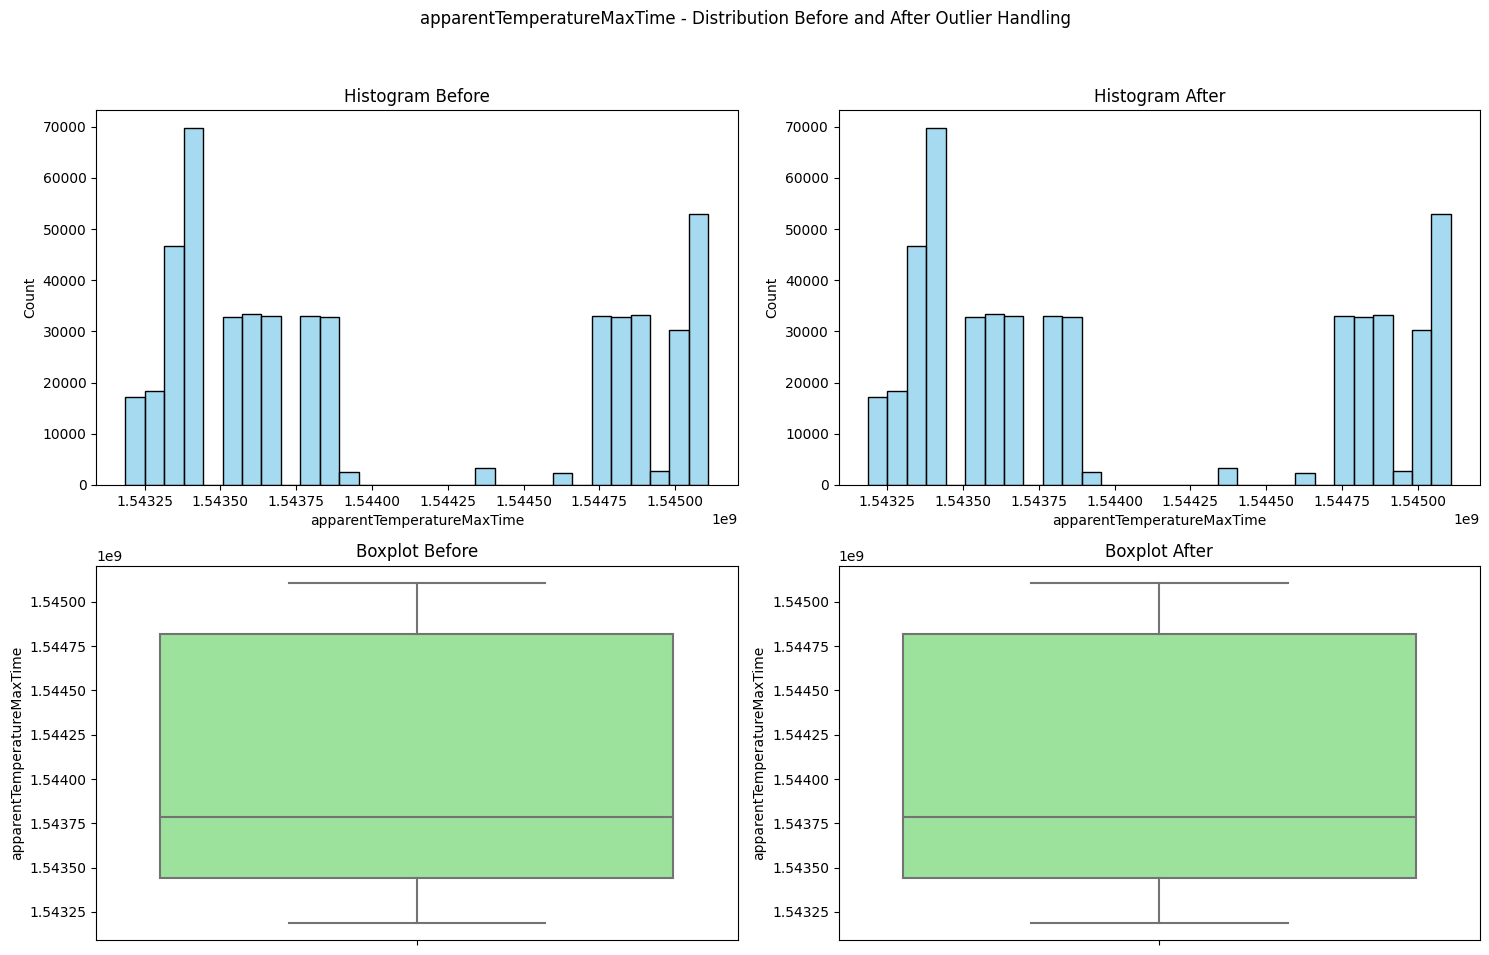

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


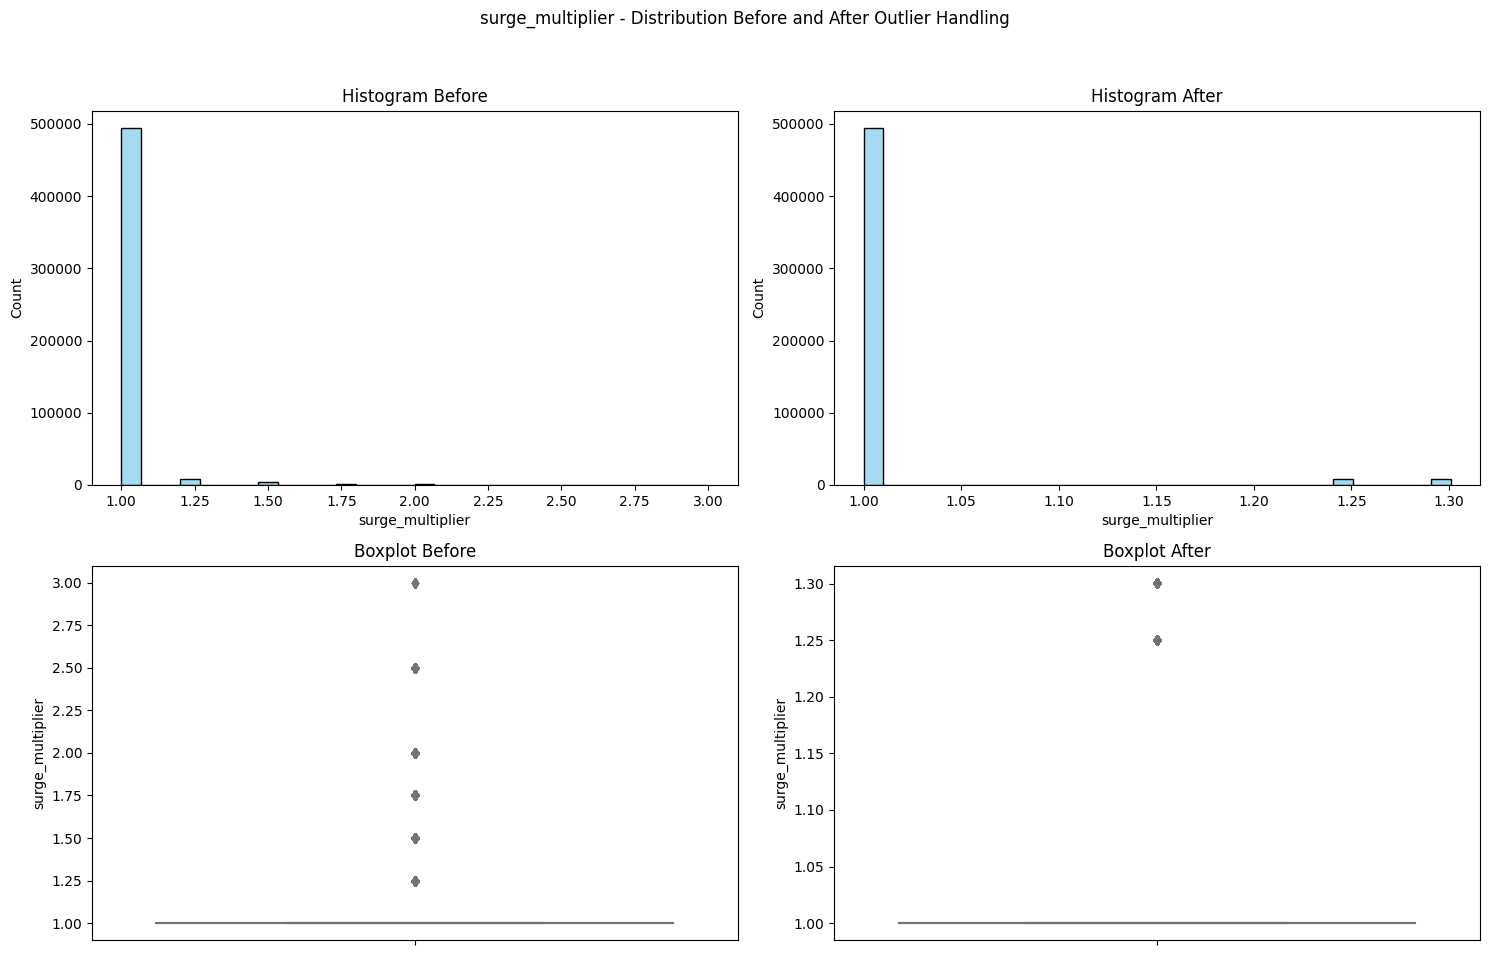

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


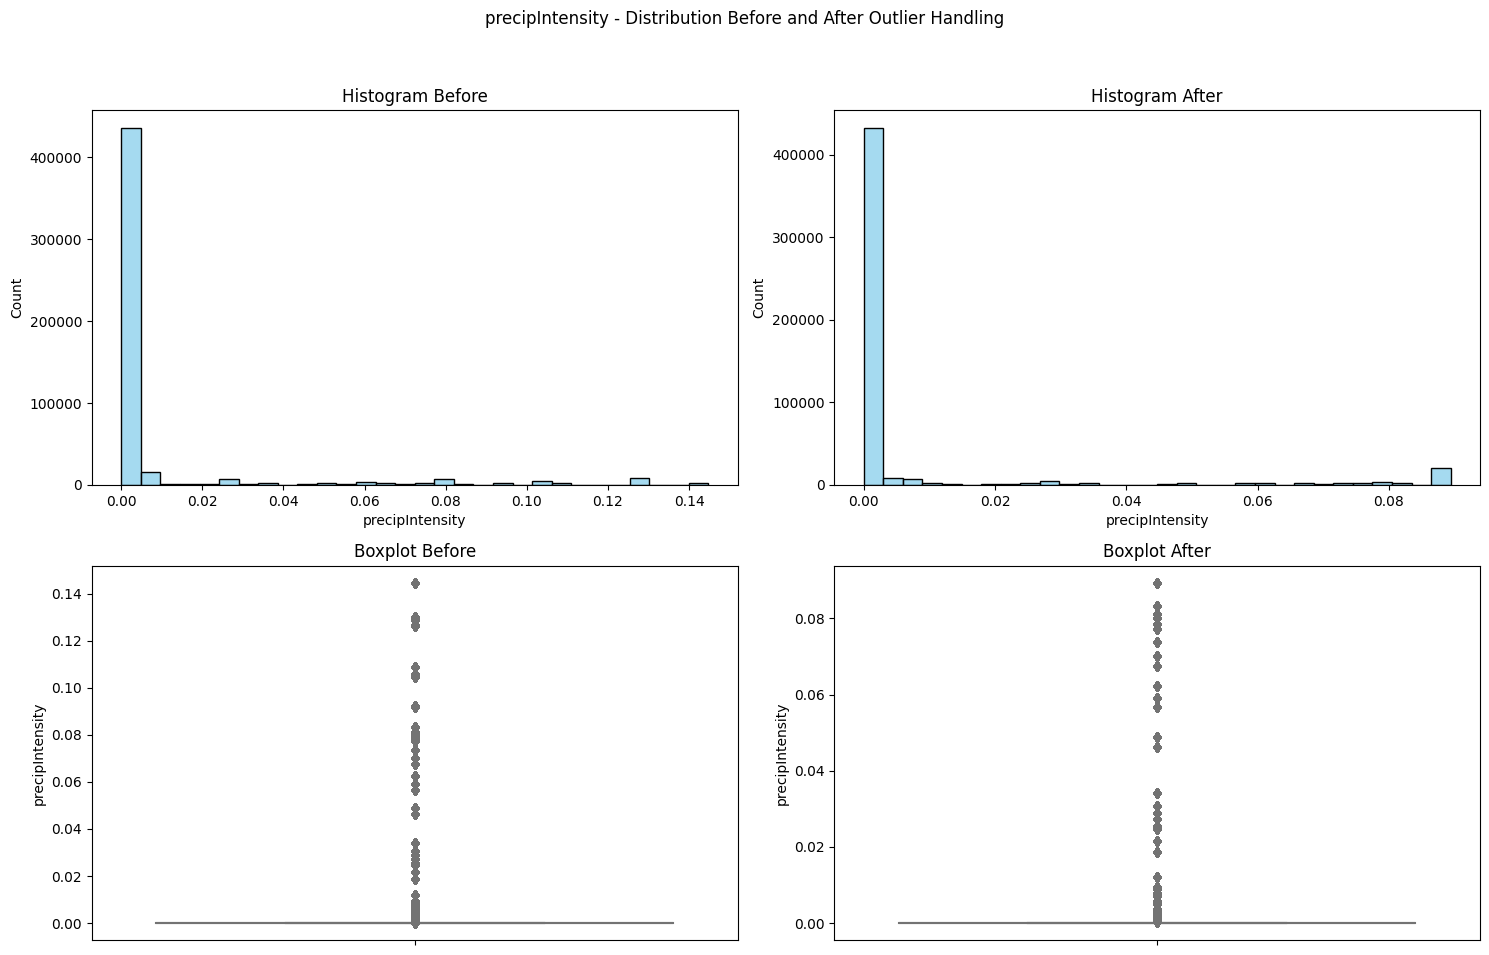

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


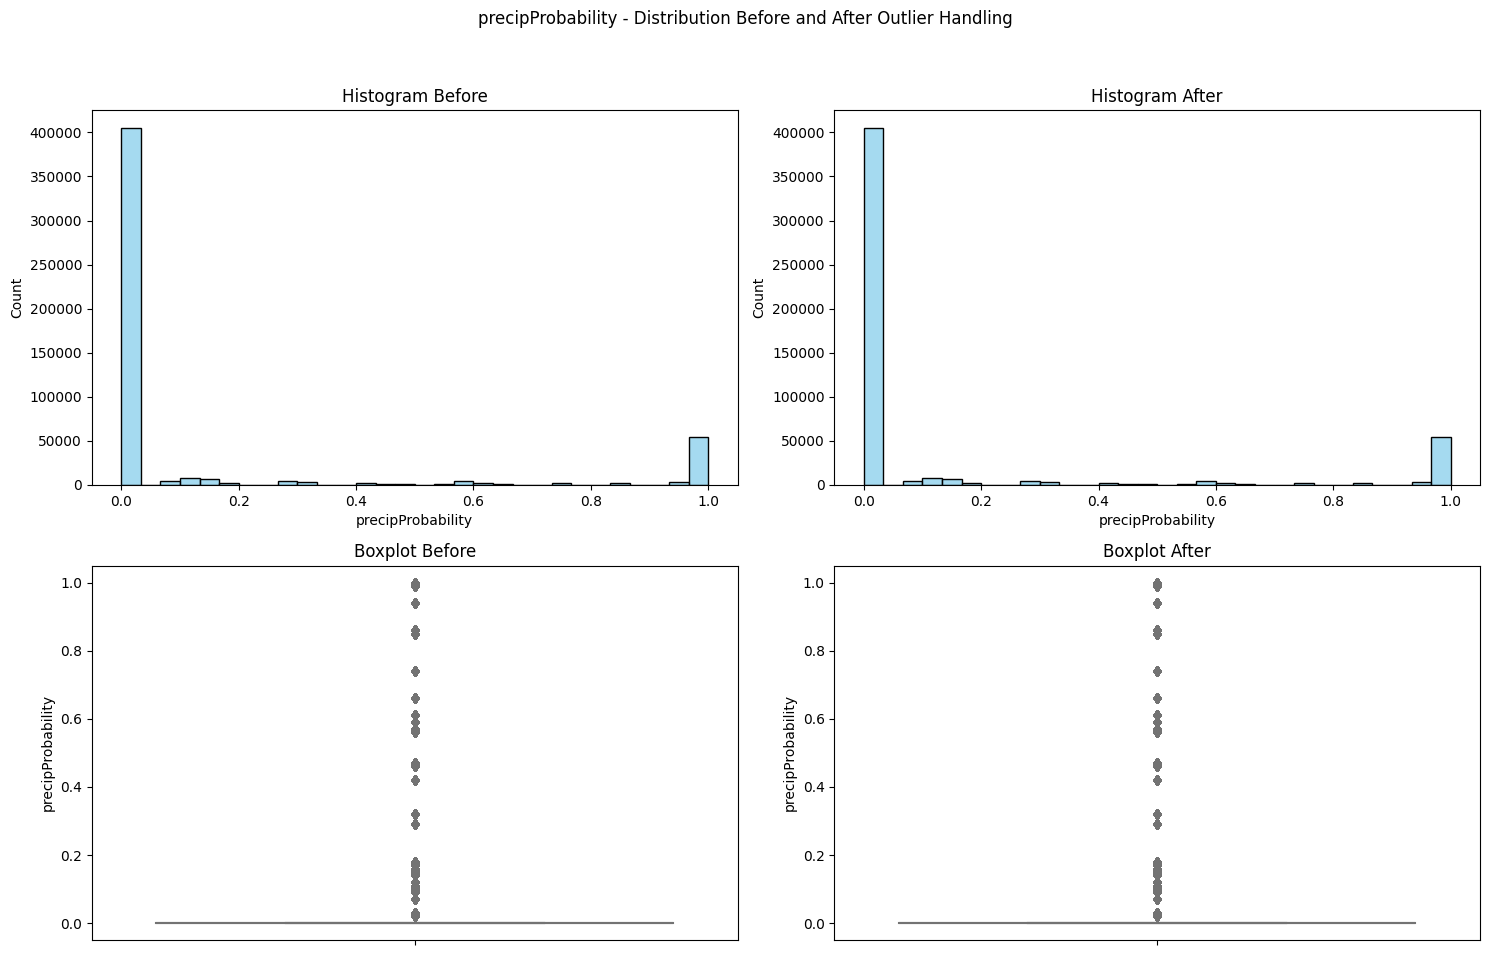

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


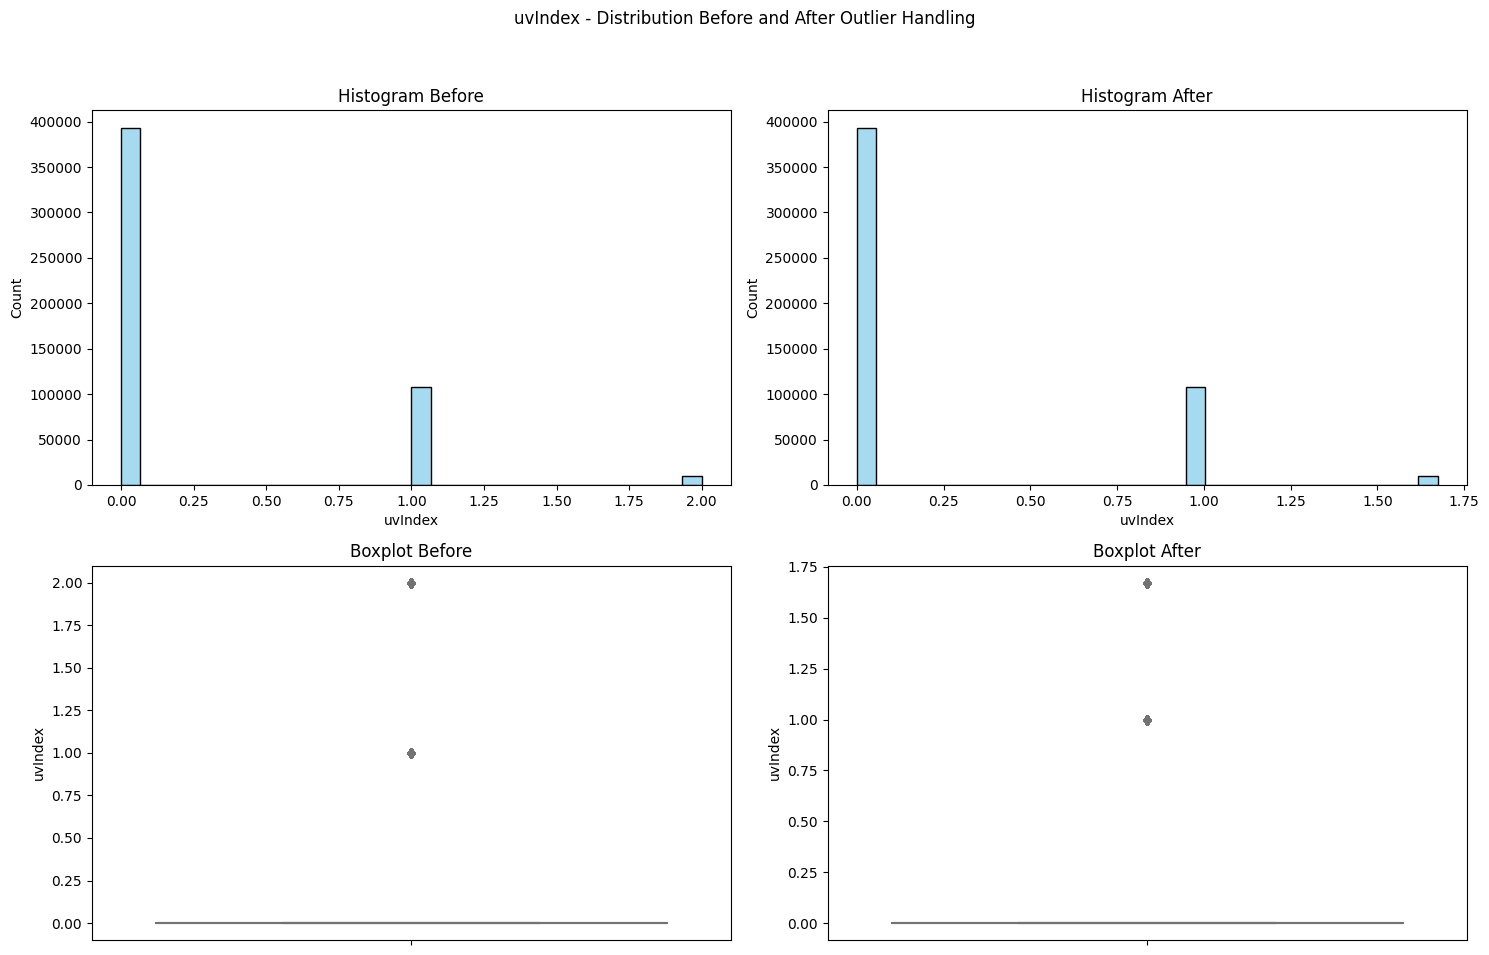

In [30]:
# Menampilkan visualisasi perbandingan distribusi sebelum dan sesudah penanganan outlier untuk kolom normal
for col in column_normal:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)


## Handling Missing Values

In [31]:
X_train_capped.isnull().sum()

hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTe

In [32]:
X_test_capped.isnull().sum()

hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTe

In [33]:
y_train.isnull().sum()

0

In [34]:
y_test.isnull().sum()

0

Data tidak memiliki missing value, sehingga proses feature engineering bisa dilanjutkan ke tahapan encoding dan scaling

## Split between Numeric Columns and Categorical Columns

In [35]:
# Mengidentifikasi kolom numerik dan kolom kategorikal pada dataset yang telah di-feature engineering
numeric_columns = X_train_capped.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train_capped.select_dtypes(include=['object']).columns

# Memisahkan kolom numerik
X_train_numeric = X_train_capped[numeric_columns]
X_test_numeric = X_test_capped[numeric_columns]

# Memisahkan kolom kategorikal
X_train_categorical = X_train_capped[categorical_columns]
X_test_categorical = X_test_capped[categorical_columns]

# Menampilkan hasil pemisahan menggunakan DataFrame
numeric_columns_df = pd.DataFrame(numeric_columns, columns=['Numeric Columns'])
categorical_columns_df = pd.DataFrame(categorical_columns, columns=['Categorical Columns'])

display(numeric_columns_df)
display(categorical_columns_df)


Numeric Columns
0                          hour
1                           day
2                         month
3                      distance
4              surge_multiplier
5                      latitude
6                     longitude
7                   temperature
8           apparentTemperature
9               precipIntensity
10            precipProbability
11                     humidity
12                    windSpeed
13                     windGust
14                 windGustTime
15                   visibility
16              temperatureHigh
17          temperatureHighTime
18               temperatureLow
19           temperatureLowTime
20      apparentTemperatureHigh
21  apparentTemperatureHighTime
22       apparentTemperatureLow
23   apparentTemperatureLowTime
24                     dewPoint
25                     pressure
26                  windBearing
27                   cloudCover
28                      uvIndex
29                 visibility.1
30                        ozone
31                  sunriseTime
32                   sunsetTime
33                    moonPhase
34           precipIntensityMax
35                  uvIndexTime
36               temperatureMin
37           temperatureMinTime
38               temperatureMax
39           temperatureMaxTime
40       apparentTemperatureMin
41   apparentTemperatureMinTime
42       apparentTemperatureMax
43   apparentTemperatureMaxTime

Categorical Columns
0            timezone
1              source
2         destination
3            cab_type
4          product_id
5                name
6       short_summary
7        long_summary
8                icon

In [36]:
X_train_numeric

hour  day  month  distance  surge_multiplier  latitude  longitude  \
141913     9    2     12      2.22           1.00000   42.3661   -71.0631   
207434    21   14     12      3.22           1.00000   42.3398   -71.0892   
524847    23    9     12      1.63           1.00000   42.3503   -71.0810   
629294     2   27     11      0.61           1.00000   42.3287   -71.0330   
5225       8    2     12      3.42           1.00000   42.3661   -71.0631   
...      ...  ...    ...       ...               ...       ...        ...   
119762    10   15     12      3.46           1.00000   42.3429   -71.1003   
281444    22   28     11      2.12           1.00000   42.3647   -71.0542   
397249     2   29     11      1.11           1.00000   42.3429   -71.1003   
143309    17   13     12      0.65           1.00000   42.3644   -71.0661   
132473     4   13     12      2.34           1.30083   42.3503   -71.0810   

        temperature  apparentTemperature  precipIntensity  ...  \
141913        38.54                36.11         0.030800  ...   
207434        42.91                41.40         0.000000  ...   
524847        30.26                24.67         0.000000  ...   
629294        43.58                37.35         0.089431  ...   
5225          38.95                36.97         0.009400  ...   
...             ...                  ...              ...  ...   
119762        46.59                45.50         0.000000  ...   
281444        40.43                34.59         0.000000  ...   
397249        37.92                31.91         0.000000  ...   
143309        31.24                31.24         0.000000  ...   
132473        25.88                17.99         0.000000  ...   

        precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
141913              0.0894   1543770000          36.400          1543726800   
207434              0.0000   1544806800          26.760          1544788800   
524847              0.0003   1544374800          17.105          1544353200   
629294              0.1300   1543251600          40.490          1543233600   
5225                0.0894   1543770000          36.400          1543726800   
...                    ...          ...             ...                 ...   
119762              0.0087   1544893200          39.440          1544929200   
281444              0.0000   1543420800          33.850          1543399200   
397249              0.0000   1543420800          33.600          1543399200   
143309              0.0001   1544716800          17.910          1544688000   
132473              0.0000   1544634000          22.550          1544673600   

        temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
141913           50.94          1543788000                  35.780   
207434           46.90          1544814000                  27.410   
524847           35.97          1544378400                  15.835   
629294           47.30          1543251600                  36.200   
5225             50.94          1543788000                  35.780   
...                ...                 ...                     ...   
119762           54.38          1544896800                  36.560   
281444           42.61          1543438800                  30.030   
397249           42.70          1543438800                  30.080   
143309           33.81          1544731200                  15.835   
132473           37.84          1544637600                  17.990   

        apparentTemperatureMinTime  apparentTemperatureMax  \
141913                  1543748400                   50.27   
207434                  1544788800                   44.15   
524847                  1544356800                   29.83   
629294                  1543291200                   43.92   
5225                    1543748400                   50.27   
...                            ...                     ...   
119762                  1544929200                   53.71   
2814

In [37]:
X_train_categorical

timezone             source              destination cab_type  \
141913  America/New_York      South Station                 Back Bay     Uber   
207434  America/New_York             Fenway            North Station     Lyft   
524847  America/New_York      South Station                 West End     Uber   
629294  America/New_York      South Station       Financial District     Lyft   
5225    America/New_York      North Station  Northeastern University     Uber   
...                  ...                ...                      ...      ...   
119762  America/New_York  Boston University            North Station     Lyft   
281444  America/New_York      North Station            South Station     Lyft   
397249  America/New_York          North End                 West End     Uber   
143309  America/New_York   Haymarket Square                 West End     Lyft   
132473  America/New_York        Beacon Hill                   Fenway     Lyft   

                                  product_id          name  \
141913  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX   
207434                           lyft_luxsuv  Lux Black XL   
524847  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV   
629294                          lyft_premier           Lux   
5225    55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX   
...                                      ...           ...   
119762                           lyft_luxsuv  Lux Black XL   
281444                           lyft_luxsuv  Lux Black XL   
397249  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX   
143309                             lyft_line        Shared   
132473                             lyft_plus       Lyft XL   

             short_summary                                       long_summary  \
141913         Light Rain                          Light rain until evening.    
207434      Mostly Cloudy                  Partly cloudy throughout the day.    
524847              Clear                  Partly cloudy throughout the day.    
629294               Rain    Rain until morning, starting again in the eve...   
5225     Possible Drizzle                          Light rain until evening.    
...                    ...                                                ...   
119762           Overcast                   Possible drizzle in the morning.    
281444           Overcast                  Mostly cloudy throughout the day.    
397249      Mostly Cloudy                  Mostly cloudy throughout the day.    
143309      Mostly Cloudy                  Partly cloudy throughout the day.    
132473              Clear                  Partly cloudy throughout the day.    

                         icon  
141913                  rain   
207434   partly-cloudy-night   
524847           clear-night   
629294                  rain   
5225                    rain   
...                       ...  
119762                cloudy   
281444                cloudy   
397249   partly-cloudy-night   
143309     partly-cloudy-day   
132473           clear-night   

[510380 rows x 9 columns]

In [38]:
X_test_numeric

hour  day  month  distance  surge_multiplier  latitude  longitude  \
526491     6   15     12      4.51               1.0   42.3661   -71.0631   
506474     0   17     12      2.80               1.0   42.3503   -71.0810   
139551    12    3     12      1.09               1.0   42.3661   -71.0631   
235222     3   27     11      0.92               1.0   42.3661   -71.0631   
140436     9   29     11      1.12               1.0   42.3287   -71.0330   
...      ...  ...    ...       ...               ...       ...        ...   
87288      3   13     12      2.67               1.0   42.3429   -71.1003   
111342     0   16     12      1.01               1.0   42.3661   -71.0631   
201635    14   28     11      1.50               1.0   42.3661   -71.0631   
320604    22   17     12      1.97               1.0   42.3588   -71.0707   
666972     2   30     11      1.13               1.0   42.3661   -71.0631   

        temperature  apparentTemperature  precipIntensity  ...  \
526491        45.84                43.00         0.000000  ...   
506474        40.93                35.58         0.089431  ...   
139551        48.63                47.56         0.000000  ...   
235222        43.73                37.84         0.089431  ...   
140436        37.79                30.62         0.000000  ...   
...             ...                  ...              ...  ...   
87288         25.88                18.26         0.000000  ...   
111342        43.96                40.80         0.000000  ...   
201635        39.02                34.01         0.000000  ...   
320604        39.75                35.21         0.000000  ...   
666972        37.11                31.86         0.000000  ...   

        precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
526491              0.0074   1544893200           39.54          1544929200   
506474              0.1254   1544979600           38.94          1544954400   
139551              0.0004   1543852800           42.91          1543896000   
235222              0.1225   1543251600           40.45          1543233600   
140436              0.0000   1543507200           34.67          1543550400   
...                    ...          ...             ...                 ...   
87288               0.0000   1544634000           22.22          1544673600   
111342              0.0074   1544893200           39.54          1544929200   
201635              0.0000   1543420800           33.75          1543399200   
320604              0.0184   1545066000           34.25          1545044400   
666972              0.0000   1543510800           35.15          1543550400   

        temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
526491           54.47          1544896800                   36.46   
506474           43.73          1544990400                   33.99   
139551           57.04          1543852800                   39.59   
235222           46.49          1543255200                   37.17   
140436           45.03          1543510800                   30.30   
...                ...                 ...                     ...   
87288            37.92          1544637600                   17.83   
111342           54.47          1544896800                   36.46   
201635           42.60          1543438800                   29.97   
320604           41.35          1545076800                   28.40   
666972           44.66          1543510800                   30.98   

        apparentTemperatureMinTime  apparentTemperatureMax  \
526491                  1544929200                  53.800   
506474                  1545019200                  38.390   
139551                  1543896000                  55.445   
235222                  1543291200                  43.840   
140436                  1543550400                  38.530   
...                            ...                     ...   
87288                   1544673600                  30.420   
1113

In [39]:
X_test_categorical

timezone              source         destination cab_type  \
526491  America/New_York  Financial District              Fenway     Lyft   
506474  America/New_York            West End   Boston University     Uber   
139551  America/New_York       South Station    Theatre District     Lyft   
235222  America/New_York  Financial District    Haymarket Square     Uber   
140436  America/New_York           North End       North Station     Lyft   
...                  ...                 ...                 ...      ...   
87288   America/New_York           North End         Beacon Hill     Uber   
111342  America/New_York    Haymarket Square  Financial District     Lyft   
201635  America/New_York              Fenway            Back Bay     Uber   
320604  America/New_York           North End         Beacon Hill     Uber   
666972  America/New_York           North End       North Station     Lyft   

                                  product_id       name    short_summary  \
526491                             lyft_line     Shared        Overcast    
506474  9a0e7b09-b92b-4c41-9779-2ad22b4d779d        WAV            Rain    
139551                                  lyft       Lyft        Overcast    
235222  6c84fd89-3f11-4782-9b50-97c468b19529      Black            Rain    
140436                              lyft_lux  Lux Black   Mostly Cloudy    
...                                      ...        ...              ...   
87288   6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV           Clear    
111342                                  lyft       Lyft   Partly Cloudy    
201635  6c84fd89-3f11-4782-9b50-97c468b19529      Black   Partly Cloudy    
320604  997acbb5-e102-41e1-b155-9df7de0a73f2   UberPool        Overcast    
666972                             lyft_plus    Lyft XL           Clear    

                                             long_summary  \
526491                 Mostly cloudy throughout the day.    
506474                          Rain throughout the day.    
139551                             Foggy in the morning.    
235222   Rain until morning, starting again in the eve...   
140436                 Partly cloudy throughout the day.    
...                                                   ...   
87288                  Partly cloudy throughout the day.    
111342                 Mostly cloudy throughout the day.    
201635                 Mostly cloudy throughout the day.    
320604                        Light rain in the morning.    
666972                 Partly cloudy throughout the day.    

                         icon  
526491                cloudy   
506474                  rain   
139551                cloudy   
235222                  rain   
140436   partly-cloudy-night   
...                       ...  
87288            clear-night   
111342   partly-cloudy-night   
201635     partly-cloudy-day   
320604                cloudy   
666972           clear-night   

[127596 rows x 9 columns]

In [40]:
y_test.shape

(127596,)

In [41]:
y_train.shape

(510380,)

## Feature Selection

In [42]:

# Menghitung korelasi antara kolom kategorikal dan 'price' menggunakan Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_categorical.columns:
    corr_coef, p_value = kendalltau(X_train_categorical[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
        interpretation.append('Significant')
    else:
        interpretation.append('Not Significant')

categorical_corr_df = pd.DataFrame({'Column Name': cols, 'Correlation Coefficient': corr, 'P-value': p_values, 'Correlation': interpretation})

display(categorical_corr_df)


Column Name  Correlation Coefficient        P-value      Correlation
0       timezone                      NaN            NaN  Not Significant
1         source                -0.013111   3.717011e-40      Significant
2    destination                -0.031688  1.596312e-225      Significant
3       cab_type                -0.056640   0.000000e+00      Significant
4     product_id                 0.050498   0.000000e+00      Significant
5           name                -0.397261   0.000000e+00      Significant
6  short_summary                 0.001050   3.111732e-01  Not Significant
7   long_summary                 0.000450   6.607288e-01  Not Significant
8           icon                 0.001100   2.908710e-01  Not Significant

In [43]:
# Menentukan kolom kategorikal yang terpilih berdasarkan hasil korelasi
selected_cat_cols = ['source', 'destination', 'cab_type', 'product_id', 'name']


In [44]:

# Menghitung korelasi antara kolom numerik dan 'price' menggunakan pearsonr dan spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_numeric.columns:
    if abs(X_train_numeric[col].skew()) < 0.5:                    
        # Untuk Kolom yang Terdistribusi Normal
        corr_coef, p_value = pearsonr(X_train_numeric[col], y_train)
    else:                                                     
        # Untuk Kolom yang Terdistribusi Skewed
        corr_coef, p_value = spearmanr(X_train_numeric[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
        interpretation.append('Significant')
    else:
        interpretation.append('Not Significant')

numerical_corr_df = pd.DataFrame({'Column Name': cols, 'Correlation Coefficient': corr, 'P-value': p_values, 'Correlation': interpretation})

display(numerical_corr_df)


Column Name  Correlation Coefficient   P-value  \
0                          hour                 0.000991  0.479054   
1                           day                -0.000648  0.643653   
2                         month                 0.000587  0.675048   
3                      distance                 0.333636  0.000000   
4              surge_multiplier                 0.164819  0.000000   
5                      latitude                 0.001925  0.169144   
6                     longitude                -0.001917  0.170915   
7                   temperature                 0.000315  0.821962   
8           apparentTemperature                 0.000027  0.984481   
9               precipIntensity                -0.000042  0.976314   
10            precipProbability                -0.000081  0.953965   
11                     humidity                -0.002145  0.125486   
12                    windSpeed                 0.001919  0.170386   
13                     windGust                 0.001225  0.381475   
14                 windGustTime                 0.000298  0.831504   
15                   visibility                 0.001118  0.424307   
16              temperatureHigh                -0.000610  0.662812   
17          temperatureHighTime                 0.000230  0.869614   
18               temperatureLow                -0.000423  0.762506   
19           temperatureLowTime                 0.000232  0.868337   
20      apparentTemperatureHigh                -0.000423  0.762309   
21  apparentTemperatureHighTime                 0.000213  0.879233   
22       apparentTemperatureLow                 0.000429  0.759397   
23   apparentTemperatureLowTime                 0.000241  0.863134   
24                     dewPoint                -0.000819  0.558312   
25                     pressure                 0.000529  0.705477   
26                  windBearing                 0.000202  0.884975   
27                   cloudCover                 0.000339  0.808887   
28                      uvIndex                 0.001386  0.322067   
29                 visibility.1                 0.001118  0.424307   
30                        ozone                 0.000555  0.691491   
31                  sunriseTime                 0.000236  0.865959   
32                   sunsetTime                 0.000236  0.865941   
33                    moonPhase                -0.001095  0.434166   
34           precipIntensityMax                -0.000833  0.551827   
35                  uvIndexTime                 0.000241  0.863338   
36               temperatureMin                -0.000217  0.876982   
37           temperatureMinTime                 0.000279  0.842124   
38               temperatureMax                -0.000578  0.679868   
39           temperatureMaxTime                 0.000228  0.870381   
40       apparentTemperatureMin                -0.000058  0.967014   
41   apparentTemperatureMinTime                 0.000295  0.832983   
42       apparentTemperatureMax                 0.000631  0.652118   
43   apparentTemperatureMaxTime                 0.000212  0.879677   

        Correlation  
0   Not Significant  
1   Not Significant  
2   Not Significant  
3       Significant  
4       Significant  
5   Not Significant  
6   Not Significant  
7   Not Significant  
8   Not Significant  
9   Not Significant  
10  Not Significant  
11  Not Significant  
12  Not Significant  
13  Not Significant  
14  Not Significant  
15  Not Significant  
16  Not Significant  
17  Not Significant  
18  Not Significant  
19  Not Significant  
20  Not Significant  
21  Not Significant  
22  Not Significant  
23  Not Significant  
24  Not Significant  
25  Not Significant  
26  Not Significant  
27  Not Significant  
28  Not Significant  
29  Not Significant  
30  Not Significant  
31  Not Significant  
32  Not Significant  
33  Not Significant  
34  Not Significant  
35  Not Significant  
36  Not Significant  
37  Not Significant  
38  Not Sig

In [45]:
# Menentukan kolom numerik yang terpilih berdasarkan hasil korelasi
selected_num_cols = ['distance', 'surge_multiplier']


In [46]:
# Memperbarui Kolom Numerik dan Kategorikal
X_train_categorical = X_train_categorical[selected_cat_cols]
X_train_numeric = X_train_numeric[selected_num_cols]

X_test_categorical = X_test_categorical[selected_cat_cols]
X_test_numeric = X_test_numeric[selected_num_cols]


In [47]:
# Menampilkan DataFrame Kolom Kategorikal yang Terpilih
display(X_train_categorical.head())

source              destination cab_type  \
141913  South Station                 Back Bay     Uber   
207434         Fenway            North Station     Lyft   
524847  South Station                 West End     Uber   
629294  South Station       Financial District     Lyft   
5225    North Station  Northeastern University     Uber   

                                  product_id          name  
141913  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  
207434                           lyft_luxsuv  Lux Black XL  
524847  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  
629294                          lyft_premier           Lux  
5225    55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX

In [48]:
# Menampilkan DataFrame Kolom Numerik yang Terpilih
display(X_train_numeric.head())

distance  surge_multiplier
141913      2.22               1.0
207434      3.22               1.0
524847      1.63               1.0
629294      0.61               1.0
5225        3.42               1.0

## Feature Scalling

In [49]:

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform pada train set
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)

# Transform pada test set
X_test_numeric_scaled = scaler.transform(X_test_numeric)

# Mengubah hasil scaling menjadi DataFrame dengan nama kolom yang sama
X_train_numeric_scaled = pd.DataFrame(X_train_numeric_scaled, columns=selected_num_cols)
X_test_numeric_scaled = pd.DataFrame(X_test_numeric_scaled, columns=selected_num_cols)

# Menampilkan hasil scaling
display(X_train_numeric_scaled.head())
display(X_test_numeric_scaled.head())


distance  surge_multiplier
0  0.036676         -0.183526
1  0.942864         -0.183526
2 -0.497975         -0.183526
3 -1.422287         -0.183526
4  1.124101         -0.183526

distance  surge_multiplier
0  2.111846         -0.183526
1  0.562265         -0.183526
2 -0.987316         -0.183526
3 -1.141368         -0.183526
4 -0.960131         -0.183526

Alasan kenapa saya menggunakan standardscaler

1. **Keseragaman Skala**:
   - StandardScaler memastikan semua fitur memiliki mean 0 dan standar deviasi 1. sehingga tidak ada fitur yang mendominasi model hanya karena skalanya lebih besar.

2. **Efektif untuk Data Terdistribusi Normal**:
   - Jika data mengikuti atau mendekati distribusi normal, StandardScaler lebih efektif. 

3. **Mengurangi Pengaruh Outlier**:
   - StandardScaler tidak terlalu terpengaruh oleh outlier dibandingkan MinMaxScaler. MinMaxScaler dapat terpengaruh oleh outlier, menyebabkan range data menjadi terlalu sempit.

4. **Stabilitas Model**:
   - Dengan StandardScaler, model machine learning sering kali lebih stabil dan memberikan hasil yang lebih konsisten karena fitur yang terstandarisasi membantu algoritma dalam mengonvergensi lebih cepat.



## Feature Encoding

In [50]:
X_train_categorical

source              destination cab_type  \
141913      South Station                 Back Bay     Uber   
207434             Fenway            North Station     Lyft   
524847      South Station                 West End     Uber   
629294      South Station       Financial District     Lyft   
5225        North Station  Northeastern University     Uber   
...                   ...                      ...      ...   
119762  Boston University            North Station     Lyft   
281444      North Station            South Station     Lyft   
397249          North End                 West End     Uber   
143309   Haymarket Square                 West End     Lyft   
132473        Beacon Hill                   Fenway     Lyft   

                                  product_id          name  
141913  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  
207434                           lyft_luxsuv  Lux Black XL  
524847  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  
629294                          lyft_premier           Lux  
5225    55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  
...                                      ...           ...  
119762                           lyft_luxsuv  Lux Black XL  
281444                           lyft_luxsuv  Lux Black XL  
397249  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  
143309                             lyft_line        Shared  
132473                             lyft_plus       Lyft XL  

[510380 rows x 5 columns]

In [51]:

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Melakukan fit dan transform pada train set
X_train_categorical_encoded = encoder.fit_transform(X_train_categorical)

# Transform pada test set
X_test_categorical_encoded = encoder.transform(X_test_categorical)

# Mengubah hasil encoding menjadi DataFrame dengan nama kolom yang sesuai
encoded_feature_names = encoder.get_feature_names_out(selected_cat_cols)
X_train_categorical_encoded = pd.DataFrame(X_train_categorical_encoded, columns=encoded_feature_names)
X_test_categorical_encoded = pd.DataFrame(X_test_categorical_encoded, columns=encoded_feature_names)

# Menampilkan hasil encoding
display(X_train_categorical_encoded.head())
display(X_test_categorical_encoded.head())


source_Beacon Hill  source_Boston University  source_Fenway  \
0                 0.0                       0.0            0.0   
1                 0.0                       0.0            1.0   
2                 0.0                       0.0            0.0   
3                 0.0                       0.0            0.0   
4                 0.0                       0.0            0.0   

   source_Financial District  source_Haymarket Square  source_North End  \
0                        0.0                      0.0               0.0   
1                        0.0                      0.0               0.0   
2                        0.0                      0.0               0.0   
3                        0.0                      0.0               0.0   
4                        0.0                      0.0               0.0   

   source_North Station  source_Northeastern University  source_South Station  \
0                   0.0                             0.0                   1.0   
1                   0.0                             0.0                   0.0   
2                   0.0                             0.0                   1.0   
3                   0.0                             0.0                   1.0   
4                   1.0                             0.0                   0.0   

   source_Theatre District  ...  name_Lux  name_Lux Black  name_Lux Black XL  \
0                      0.0  ...       0.0             0.0                0.0   
1                      0.0  ...       0.0             0.0                1.0   
2                      0.0  ...       0.0             0.0                0.0   
3                      0.0  ...       1.0             0.0                0.0   
4                      0.0  ...       0.0             0.0                0.0   

   name_Lyft  name_Lyft XL  name_Shared  name_UberPool  name_UberX  \
0        0.0           0.0          0.0            0.0         1.0   
1        0.0           0.0          0.0            0.0         0.0   
2        0.0           0.0          0.0            0.0         0.0   
3        0.0           0.0          0.0            0.0         0.0   
4        0.0           0.0          0.0            0.0         1.0   

   name_UberXL  name_WAV  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0  

[5 rows x 45 columns]

source_Beacon Hill  source_Boston University  source_Fenway  \
0                 0.0                       0.0            0.0   
1                 0.0                       0.0            0.0   
2                 0.0                       0.0            0.0   
3                 0.0                       0.0            0.0   
4                 0.0                       0.0            0.0   

   source_Financial District  source_Haymarket Square  source_North End  \
0                        1.0                      0.0               0.0   
1                        0.0                      0.0               0.0   
2                        0.0                      0.0               0.0   
3                        1.0                      0.0               0.0   
4                        0.0                      0.0               1.0   

   source_North Station  source_Northeastern University  source_South Station  \
0                   0.0                             0.0                   0.0   
1                   0.0                             0.0                   0.0   
2                   0.0                             0.0                   1.0   
3                   0.0                             0.0                   0.0   
4                   0.0                             0.0                   0.0   

   source_Theatre District  ...  name_Lux  name_Lux Black  name_Lux Black XL  \
0                      0.0  ...       0.0             0.0                0.0   
1                      0.0  ...       0.0             0.0                0.0   
2                      0.0  ...       0.0             0.0                0.0   
3                      0.0  ...       0.0             0.0                0.0   
4                      0.0  ...       0.0             1.0                0.0   

   name_Lyft  name_Lyft XL  name_Shared  name_UberPool  name_UberX  \
0        0.0           0.0          1.0            0.0         0.0   
1        0.0           0.0          0.0            0.0         0.0   
2        1.0           0.0          0.0            0.0         0.0   
3        0.0           0.0          0.0            0.0         0.0   
4        0.0           0.0          0.0            0.0         0.0   

   name_UberXL  name_WAV  
0          0.0       0.0  
1          0.0       1.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0  

[5 rows x 45 columns]

Alasan kenapa saya menggunakan One-Hot Encoder

1. **Tidak Ada Urutan**:
   - One-Hot Encoder mengubah kategori menjadi variabel dummy tanpa memberikan urutan. Ini penting ketika kategori tidak memiliki urutan alami. Ordinal Encoder memberikan nilai numerik yang bisa mengimplikasikan urutan, yang tidak selalu tepat.

2. **Mencegah Kesalahan Interpretasi**:
   - One-Hot Encoding memastikan model tidak salah menganggap bahwa ada hubungan kuantitatif antara kategori yang berbeda. Ordinal Encoder bisa membuat model berpikir bahwa satu kategori lebih besar atau lebih kecil dari yang lain.

3. **Kompatibilitas dengan Model**:
   - Banyak algoritma machine learning, seperti regresi linear dan KNN, bekerja lebih baik dengan fitur yang di-encode menggunakan One-Hot Encoding karena tidak ada asumsi tentang hubungan antar kategori.

4. **Menghindari Redundansi**:
   - One-Hot Encoder dengan opsi `drop='first'` menghindari redundansi informasi dengan membuang satu kategori dari setiap set variabel dummy. Ini membantu dalam model statistik untuk menghindari multicollinearity.

Secara sederhana, One-Hot Encoder lebih sesuai untuk data kategorikal tanpa urutan, memastikan model tidak membuat asumsi yang salah tentang hubungan antar kategori.



## Concate between Numeric Columns and Categorical Columns

In [52]:
# Menggabungkan kolom numerik dan kategorikal yang telah diencode pada train set
X_train_final = np.concatenate([X_train_numeric_scaled, X_train_categorical_encoded], axis=1)

# Menggabungkan kolom numerik dan kategorikal yang telah diencode pada test set
X_test_final = np.concatenate([X_test_numeric_scaled, X_test_categorical_encoded], axis=1)

X_train_final_df = pd.DataFrame(X_train_final)
X_test_final_df = pd.DataFrame(X_test_final)
display(X_train_final_df)
display(X_test_final_df)

0         1    2    3    4    5    6    7    8    9   ...   37  \
0       0.036676 -0.183526  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1       0.942864 -0.183526  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2      -0.497975 -0.183526  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3      -1.422287 -0.183526  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   
4       1.124101 -0.183526  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
...          ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
510375  1.160349 -0.183526  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
510376 -0.053943 -0.183526  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
510377 -0.969193 -0.183526  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   
510378 -1.386039 -0.183526  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
510379  0.145418  5.949889  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

         38   39   40   41   42   43   44   45   46  
0       0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  
510375  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
510376  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
510377  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
510378  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
510379  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[510380 rows x 47 columns]

0         1    2    3    4    5    6    7    8    9   ...   37  \
0       2.111846 -0.183526  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
1       0.562265 -0.183526  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2      -0.987316 -0.183526  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3      -1.141368 -0.183526  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
4      -0.960131 -0.183526  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   
...          ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
127591  0.444460 -0.183526  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   
127592 -1.059811 -0.183526  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
127593 -0.615779 -0.183526  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
127594 -0.189871 -0.183526  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   
127595 -0.951069 -0.183526  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   

         38   39   40   41   42   43   44   45   46  
0       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  
127591  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
127592  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
127593  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
127594  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
127595  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[127596 rows x 47 columns]

# vi. Model Definition

Saya memilih beberapa model regresi umum untuk GC4 ini:

1. **Linear Regression**: Model sederhana dan mudah dipahami, cocok untuk data yang memiliki hubungan linear.
2. **Random Forest Regressor**: Model berbasis pohon yang kuat untuk menangani data non-linear dan memiliki kemampuan untuk menangani outliers dan fitur yang tidak relevan.
3. **Gradient Boosting Regressor**: Model yang lebih kompleks dan kuat, cocok untuk data non-linear dan sering kali memberikan performa yang baik.


- **Hyperparameter**:
  - Linear Regression: Menggunakan pengaturan default.
  - Random Forest Regressor: `n_estimators=100`, `random_state=42`.
  - Gradient Boosting Regressor: `n_estimators=100`, `learning_rate=0.1`, `random_state=42`.

- **Metrik**: 
  - **Mean Absolute Error (MAE)**: Mengukur rata-rata absolut dari kesalahan prediksi, memberikan interpretasi yang mudah dalam satuan data asli.
  - **Mean Squared Error (MSE)**: Mengukur rata-rata kuadrat dari kesalahan prediksi, lebih sensitif terhadap outliers.
  - **R-squared (R²)**: Mengukur seberapa baik model menjelaskan variabilitas data, dengan nilai 1 menunjukkan model yang sempurna.

In [53]:
# Definisikan model Linear Regression
linear_model = LinearRegression()

# Definisikan model Random Forest Regressor dengan hyperparameter default
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Definisikan model Gradient Boosting Regressor dengan hyperparameter default
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [54]:
# Fit dan prediksi menggunakan Linear Regression
linear_model.fit(X_train_final, y_train)
y_pred_linear = linear_model.predict(X_test_final)

# Fit dan prediksi menggunakan Random Forest Regressor
random_forest_model.fit(X_train_final, y_train)
y_pred_rf = random_forest_model.predict(X_test_final)

# Fit dan prediksi menggunakan Gradient Boosting Regressor
gradient_boosting_model.fit(X_train_final, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test_final)


In [55]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Evaluasi model Linear Regression
mae_linear, mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)

# Evaluasi model Random Forest Regressor
mae_rf, mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

# Evaluasi model Gradient Boosting Regressor
mae_gb, mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)

# Membuat DataFrame untuk menampilkan metrik evaluasi
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MAE': [mae_linear, mae_rf, mae_gb],
    'MSE': [mse_linear, mse_rf, mse_gb],
    'R²': [r2_linear, r2_rf, r2_gb]
})

display(results)


Model       MAE       MSE        R²
0            Linear Regression  1.787072  6.762899  0.922426
1      Random Forest Regressor  1.056435  2.999647  0.965593
2  Gradient Boosting Regressor  1.298085  3.793551  0.956486

Analisis

- **Random Forest Regressor** menunjukkan performa terbaik dengan MAE terendah (1.056435) dan MSE terendah (2.999647). Ini menunjukkan bahwa model ini memiliki kesalahan prediksi rata-rata terendah dan kesalahan kuadrat rata-rata terendah.
- **Gradient Boosting Regressor** memiliki performa yang baik dengan MAE (1.298085) dan MSE (3.793551), namun masih di bawah performa Random Forest.
- **Linear Regression** memiliki performa terendah dibandingkan kedua model lainnya, dengan MAE (1.786953) dan MSE (6.763109) yang lebih tinggi.

Dari hasil ini, **Random Forest Regressor** adalah model yang paling sesuai untuk tugas prediksi harga perjalanan berdasarkan metrik evaluasi yang digunakan.

# vii. Model Training

In [56]:
# Menggunakan subset data agar tidak memakan waktu ketika running code
X_train_sub, _, y_train_sub, _ = train_test_split(X_train_final, y_train, test_size=0.2, random_state=42)

# List untuk menyimpan hasil evaluasi
results = []

# Kombinasi hyperparameter yang lebih sedikit untuk Random Forest Regressor
rf_params = [
    {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}
]

# Melatih Random Forest Regressor dengan hyperparameter yang lebih sedikit
for params in rf_params:
    rf_model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    rf_model.fit(X_train_sub, y_train_sub)
    y_pred_rf = rf_model.predict(X_test_final)
    mae_rf, mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
    results.append({
        'Model': 'Random Forest Regressor',
        'Params': params,
        'MAE': mae_rf,
        'MSE': mse_rf,
        'R²': r2_rf
    })

# Kombinasi hyperparameter yang lebih sedikit untuk Gradient Boosting Regressor
gb_params = [
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3}
]

# Melatih Gradient Boosting Regressor dengan hyperparameter yang lebih sedikit
for params in gb_params:
    gb_model = GradientBoostingRegressor(**params, random_state=42)
    gb_model.fit(X_train_sub, y_train_sub)
    y_pred_gb = gb_model.predict(X_test_final)
    mae_gb, mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
    results.append({
        'Model': 'Gradient Boosting Regressor',
        'Params': params,
        'MAE': mae_gb,
        'MSE': mse_gb,
        'R²': r2_gb
    })

# Membuat DataFrame untuk menampilkan hasil evaluasi
results_df = pd.DataFrame(results)

display(results_df)


Model  \
0      Random Forest Regressor   
1      Random Forest Regressor   
2  Gradient Boosting Regressor   
3  Gradient Boosting Regressor   

                                              Params       MAE       MSE  \
0  {'n_estimators': 50, 'max_depth': 10, 'min_sam...  1.247147  3.643626   
1  {'n_estimators': 100, 'max_depth': 10, 'min_sa...  1.246051  3.640531   
2  {'n_estimators': 50, 'learning_rate': 0.1, 'ma...  1.828373  6.467497   
3  {'n_estimators': 100, 'learning_rate': 0.05, '...  1.864962  6.705295   

         R²  
0  0.958206  
1  0.958241  
2  0.925815  
3  0.923087

# xiii. Model Evaluation

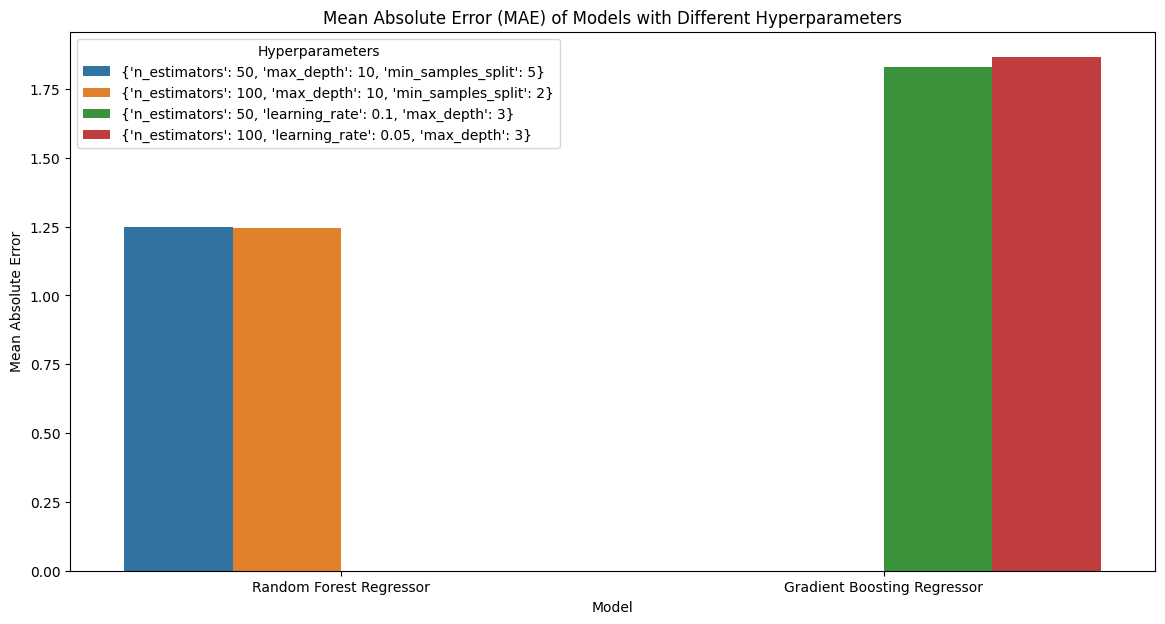

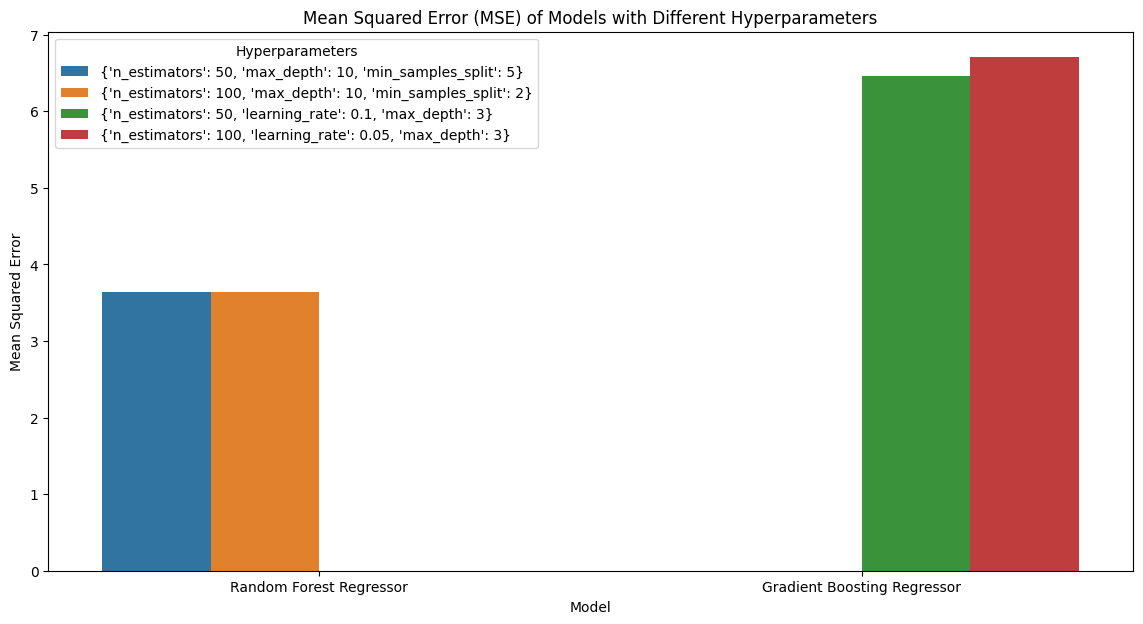

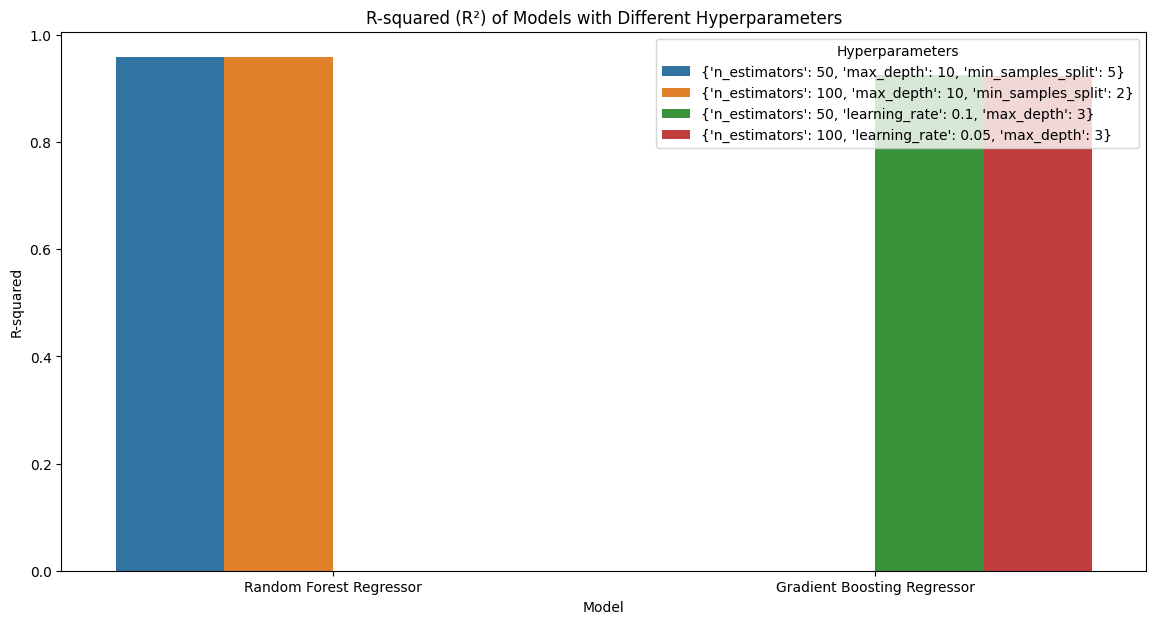

In [57]:

# Membuat DataFrame untuk hasil evaluasi
results_df = pd.DataFrame(results)

# Mengubah kolom Params menjadi string
results_df['Params'] = results_df['Params'].astype(str)

# Visualisasi MAE untuk setiap model dan kombinasi hyperparameter
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='MAE', hue='Params', data=results_df)
plt.title('Mean Absolute Error (MAE) of Models with Different Hyperparameters')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.legend(title='Hyperparameters')
plt.show()

# Visualisasi MSE untuk setiap model dan kombinasi hyperparameter
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='MSE', hue='Params', data=results_df)
plt.title('Mean Squared Error (MSE) of Models with Different Hyperparameters')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.legend(title='Hyperparameters')
plt.show()

# Visualisasi R-squared untuk setiap model dan kombinasi hyperparameter
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='R²', hue='Params', data=results_df)
plt.title('R-squared (R²) of Models with Different Hyperparameters')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.legend(title='Hyperparameters')
plt.show()


### Analisis Hasil Model

Berdasarkan hasil visualisasi dan evaluasi performa model, berikut adalah beberapa poin yang bisa kita tarik:

#### Mean Absolute Error (MAE)
- **Random Forest Regressor**:
  - Model dengan kombinasi hyperparameter `{'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5}` memiliki MAE sebesar 1.247147.
  - Model dengan kombinasi hyperparameter `{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}` memiliki MAE sebesar 1.246051.
  - Kedua kombinasi menunjukkan performa yang hampir sama dengan MAE yang sangat rendah.
- **Gradient Boosting Regressor**:
  - Model dengan kombinasi hyperparameter `{'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3}` memiliki MAE sebesar 1.828373.
  - Model dengan kombinasi hyperparameter `{'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3}` memiliki MAE sebesar 1.864962.
  - MAE untuk Gradient Boosting Regressor lebih tinggi dibandingkan Random Forest Regressor.

#### Mean Squared Error (MSE)
- **Random Forest Regressor**:
  - Model dengan kombinasi hyperparameter `{'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5}` memiliki MSE sebesar 3.643626.
  - Model dengan kombinasi hyperparameter `{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}` memiliki MSE sebesar 3.640531.
  - Kedua kombinasi menunjukkan performa yang hampir sama dengan MSE yang sangat rendah.
- **Gradient Boosting Regressor**:
  - Model dengan kombinasi hyperparameter `{'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3}` memiliki MSE sebesar 6.467497.
  - Model dengan kombinasi hyperparameter `{'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3}` memiliki MSE sebesar 6.705295.
  - MSE untuk Gradient Boosting Regressor lebih tinggi dibandingkan Random Forest Regressor.

#### R-squared (R²)
- **Random Forest Regressor**:
  - Model dengan kombinasi hyperparameter `{'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5}` memiliki R² sebesar 0.958206.
  - Model dengan kombinasi hyperparameter `{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}` memiliki R² sebesar 0.958241.
  - Kedua kombinasi menunjukkan performa yang hampir sama dengan R² yang sangat tinggi.
- **Gradient Boosting Regressor**:
  - Model dengan kombinasi hyperparameter `{'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3}` memiliki R² sebesar 0.925815.
  - Model dengan kombinasi hyperparameter `{'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3}` memiliki R² sebesar 0.923087.
  - R² untuk Gradient Boosting Regressor lebih rendah dibandingkan Random Forest Regressor.

### Kesimpulan
- **Random Forest Regressor** menunjukkan performa terbaik dengan MAE dan MSE yang lebih rendah serta R² yang lebih tinggi dibandingkan Gradient Boosting Regressor.
- Kombinasi hyperparameter `{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}` pada Random Forest Regressor memberikan hasil terbaik secara keseluruhan.
- **Gradient Boosting Regressor** meskipun menunjukkan performa yang baik, tidak sebaik Random Forest Regressor dalam hal metrik evaluasi yang digunakan.

Secara keseluruhan, **Random Forest Regressor** dengan hyperparameter `{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}` adalah model yang paling direkomendasikan untuk prediksi harga perjalanan dalam dataset ini.

### Statement

- **Random Forest Regressor** dengan hyperparameter `{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}` menunjukkan nilai R² yang sangat tinggi pada data test (0.958241) dengan MAE dan MSE yang rendah. Ini menunjukkan bahwa model adalah **good fit**. Tidak ada indikasi overfitting karena performa pada data test tetap baik.
- **Gradient Boosting Regressor** juga menunjukkan performa yang cukup baik, tetapi tidak sebaik Random Forest. Dengan nilai R² yang cukup tinggi tetapi lebih rendah dari Random Forest, ini menunjukkan bahwa model ini juga **good fit**, meskipun ada ruang untuk perbaikan lebih lanjut.

### Business Insight

1. **Prediksi Harga Perjalanan**:
   - Dengan menggunakan **Random Forest Regressor**, kita dapat memprediksi harga perjalanan dengan akurasi tinggi. Sebagai contoh, jika perjalanan memiliki fitur-fitur tertentu (seperti jarak, tipe kendaraan, kondisi cuaca), model dapat memprediksi harga dengan rata-rata kesalahan hanya sekitar $1.25. Ini berarti jika harga perjalanan aktual adalah $20, prediksi model akan berada di kisaran $18.75 hingga $21.25.

2. **Eksplorasi Data Aktual dengan Data Hasil Prediksi**:
   - Membandingkan data aktual dengan data hasil prediksi menunjukkan bahwa model dapat menangkap tren dan pola dalam data dengan baik. Sebagai contoh, jika ada perubahan dalam jarak perjalanan atau kondisi cuaca, model dapat secara akurat mencerminkan dampak perubahan tersebut pada harga perjalanan.
   - Ini memberikan nilai bisnis yang signifikan, karena perusahaan dapat menggunakan prediksi ini untuk menetapkan harga dinamis, menawarkan diskon, atau merencanakan strategi pemasaran yang lebih baik berdasarkan kondisi aktual dan prediksi.

Dengan demikian, model yang dikembangkan tidak hanya memberikan prediksi yang akurat tetapi juga memberikan wawasan bisnis yang berharga untuk pengambilan keputusan yang lebih baik.

# ix. Model Saving

In [58]:
# Menyimpan list kolom numerik
with open('list_num_cols.txt', 'w') as file_1:
    json.dump(selected_num_cols, file_1)

# Menyimpan list kolom kategorikal
with open('list_cat_cols.txt', 'w') as file_2:
    json.dump(selected_cat_cols, file_2)


In [59]:
# Menyimpan scaler
with open('scaler.pkl', 'wb') as file_3:
    pickle.dump(scaler, file_3)

# Menyimpan encoder
with open('encoder.pkl', 'wb') as file_4:
    pickle.dump(encoder, file_4)

# Menyimpan model terbaik
best_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
best_model.fit(X_train_final, y_train)

with open('best_model.pkl', 'wb') as file_5:
    pickle.dump(best_model, file_5)

# x. Model Inference

In [60]:
# Load Files
with open('list_cat_cols.txt', 'r') as file_1:
    list_cat_cols = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
    list_num_cols = json.load(file_2)

with open('encoder.pkl', 'rb') as file_3:
    encoder = pickle.load(file_3)

with open('scaler.pkl', 'rb') as file_4:
    scaler = pickle.load(file_4)

with open('best_model.pkl', 'rb') as file_5:
    best_model = pickle.load(file_5)

In [61]:
# Membuat data inference baru
data_inf = {
    'hour': 12,
    'day': 15,
    'month': 11,
    'distance': 2.5,
    'surge_multiplier': 1.0,
    'latitude': 42.3453,
    'longitude': -71.0464,
    'temperature': 45.0,
    'apparentTemperature': 40.0,
    'precipIntensity': 0.0,
    'precipProbability': 0.0,
    'humidity': 0.8,
    'windSpeed': 5.0,
    'windGust': 10.0,
    'windGustTime': 1544055600,
    'visibility': 10.0,
    'temperatureHigh': 50.0,
    'temperatureHighTime': 1544055600,
    'temperatureLow': 30.0,
    'temperatureLowTime': 1544106000,
    'apparentTemperatureHigh': 45.0,
    'apparentTemperatureHighTime': 1544055600,
    'apparentTemperatureLow': 25.0,
    'apparentTemperatureLowTime': 1544106000,
    'dewPoint': 35.0,
    'pressure': 1012.0,
    'windBearing': 180,
    'cloudCover': 0.5,
    'uvIndex': 2,
    'visibility.1': 10.0,
    'ozone': 300.0,
    'sunriseTime': 1544034000,
    'sunsetTime': 1544069400,
    'moonPhase': 0.5,
    'precipIntensityMax': 0.1,
    'uvIndexTime': 1544055600,
    'temperatureMin': 30.0,
    'temperatureMinTime': 1544034000,
    'temperatureMax': 50.0,
    'temperatureMaxTime': 1544055600,
    'apparentTemperatureMin': 25.0,
    'apparentTemperatureMinTime': 1544034000,
    'apparentTemperatureMax': 45.0,
    'apparentTemperatureMaxTime': 1544055600,
    'timezone': 'EST',
    'source': 'Back Bay',
    'destination': 'South Station',
    'cab_type': 'Uber',
    'product_id': 'lyft',
    'name': 'UberX',
    'short_summary': 'Mostly Cloudy',
    'long_summary': 'Mostly Cloudy',
    'icon': 'cloudy'
}

data_inf = pd.DataFrame([data_inf])


In [62]:
# Memastikan semua kolom
for col in list_num_cols + list_cat_cols:
    if col not in data_inf.columns:
        data_inf[col] = 0

# Menyusun kembali urutan
data_inf = data_inf[list_num_cols + list_cat_cols]


In [63]:
# Memisahkan kolom kategorik dan numerik
data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]


In [64]:
# Feature Scaling dan Encoding
data_inf_scaled = scaler.transform(data_inf_num)
data_inf_encoded = encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_scaled, data_inf_encoded], axis=1)


In [65]:
# Predict mnenggunakan best model
y_pred_inf = best_model.predict(data_inf_final)
y_pred_inf


array([10.33764453])

### Narasi Bisnis

Model memprediksi bahwa harga perjalanan untuk data inferensi yang diberikan adalah sekitar $10.34. Prediksi ini dibuat dengan mempertimbangkan berbagai fitur, termasuk:

- **Waktu**: Jam, hari, bulan
- **Jarak**: 2.5 mil
- **Pengali Lonjakan**: 1.0
- **Lokasi**: Latitude 42.3453, Longitude -71.0464
- **Kondisi Cuaca**: 
  - Suhu: 45°F
  - Kelembapan: 80%
  - Kecepatan Angin: 5.0 mph
  - Gust Angin: 10.0 mph
  - Intensitas Hujan: 0.0

**Studi Kasus:**
Jika seorang penumpang melakukan perjalanan dari Back Bay ke South Station menggunakan UberX, dengan detail sebagai berikut:
- **Cab Type**: UberX
- **Jarak**: 2.5 mil
- **Tanpa Lonjakan Harga**
- **Kondisi Cuaca**: Suhu 45°F, Kelembapan 80%

Maka model memprediksi harga perjalanan sekitar **$10.34**.

**Manfaat untuk Bisnis Rideshare:**
- **Perkiraan Harga Real-Time**: Menyediakan perkiraan harga yang akurat sebelum pelanggan memesan perjalanan.
- **Optimalisasi Penetapan Harga**: Mengatur strategi penetapan harga yang lebih dinamis berdasarkan berbagai faktor.
- **Peningkatan Pengalaman Pelanggan**: Menyediakan informasi harga yang transparan dan dapat diandalkan, meningkatkan kepercayaan dan kepuasan pelanggan.

Dengan menggunakan model ini, bisnis rideshare dapat memberikan perkiraan harga yang lebih akurat kepada pelanggan berdasarkan berbagai fitur yang relevan.


# xi. Pengambilan Kesimpulan


### 1. EDA
Eksplorasi Data Awal (EDA) menunjukkan beberapa temuan penting:
- **Distribusi Harga Perjalanan**: Harga perjalanan cenderung miring ke kanan, menunjukkan banyak perjalanan dengan harga rendah.
- **Korelasi Antar Variabel**: Fitur seperti jarak perjalanan dan pengali lonjakan memiliki korelasi yang signifikan dengan harga.
- **Distribusi Fitur Numerik**: Sebagian besar perjalanan berada pada jarak 1 hingga 3 mil, dengan beberapa outlier pada jarak yang lebih jauh.
- **Visualisasi Berdasarkan Cab Type dan Source/Destination**: Terdapat variasi harga yang signifikan berdasarkan jenis layanan (misalnya, Lyft vs. Uber) dan lokasi awal/tujuan perjalanan.

### 2. Evaluasi Model
Dari hasil evaluasi model, ditemukan bahwa:
- **Random Forest Regressor** dengan parameter tertentu memberikan performa terbaik dengan nilai MAE yang rendah sekitar 1.25, MSE sekitar 3.64, dan R² sekitar 0.96.
- **Gradient Boosting Regressor** juga menunjukkan performa yang baik, namun sedikit lebih rendah dibandingkan Random Forest dalam hal MAE dan MSE.
- Model secara keseluruhan menunjukkan kemampuan yang kuat dalam memprediksi harga perjalanan dengan akurasi yang tinggi.

### 3. Analisis Model
Model yang dipilih mampu memprediksi harga perjalanan dengan baik, seperti yang ditunjukkan oleh hasil inferensi:
- Contoh data inferensi menunjukkan bahwa perjalanan dari Back Bay ke South Station menggunakan UberX dengan jarak 2.5 mil dan kondisi cuaca tertentu diprediksi memiliki harga sekitar $10.34.
- Prediksi ini akurat dan membantu dalam memberikan perkiraan harga yang realistis kepada pelanggan.

### 4. Perbaikan Lebih Lanjut
Untuk meningkatkan performa model, beberapa langkah berikut dapat dipertimbangkan:
- **Pengumpulan Data Tambahan**: Mengumpulkan data yang lebih baru atau lebih banyak untuk meningkatkan generalisasi model.
- **Fitur Engineering Lanjutan**: Menambahkan fitur-fitur baru yang mungkin relevan, seperti kondisi lalu lintas atau waktu tunggu.
- **Optimasi Hyperparameter Lebih Lanjut**: Melakukan pencarian hyperparameter yang lebih luas untuk menemukan kombinasi terbaik.

### 5. Hal Lain
- **Implementasi dalam Sistem Nyata**: Model dapat diintegrasikan ke dalam aplikasi rideshare untuk memberikan perkiraan harga real-time kepada pelanggan.
- **Pengujian A/B**: Melakukan pengujian A/B untuk melihat dampak penggunaan model prediktif ini terhadap kepuasan pelanggan dan konversi pemesanan.

Kesimpulannya, model prediktif yang dikembangkan telah memenuhi objective awal yaitu memprediksi harga perjalanan dengan akurasi yang tinggi. Model ini tidak hanya bermanfaat untuk perkiraan harga, tetapi juga memiliki potensi untuk meningkatkan strategi penetapan harga dan pengalaman pelanggan secara keseluruhan.
